# **Comparative analysis of algorithms to find frequent k-mers and their implementation in SARS-CoV-2**

Authors:
Indronil Bhattacharjee, Jaspreet Thind

**Abstract**

In this study, we have implemented FrequentWords() and BetterFrequentWords() algorithms to find frequent k-mers which works on counting and hashing principle, respectively. It has been found hashing by BetterFrequentWords() performs tasks much faster as compared to Frequentwords(). To test our best algorithm, we considered multiple virus’s genomes – SARS-CoV-2, SARS-CoV, MERS, Bat rat and Pangolin. In SARS-CoV-2 genome, there’s poly (A) tail at the end of its genome sequence which was removed to make our results more biologically convincing. We have reported multiple length k-mer sequences in SARS-CoV-2 and some of them also found in other viral genomes. Functional annotation of genes is also reported in which candidate k-mer sequences were found from Uniprot database. No motifs were found for selected k-mer sequences using RCSB PDB motif finder. 


**Introduction**

In the last decade due to the reduction in cost of sequencing technologies, the availability of genomics sequences becomes much more accessible due to which the number of transcriptomic and genomic bio projects has increased dramatically. The advancement in these technologies are pushing the capabilities of conventional laboratory experiments. In this study, we worked with fundamental queries of bioinformatic pipelines related to the interpretation of biological datasets which can be put together as follows: Find the k-mers of different lengths within the given sequence using different algorithms and evaluating their performance on larger datasets. Similarly, locate the motif sequences on the candidate k-mer, annotation of genes and reporting the conserved k-mers among multiple viral genomes. Since this area is well-studied, bioinformatic community has adopted many k-mer based approaches due to their potential to summarize large datasets efficiently. Hence, the algorithms we described in this study are widely accepted and imperative to biological analysis.

**Methods**

We used Python programming language to implement our k-mer analysis algorithms. We developed two algorithms: FrequentWords() and BetterFrequentWords() to identify most frequent k-mers in the SARS-CoV-2 genome. We also developed the FindKmerRepeats() function to identify k-mer repeats in the genome. We used a permutation test to determine the statistical significance of the frequency of most frequent k-mers. We generated null distributions by simulating sequences with the same length and ACGT frequencies as the SARS-CoV-2 genome.


**TASK 1: FrequentWords()**
The FrequentWords() function takes a string text and an integer k as input, and returns a list of the most frequent k-mers in text. The function first creates an empty list called freq_patterns. It then initializes a list called count with zeros whose length is equal to the number of k-mers in text (i.e., n - k + 1).
Next, the function iterates over each k-mer in text, and counts the number of times it appears in text using the PatternCount() function. The count for each k-mer is stored in the corresponding position in the count list. The function then determines the maximum count value and adds any k-mers with this count to the freq_patterns list. Finally, the function removes duplicates from the freq_patterns list and returns it.
The PatternCount() function simply counts the number of occurrences of a given pattern in a text string, by iterating over all substrings of text of length len(pattern) and checking if each substring matches the pattern.


In [4]:
#FrequentWords() function
def FrequentWords(text, k):
    freq_patterns = []
    n = len(text)
    count = [0] * (n - k + 1)
    for i in range(n - k + 1):
        pattern = text[i:i+k]
        count[i] = PatternCount(pattern, text)
    max_count = max(count)
    for i in range(n - k + 1):
        if count[i] == max_count:
            pattern = text[i:i+k]
            freq_patterns.append(pattern)
    freq_patterns = list(set(freq_patterns))
    return freq_patterns

def PatternCount(pattern, text):
    count = 0
    for i in range(len(text) - len(pattern) + 1):
        if text[i:i+len(pattern)] == pattern:
            count += 1
    return count

**TASK 2: BetterFrequentWords()**
The BetterFrequentWords() function is a Python function that takes a string of DNA sequence (text) and an integer (k) as input. It returns a list of the most frequent k-mers in the given DNA sequence.
This function is an improvement over the basic FrequentWords() function, as it makes use of a dictionary (freqMap) to store the frequency of k-mers in the text. This makes the function more efficient and faster for larger texts, as the frequency of each k-mer is only calculated once. The function then finds the k-mers with the highest frequency and returns them as a list.
The FrequencyMap() function is a helper function used by BetterFrequentWords(). It takes a string of DNA sequence (text) and an integer (k) as input and returns a dictionary with keys as k-mers and values as their frequency in the text. This function is called by BetterFrequentWords() to create the frequency map that it uses to find the most frequent k-mers.


In [6]:
#BetterFrequentWords() function
def BetterFrequentWords(text, k):
    freqPatterns = []
    freqMap = FrequencyMap(text, k)
    maxCount = max(freqMap.values())
    for pattern, count in freqMap.items():
        if count == maxCount:
            freqPatterns.append(pattern)
    return freqPatterns, maxCount

def FrequencyMap(text, k):
    freqMap = {}
    n = len(text)
    for i in range(n - k + 1):
        pattern = text[i:i+k]
        if pattern not in freqMap:
            freqMap[pattern] = 1
        else:
            freqMap[pattern] += 1
    return freqMap

**TASK 3: generate_sequence()**
The generate_sequence() function generates a random DNA sequence of length L. It first creates a dictionary p containing the probabilities of each nucleotide (A,C,G,T) being chosen in the sequence. Then, it uses the np.random.multinomial() function from the NumPy library to generate a list of random integers, with length L, based on the probabilities in the p dictionary. The multinomial() function returns a 2D array, where each row represents a set of values representing the outcomes of the multinomial random variable. Here, each row consists of a set of 0s and 1s representing the absence or presence of each nucleotide in the sequence. The np.argmax() function returns the indices of the maximum value in each row, which correspond to the indices of the nucleotide with the highest probability of being chosen in that position. Finally, the function generates a string s by joining the nucleotides with the highest probability at each position in the sequence.


In [13]:
#generate_sequence() function
import numpy as np
import pandas as pd

def generate_sequence(L):
    p = {"A": 0.25, "C": 0.25, "G": 0.25, "T": 0.25}
    x = np.random.multinomial(n=1, pvals=list(p.values()), size=L)
    w = [list(p.keys())[i] for i in np.argmax(x, axis=1)]
    s = ''.join(w)
    return s

L = 1000
print(generate_sequence(L))

AGATCCTGTTACTAAGTCGGCTACCCACCTCGCACCAAAGGCCAAGTGTTGTGTATCCCGGTATAGGTTTCTGGACATGACTGTCCCTGGATGGGGAAAGTGTATCGGGCACCCCGGGAAAATACGGAGAGGCACACTCTGTAAGAGAATGAGGGTTTCTATTTCACATGATAACTTATGCACCGCCATCTCAAATCGGAGGAATAGAATACTTACGAGGGTAAGCGTACAAAGCAGTTATGAAGTTGGTTTGTCCGCGAGCGAGTTAATCCGACGCCAAATTGCATAATACCGAGGGCATCCGTATTCCCAAATCAATCCCAAGTTAGAACACCTACGATATCCGTTAAGGAGTTCCGTTCCTGAGAAGGGTTTAAGTTCGGCATACACGTTCCTAGATTTCGTCGAGGGCCCGCCATCTACCTATCCCGTGCCCGGCAGGATGCCATACAGTATCCCGGCCACAATGTTAACATGCAGTACCCTTAAATGTTCAAGGGCTGCCAACAGCTAAAGTCGCAAATGAGTGTACGCTTTGTAAATTATTCGACCGCCCGGTCGTCAAGTATCGGCGCGCAGTTTTCGTAGTTCTCCCTGATTGCACACTGACGTTCAGCACTATGTGAAATGGGGTAACACGTATGGGAAGCGCCGGCTACTTTCGCGGCACACTCATCGTGCTTGCGCAGTGATTACCTATGGATTAGGTTGCAATTCCCATCTTATATGCGTGGAGACAGTCAAATAGTAGACTGCTGTCCGATTAAGCCTCATGCGATCAGATCCCTGCATGTATGGCAGCCCAAGGGGTGGGGACTCTCTCTCCTCGCCTATGCTCTGGTACAGCAGATCGCAATCGCAGTTAGGTCAGGAATTTCTAGCAATCCAGACTAATATACGCGTGAACCATACGGCTGACGGAGGCGAAGACGCAAGCCCCCCCTTACATGAACACCGCCCTCGTCGGTGACCTTGAGCGTCTTCCCGAGCTCTACAGACA

**TASK 4: Visualize the empirical runtime of FrequentWords() and Better FrequentWords()
algorithms**
The compare_runtimes() function takes two input arguments L and K representing the length of a sequence of nucleotides and the length of the k-mers to search for, respectively.
Inside the function, the nucleotide sequence is generated using the generate_sequence() function. Then, the function calls FrequentWords() and BetterFrequentWords() functions to find the most frequent k-mers in the sequence, and records the time it takes to execute each function using time.time().

The function returns two output values: frequent_words_time and better_frequent_words_time, representing the time it took to execute the FrequentWords() and BetterFrequentWords() functions, respectively.

The L_values and k_values variables are used to specify the range of values for L and K to use in the comparison. The function then loops through each value of L and K and calls compare_runtimes() to compare the runtime of the two functions for each combination of L and k.

Finally, the function plots two graphs using matplotlib, one showing the runtime of FrequentWords() for each value of L and K, and the other showing the runtime of BetterFrequentWords() for each value of L and K. The graphs are labeled with the corresponding value of k.


KeyboardInterrupt: 

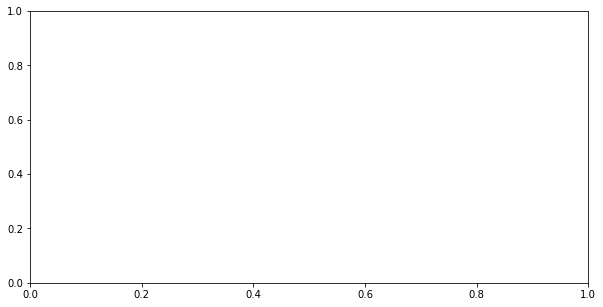

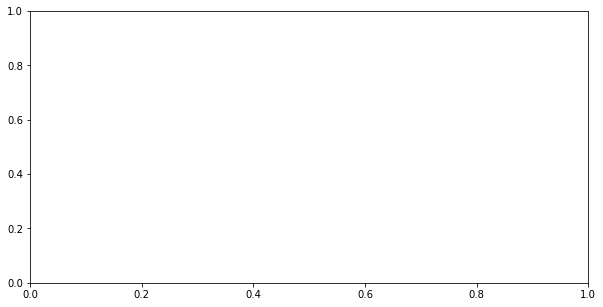

In [23]:
#Comparing time between FrequentWords() and BetterFrequentWords()
import time
import numpy as np
import matplotlib.pyplot as plt

def compare_runtimes(L, k):
    text = generate_sequence(L)
    start_time = time.time()
    FrequentWords(text, k)
    frequent_words_time = time.time() - start_time
    
    start_time = time.time()
    BetterFrequentWords(text, k)
    better_frequent_words_time = time.time() - start_time
    
    return frequent_words_time, better_frequent_words_time

L_values = np.arange(100,5000,10)
k_values = [6,9]

fig, ax = plt.subplots(figsize=(10, 5))
fig, ax2 = plt.subplots(figsize=(10, 5))

for k in k_values:
    frequent_words_times = []
    better_frequent_words_times = []
    for L in L_values:
        frequent_words_time, better_frequent_words_time = compare_runtimes(L, k)
        frequent_words_times.append(frequent_words_time)
        better_frequent_words_times.append(better_frequent_words_time)
    
    ax.plot(L_values, frequent_words_times, label=f'(k={k})')
    ax2.plot(L_values, better_frequent_words_times, label=f'(k={k})')


**TASK 5: Most frequent K-mers in SARS-COV-2**
SARS-COV-2 is an RNA Virus. The reference genome of the SARS-CoV-2 coronavirus has 29903 nucleotides, with 33 adenine (A), which is most likely the polyA tail of the RNA sequence. We took out the polyA tail in order to discover relevant repeated k-mers. Using BetterFrequentWords() algorithm, the most frequent K-mers of SARS-CoV-2 was found for K= 3,6,9,12, and 15. The genome sequence was considered in FASTA format from NCBI database [1].


In [2]:
#Genome sequences in FASTA
sars_cov_2_with_polyA_tail = "ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAATTTTGTATTTCCCTTAAATTCCATAATCAAGACTATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGCTTTATGGGTAGAATTCGATCTGTCTATCCAGTTGCGTCACCAAATGAATGCAACCAAATGTGCCTTTCAACTCTCATGAAGTGTGATCATTGTGGTGAAACTTCATGGCAGACGGGCGATTTTGTTAAAGCCACTTGCGAATTTTGTGGCACTGAGAATTTGACTAAAGAAGGTGCCACTACTTGTGGTTACTTACCCCAAAATGCTGTTGTTAAAATTTATTGTCCAGCATGTCACAATTCAGAAGTAGGACCTGAGCATAGTCTTGCCGAATACCATAATGAATCTGGCTTGAAAACCATTCTTCGTAAGGGTGGTCGCACTATTGCCTTTGGAGGCTGTGTGTTCTCTTATGTTGGTTGCCATAACAAGTGTGCCTATTGGGTTCCACGTGCTAGCGCTAACATAGGTTGTAACCATACAGGTGTTGTTGGAGAAGGTTCCGAAGGTCTTAATGACAACCTTCTTGAAATACTCCAAAAAGAGAAAGTCAACATCAATATTGTTGGTGACTTTAAACTTAATGAAGAGATCGCCATTATTTTGGCATCTTTTTCTGCTTCCACAAGTGCTTTTGTGGAAACTGTGAAAGGTTTGGATTATAAAGCATTCAAACAAATTGTTGAATCCTGTGGTAATTTTAAAGTTACAAAAGGAAAAGCTAAAAAAGGTGCCTGGAATATTGGTGAACAGAAATCAATACTGAGTCCTCTTTATGCATTTGCATCAGAGGCTGCTCGTGTTGTACGATCAATTTTCTCCCGCACTCTTGAAACTGCTCAAAATTCTGTGCGTGTTTTACAGAAGGCCGCTATAACAATACTAGATGGAATTTCACAGTATTCACTGAGACTCATTGATGCTATGATGTTCACATCTGATTTGGCTACTAACAATCTAGTTGTAATGGCCTACATTACAGGTGGTGTTGTTCAGTTGACTTCGCAGTGGCTAACTAACATCTTTGGCACTGTTTATGAAAAACTCAAACCCGTCCTTGATTGGCTTGAAGAGAAGTTTAAGGAAGGTGTAGAGTTTCTTAGAGACGGTTGGGAAATTGTTAAATTTATCTCAACCTGTGCTTGTGAAATTGTCGGTGGACAAATTGTCACCTGTGCAAAGGAAATTAAGGAGAGTGTTCAGACATTCTTTAAGCTTGTAAATAAATTTTTGGCTTTGTGTGCTGACTCTATCATTATTGGTGGAGCTAAACTTAAAGCCTTGAATTTAGGTGAAACATTTGTCACGCACTCAAAGGGATTGTACAGAAAGTGTGTTAAATCCAGAGAAGAAACTGGCCTACTCATGCCTCTAAAAGCCCCAAAAGAAATTATCTTCTTAGAGGGAGAAACACTTCCCACAGAAGTGTTAACAGAGGAAGTTGTCTTGAAAACTGGTGATTTACAACCATTAGAACAACCTACTAGTGAAGCTGTTGAAGCTCCATTGGTTGGTACACCAGTTTGTATTAACGGGCTTATGTTGCTCGAAATCAAAGACACAGAAAAGTACTGTGCCCTTGCACCTAATATGATGGTAACAAACAATACCTTCACACTCAAAGGCGGTGCACCAACAAAGGTTACTTTTGGTGATGACACTGTGATAGAAGTGCAAGGTTACAAGAGTGTGAATATCACTTTTGAACTTGATGAAAGGATTGATAAAGTACTTAATGAGAAGTGCTCTGCCTATACAGTTGAACTCGGTACAGAAGTAAATGAGTTCGCCTGTGTTGTGGCAGATGCTGTCATAAAAACTTTGCAACCAGTATCTGAATTACTTACACCACTGGGCATTGATTTAGATGAGTGGAGTATGGCTACATACTACTTATTTGATGAGTCTGGTGAGTTTAAATTGGCTTCACATATGTATTGTTCTTTCTACCCTCCAGATGAGGATGAAGAAGAAGGTGATTGTGAAGAAGAAGAGTTTGAGCCATCAACTCAATATGAGTATGGTACTGAAGATGATTACCAAGGTAAACCTTTGGAATTTGGTGCCACTTCTGCTGCTCTTCAACCTGAAGAAGAGCAAGAAGAAGATTGGTTAGATGATGATAGTCAACAAACTGTTGGTCAACAAGACGGCAGTGAGGACAATCAGACAACTACTATTCAAACAATTGTTGAGGTTCAACCTCAATTAGAGATGGAACTTACACCAGTTGTTCAGACTATTGAAGTGAATAGTTTTAGTGGTTATTTAAAACTTACTGACAATGTATACATTAAAAATGCAGACATTGTGGAAGAAGCTAAAAAGGTAAAACCAACAGTGGTTGTTAATGCAGCCAATGTTTACCTTAAACATGGAGGAGGTGTTGCAGGAGCCTTAAATAAGGCTACTAACAATGCCATGCAAGTTGAATCTGATGATTACATAGCTACTAATGGACCACTTAAAGTGGGTGGTAGTTGTGTTTTAAGCGGACACAATCTTGCTAAACACTGTCTTCATGTTGTCGGCCCAAATGTTAACAAAGGTGAAGACATTCAACTTCTTAAGAGTGCTTATGAAAATTTTAATCAGCACGAAGTTCTACTTGCACCATTATTATCAGCTGGTATTTTTGGTGCTGACCCTATACATTCTTTAAGAGTTTGTGTAGATACTGTTCGCACAAATGTCTACTTAGCTGTCTTTGATAAAAATCTCTATGACAAACTTGTTTCAAGCTTTTTGGAAATGAAGAGTGAAAAGCAAGTTGAACAAAAGATCGCTGAGATTCCTAAAGAGGAAGTTAAGCCATTTATAACTGAAAGTAAACCTTCAGTTGAACAGAGAAAACAAGATGATAAGAAAATCAAAGCTTGTGTTGAAGAAGTTACAACAACTCTGGAAGAAACTAAGTTCCTCACAGAAAACTTGTTACTTTATATTGACATTAATGGCAATCTTCATCCAGATTCTGCCACTCTTGTTAGTGACATTGACATCACTTTCTTAAAGAAAGATGCTCCATATATAGTGGGTGATGTTGTTCAAGAGGGTGTTTTAACTGCTGTGGTTATACCTACTAAAAAGGCTGGTGGCACTACTGAAATGCTAGCGAAAGCTTTGAGAAAAGTGCCAACAGACAATTATATAACCACTTACCCGGGTCAGGGTTTAAATGGTTACACTGTAGAGGAGGCAAAGACAGTGCTTAAAAAGTGTAAAAGTGCCTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTCTTGGAATTTGCGAGAAATGCTTGCACATGCAGAAGAAACACGCAAATTAATGCCTGTCTGTGTGGAAACTAAAGCCATAGTTTCAACTATACAGCGTAAATATAAGGGTATTAAAATACAAGAGGGTGTGGTTGATTATGGTGCTAGATTTTACTTTTACACCAGTAAAACAACTGTAGCGTCACTTATCAACACACTTAACGATCTAAATGAAACTCTTGTTACAATGCCACTTGGCTATGTAACACATGGCTTAAATTTGGAAGAAGCTGCTCGGTATATGAGATCTCTCAAAGTGCCAGCTACAGTTTCTGTTTCTTCACCTGATGCTGTTACAGCGTATAATGGTTATCTTACTTCTTCTTCTAAAACACCTGAAGAACATTTTATTGAAACCATCTCACTTGCTGGTTCCTATAAAGATTGGTCCTATTCTGGACAATCTACACAACTAGGTATAGAATTTCTTAAGAGAGGTGATAAAAGTGTATATTACACTAGTAATCCTACCACATTCCACCTAGATGGTGAAGTTATCACCTTTGACAATCTTAAGACACTTCTTTCTTTGAGAGAAGTGAGGACTATTAAGGTGTTTACAACAGTAGACAACATTAACCTCCACACGCAAGTTGTGGACATGTCAATGACATATGGACAACAGTTTGGTCCAACTTATTTGGATGGAGCTGATGTTACTAAAATAAAACCTCATAATTCACATGAAGGTAAAACATTTTATGTTTTACCTAATGATGACACTCTACGTGTTGAGGCTTTTGAGTACTACCACACAACTGATCCTAGTTTTCTGGGTAGGTACATGTCAGCATTAAATCACACTAAAAAGTGGAAATACCCACAAGTTAATGGTTTAACTTCTATTAAATGGGCAGATAACAACTGTTATCTTGCCACTGCATTGTTAACACTCCAACAAATAGAGTTGAAGTTTAATCCACCTGCTCTACAAGATGCTTATTACAGAGCAAGGGCTGGTGAAGCTGCTAACTTTTGTGCACTTATCTTAGCCTACTGTAATAAGACAGTAGGTGAGTTAGGTGATGTTAGAGAAACAATGAGTTACTTGTTTCAACATGCCAATTTAGATTCTTGCAAAAGAGTCTTGAACGTGGTGTGTAAAACTTGTGGACAACAGCAGACAACCCTTAAGGGTGTAGAAGCTGTTATGTACATGGGCACACTTTCTTATGAACAATTTAAGAAAGGTGTTCAGATACCTTGTACGTGTGGTAAACAAGCTACAAAATATCTAGTACAACAGGAGTCACCTTTTGTTATGATGTCAGCACCACCTGCTCAGTATGAACTTAAGCATGGTACATTTACTTGTGCTAGTGAGTACACTGGTAATTACCAGTGTGGTCACTATAAACATATAACTTCTAAAGAAACTTTGTATTGCATAGACGGTGCTTTACTTACAAAGTCCTCAGAATACAAAGGTCCTATTACGGATGTTTTCTACAAAGAAAACAGTTACACAACAACCATAAAACCAGTTACTTATAAATTGGATGGTGTTGTTTGTACAGAAATTGACCCTAAGTTGGACAATTATTATAAGAAAGACAATTCTTATTTCACAGAGCAACCAATTGATCTTGTACCAAACCAACCATATCCAAACGCAAGCTTCGATAATTTTAAGTTTGTATGTGATAATATCAAATTTGCTGATGATTTAAACCAGTTAACTGGTTATAAGAAACCTGCTTCAAGAGAGCTTAAAGTTACATTTTTCCCTGACTTAAATGGTGATGTGGTGGCTATTGATTATAAACACTACACACCCTCTTTTAAGAAAGGAGCTAAATTGTTACATAAACCTATTGTTTGGCATGTTAACAATGCAACTAATAAAGCCACGTATAAACCAAATACCTGGTGTATACGTTGTCTTTGGAGCACAAAACCAGTTGAAACATCAAATTCGTTTGATGTACTGAAGTCAGAGGACGCGCAGGGAATGGATAATCTTGCCTGCGAAGATCTAAAACCAGTCTCTGAAGAAGTAGTGGAAAATCCTACCATACAGAAAGACGTTCTTGAGTGTAATGTGAAAACTACCGAAGTTGTAGGAGACATTATACTTAAACCAGCAAATAATAGTTTAAAAATTACAGAAGAGGTTGGCCACACAGATCTAATGGCTGCTTATGTAGACAATTCTAGTCTTACTATTAAGAAACCTAATGAATTATCTAGAGTATTAGGTTTGAAAACCCTTGCTACTCATGGTTTAGCTGCTGTTAATAGTGTCCCTTGGGATACTATAGCTAATTATGCTAAGCCTTTTCTTAACAAAGTTGTTAGTACAACTACTAACATAGTTACACGGTGTTTAAACCGTGTTTGTACTAATTATATGCCTTATTTCTTTACTTTATTGCTACAATTGTGTACTTTTACTAGAAGTACAAATTCTAGAATTAAAGCATCTATGCCGACTACTATAGCAAAGAATACTGTTAAGAGTGTCGGTAAATTTTGTCTAGAGGCTTCATTTAATTATTTGAAGTCACCTAATTTTTCTAAACTGATAAATATTATAATTTGGTTTTTACTATTAAGTGTTTGCCTAGGTTCTTTAATCTACTCAACCGCTGCTTTAGGTGTTTTAATGTCTAATTTAGGCATGCCTTCTTACTGTACTGGTTACAGAGAAGGCTATTTGAACTCTACTAATGTCACTATTGCAACCTACTGTACTGGTTCTATACCTTGTAGTGTTTGTCTTAGTGGTTTAGATTCTTTAGACACCTATCCTTCTTTAGAAACTATACAAATTACCATTTCATCTTTTAAATGGGATTTAACTGCTTTTGGCTTAGTTGCAGAGTGGTTTTTGGCATATATTCTTTTCACTAGGTTTTTCTATGTACTTGGATTGGCTGCAATCATGCAATTGTTTTTCAGCTATTTTGCAGTACATTTTATTAGTAATTCTTGGCTTATGTGGTTAATAATTAATCTTGTACAAATGGCCCCGATTTCAGCTATGGTTAGAATGTACATCTTCTTTGCATCATTTTATTATGTATGGAAAAGTTATGTGCATGTTGTAGACGGTTGTAATTCATCAACTTGTATGATGTGTTACAAACGTAATAGAGCAACAAGAGTCGAATGTACAACTATTGTTAATGGTGTTAGAAGGTCCTTTTATGTCTATGCTAATGGAGGTAAAGGCTTTTGCAAACTACACAATTGGAATTGTGTTAATTGTGATACATTCTGTGCTGGTAGTACATTTATTAGTGATGAAGTTGCGAGAGACTTGTCACTACAGTTTAAAAGACCAATAAATCCTACTGACCAGTCTTCTTACATCGTTGATAGTGTTACAGTGAAGAATGGTTCCATCCATCTTTACTTTGATAAAGCTGGTCAAAAGACTTATGAAAGACATTCTCTCTCTCATTTTGTTAACTTAGACAACCTGAGAGCTAATAACACTAAAGGTTCATTGCCTATTAATGTTATAGTTTTTGATGGTAAATCAAAATGTGAAGAATCATCTGCAAAATCAGCGTCTGTTTACTACAGTCAGCTTATGTGTCAACCTATACTGTTACTAGATCAGGCATTAGTGTCTGATGTTGGTGATAGTGCGGAAGTTGCAGTTAAAATGTTTGATGCTTACGTTAATACGTTTTCATCAACTTTTAACGTACCAATGGAAAAACTCAAAACACTAGTTGCAACTGCAGAAGCTGAACTTGCAAAGAATGTGTCCTTAGACAATGTCTTATCTACTTTTATTTCAGCAGCTCGGCAAGGGTTTGTTGATTCAGATGTAGAAACTAAAGATGTTGTTGAATGTCTTAAATTGTCACATCAATCTGACATAGAAGTTACTGGCGATAGTTGTAATAACTATATGCTCACCTATAACAAAGTTGAAAACATGACACCCCGTGACCTTGGTGCTTGTATTGACTGTAGTGCGCGTCATATTAATGCGCAGGTAGCAAAAAGTCACAACATTGCTTTGATATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACTACGAAAACAAATACGTAGTGCTGCTAAAAAGAATAACTTACCTTTTAAGTTGACATGTGCAACTACTAGACAAGTTGTTAATGTTGTAACAACAAAGATAGCACTTAAGGGTGGTAAAATTGTTAATAATTGGTTGAAGCAGTTAATTAAAGTTACACTTGTGTTCCTTTTTGTTGCTGCTATTTTCTATTTAATAACACCTGTTCATGTCATGTCTAAACATACTGACTTTTCAAGTGAAATCATAGGATACAAGGCTATTGATGGTGGTGTCACTCGTGACATAGCATCTACAGATACTTGTTTTGCTAACAAACATGCTGATTTTGACACATGGTTTAGCCAGCGTGGTGGTAGTTATACTAATGACAAAGCTTGCCCATTGATTGCTGCAGTCATAACAAGAGAAGTGGGTTTTGTCGTGCCTGGTTTGCCTGGCACGATATTACGCACAACTAATGGTGACTTTTTGCATTTCTTACCTAGAGTTTTTAGTGCAGTTGGTAACATCTGTTACACACCATCAAAACTTATAGAGTACACTGACTTTGCAACATCAGCTTGTGTTTTGGCTGCTGAATGTACAATTTTTAAAGATGCTTCTGGTAAGCCAGTACCATATTGTTATGATACCAATGTACTAGAAGGTTCTGTTGCTTATGAAAGTTTACGCCCTGACACACGTTATGTGCTCATGGATGGCTCTATTATTCAATTTCCTAACACCTACCTTGAAGGTTCTGTTAGAGTGGTAACAACTTTTGATTCTGAGTACTGTAGGCACGGCACTTGTGAAAGATCAGAAGCTGGTGTTTGTGTATCTACTAGTGGTAGATGGGTACTTAACAATGATTATTACAGATCTTTACCAGGAGTTTTCTGTGGTGTAGATGCTGTAAATTTACTTACTAATATGTTTACACCACTAATTCAACCTATTGGTGCTTTGGACATATCAGCATCTATAGTAGCTGGTGGTATTGTAGCTATCGTAGTAACATGCCTTGCCTACTATTTTATGAGGTTTAGAAGAGCTTTTGGTGAATACAGTCATGTAGTTGCCTTTAATACTTTACTATTCCTTATGTCATTCACTGTACTCTGTTTAACACCAGTTTACTCATTCTTACCTGGTGTTTATTCTGTTATTTACTTGTACTTGACATTTTATCTTACTAATGATGTTTCTTTTTTAGCACATATTCAGTGGATGGTTATGTTCACACCTTTAGTACCTTTCTGGATAACAATTGCTTATATCATTTGTATTTCCACAAAGCATTTCTATTGGTTCTTTAGTAATTACCTAAAGAGACGTGTAGTCTTTAATGGTGTTTCCTTTAGTACTTTTGAAGAAGCTGCGCTGTGCACCTTTTTGTTAAATAAAGAAATGTATCTAAAGTTGCGTAGTGATGTGCTATTACCTCTTACGCAATATAATAGATACTTAGCTCTTTATAATAAGTACAAGTATTTTAGTGGAGCAATGGATACAACTAGCTACAGAGAAGCTGCTTGTTGTCATCTCGCAAAGGCTCTCAATGACTTCAGTAACTCAGGTTCTGATGTTCTTTACCAACCACCACAAACCTCTATCACCTCAGCTGTTTTGCAGAGTGGTTTTAGAAAAATGGCATTCCCATCTGGTAAAGTTGAGGGTTGTATGGTACAAGTAACTTGTGGTACAACTACACTTAACGGTCTTTGGCTTGATGACGTAGTTTACTGTCCAAGACATGTGATCTGCACCTCTGAAGACATGCTTAACCCTAATTATGAAGATTTACTCATTCGTAAGTCTAATCATAATTTCTTGGTACAGGCTGGTAATGTTCAACTCAGGGTTATTGGACATTCTATGCAAAATTGTGTACTTAAGCTTAAGGTTGATACAGCCAATCCTAAGACACCTAAGTATAAGTTTGTTCGCATTCAACCAGGACAGACTTTTTCAGTGTTAGCTTGTTACAATGGTTCACCATCTGGTGTTTACCAATGTGCTATGAGGCCCAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGGTTTTAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTACCAACTGGAGTTCATGCTGGCACAGACTTAGAAGGTAACTTTTATGGACCTTTTGTTGACAGGCAAACAGCACAAGCAGCTGGTACGGACACAACTATTACAGTTAATGTTTTAGCTTGGTTGTACGCTGCTGTTATAAATGGAGACAGGTGGTTTCTCAATCGATTTACCACAACTCTTAATGACTTTAACCTTGTGGCTATGAAGTACAATTATGAACCTCTAACACAAGACCATGTTGACATACTAGGACCTCTTTCTGCTCAAACTGGAATTGCCGTTTTAGATATGTGTGCTTCATTAAAAGAATTACTGCAAAATGGTATGAATGGACGTACCATATTGGGTAGTGCTTTATTAGAAGATGAATTTACACCTTTTGATGTTGTTAGACAATGCTCAGGTGTTACTTTCCAAAGTGCAGTGAAAAGAACAATCAAGGGTACACACCACTGGTTGTTACTCACAATTTTGACTTCACTTTTAGTTTTAGTCCAGAGTACTCAATGGTCTTTGTTCTTTTTTTTGTATGAAAATGCCTTTTTACCTTTTGCTATGGGTATTATTGCTATGTCTGCTTTTGCAATGATGTTTGTCAAACATAAGCATGCATTTCTCTGTTTGTTTTTGTTACCTTCTCTTGCCACTGTAGCTTATTTTAATATGGTCTATATGCCTGCTAGTTGGGTGATGCGTATTATGACATGGTTGGATATGGTTGATACTAGTTTGTCTGGTTTTAAGCTAAAAGACTGTGTTATGTATGCATCAGCTGTAGTGTTACTAATCCTTATGACAGCAAGAACTGTGTATGATGATGGTGCTAGGAGAGTGTGGACACTTATGAATGTCTTGACACTCGTTTATAAAGTTTATTATGGTAATGCTTTAGATCAAGCCATTTCCATGTGGGCTCTTATAATCTCTGTTACTTCTAACTACTCAGGTGTAGTTACAACTGTCATGTTTTTGGCCAGAGGTATTGTTTTTATGTGTGTTGAGTATTGCCCTATTTTCTTCATAACTGGTAATACACTTCAGTGTATAATGCTAGTTTATTGTTTCTTAGGCTATTTTTGTACTTGTTACTTTGGCCTCTTTTGTTTACTCAACCGCTACTTTAGACTGACTCTTGGTGTTTATGATTACTTAGTTTCTACACAGGAGTTTAGATATATGAATTCACAGGGACTACTCCCACCCAAGAATAGCATAGATGCCTTCAAACTCAACATTAAATTGTTGGGTGTTGGTGGCAAACCTTGTATCAAAGTAGCCACTGTACAGTCTAAAATGTCAGATGTAAAGTGCACATCAGTAGTCTTACTCTCAGTTTTGCAACAACTCAGAGTAGAATCATCATCTAAATTGTGGGCTCAATGTGTCCAGTTACACAATGACATTCTCTTAGCTAAAGATACTACTGAAGCCTTTGAAAAAATGGTTTCACTACTTTCTGTTTTGCTTTCCATGCAGGGTGCTGTAGACATAAACAAGCTTTGTGAAGAAATGCTGGACAACAGGGCAACCTTACAAGCTATAGCCTCAGAGTTTAGTTCCCTTCCATCATATGCAGCTTTTGCTACTGCTCAAGAAGCTTATGAGCAGGCTGTTGCTAATGGTGATTCTGAAGTTGTTCTTAAAAAGTTGAAGAAGTCTTTGAATGTGGCTAAATCTGAATTTGACCGTGATGCAGCCATGCAACGTAAGTTGGAAAAGATGGCTGATCAAGCTATGACCCAAATGTATAAACAGGCTAGATCTGAGGACAAGAGGGCAAAAGTTACTAGTGCTATGCAGACAATGCTTTTCACTATGCTTAGAAAGTTGGATAATGATGCACTCAACAACATTATCAACAATGCAAGAGATGGTTGTGTTCCCTTGAACATAATACCTCTTACAACAGCAGCCAAACTAATGGTTGTCATACCAGACTATAACACATATAAAAATACGTGTGATGGTACAACATTTACTTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGATAGTAAAATTGTTCAACTTAGTGAAATTAGTATGGACAATTCACCTAATTTAGCATGGCCTCTTATTGTAACAGCTTTAAGGGCCAATTCTGCTGTCAAATTACAGAATAATGAGCTTAGTCCTGTTGCACTACGACAGATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACAATGCGTTAGCTTACTACAACACAACAAAGGGAGGTAGGTTTGTACTTGCACTGTTATCCGATTTACAGGATTTGAAATGGGCTAGATTCCCTAAGAGTGATGGAACTGGTACTATCTATACAGAACTGGAACCACCTTGTAGGTTTGTTACAGACACACCTAAAGGTCCTAAAGTGAAGTATTTATACTTTATTAAAGGATTAAACAACCTAAATAGAGGTATGGTACTTGGTAGTTTAGCTGCCACAGTACGTCTACAAGCTGGTAATGCAACAGAAGTGCCTGCCAATTCAACTGTATTATCTTTCTGTGCTTTTGCTGTAGATGCTGCTAAAGCTTACAAAGATTATCTAGCTAGTGGGGGACAACCAATCACTAATTGTGTTAAGATGTTGTGTACACACACTGGTACTGGTCAGGCAATAACAGTTACACCGGAAGCCAATATGGATCAAGAATCCTTTGGTGGTGCATCGTGTTGTCTGTACTGCCGTTGCCACATAGATCATCCAAATCCTAAAGGATTTTGTGACTTAAAAGGTAAGTATGTACAAATACCTACAACTTGTGCTAATGACCCTGTGGGTTTTACACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTATGGCTGTAGTTGTGATCAACTCCGCGAACCCATGCTTCAGTCAGCTGATGCACAATCGTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACAGGCACTAGTACTGATGTCGTATACAGGGCTTTTGACATCTACAATGATAAAGTAGCTGGTTTTGCTAAATTCCTAAAAACTAATTGTTGTCGCTTCCAAGAAAAGGACGAAGATGACAATTTAATTGATTCTTACTTTGTAGTTAAGAGACACACTTTCTCTAACTACCAACATGAAGAAACAATTTATAATTTACTTAAGGATTGTCCAGCTGTTGCTAAACATGACTTCTTTAAGTTTAGAATAGACGGTGACATGGTACCACATATATCACGTCAACGTCTTACTAAATACACAATGGCAGACCTCGTCTATGCTTTAAGGCATTTTGATGAAGGTAATTGTGACACATTAAAAGAAATACTTGTCACATACAATTGTTGTGATGATGATTATTTCAATAAAAAGGACTGGTATGATTTTGTAGAAAACCCAGATATATTACGCGTATACGCCAACTTAGGTGAACGTGTACGCCAAGCTTTGTTAAAAACAGTACAATTCTGTGATGCCATGCGAAATGCTGGTATTGTTGGTGTACTGACATTAGATAATCAAGATCTCAATGGTAACTGGTATGATTTCGGTGATTTCATACAAACCACGCCAGGTAGTGGAGTTCCTGTTGTAGATTCTTATTATTCATTGTTAATGCCTATATTAACCTTGACCAGGGCTTTAACTGCAGAGTCACATGTTGACACTGACTTAACAAAGCCTTACATTAAGTGGGATTTGTTAAAATATGACTTCACGGAAGAGAGGTTAAAACTCTTTGACCGTTATTTTAAATATTGGGATCAGACATACCACCCAAATTGTGTTAACTGTTTGGATGACAGATGCATTCTGCATTGTGCAAACTTTAATGTTTTATTCTCTACAGTGTTCCCACCTACAAGTTTTGGACCACTAGTGAGAAAAATATTTGTTGATGGTGTTCCATTTGTAGTTTCAACTGGATACCACTTCAGAGAGCTAGGTGTTGTACATAATCAGGATGTAAACTTACATAGCTCTAGACTTAGTTTTAAGGAATTACTTGTGTATGCTGCTGACCCTGCTATGCACGCTGCTTCTGGTAATCTATTACTAGATAAACGCACTACGTGCTTTTCAGTAGCTGCACTTACTAACAATGTTGCTTTTCAAACTGTCAAACCCGGTAATTTTAACAAAGACTTCTATGACTTTGCTGTGTCTAAGGGTTTCTTTAAGGAAGGAAGTTCTGTTGAATTAAAACACTTCTTCTTTGCTCAGGATGGTAATGCTGCTATCAGCGATTATGACTACTATCGTTATAATCTACCAACAATGTGTGATATCAGACAACTACTATTTGTAGTTGAAGTTGTTGATAAGTACTTTGATTGTTACGATGGTGGCTGTATTAATGCTAACCAAGTCATCGTCAACAACCTAGACAAATCAGCTGGTTTTCCATTTAATAAATGGGGTAAGGCTAGACTTTATTATGATTCAATGAGTTATGAGGATCAAGATGCACTTTTCGCATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTCTCTATCTGTAGTACTATGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAATAGCCGCCACTAGAGGAGCTACTGTAGTAATTGGAACAAGCAAATTCTATGGTGGTTGGCACAACATGTTAAAAACTGTTTATAGTGATGTAGAAAACCCTCACCTTATGGGTTGGGATTATCCTAAATGTGATAGAGCCATGCCTAACATGCTTAGAATTATGGCCTCACTTGTTCTTGCTCGCAAACATACAACGTGTTGTAGCTTGTCACACCGTTTCTATAGATTAGCTAATGAGTGTGCTCAAGTATTGAGTGAAATGGTCATGTGTGGCGGTTCACTATATGTTAAACCAGGTGGAACCTCATCAGGAGATGCCACAACTGCTTATGCTAATAGTGTTTTTAACATTTGTCAAGCTGTCACGGCCAATGTTAATGCACTTTTATCTACTGATGGTAACAAAATTGCCGATAAGTATGTCCGCAATTTACAACACAGACTTTATGAGTGTCTCTATAGAAATAGAGATGTTGACACAGACTTTGTGAATGAGTTTTACGCATATTTGCGTAAACATTTCTCAATGATGATACTCTCTGACGATGCTGTTGTGTGTTTCAATAGCACTTATGCATCTCAAGGTCTAGTGGCTAGCATAAAGAACTTTAAGTCAGTTCTTTATTATCAAAACAATGTTTTTATGTCTGAAGCAAAATGTTGGACTGAGACTGACCTTACTAAAGGACCTCATGAATTTTGCTCTCAACATACAATGCTAGTTAAACAGGGTGATGATTATGTGTACCTTCCTTACCCAGATCCATCAAGAATCCTAGGGGCCGGCTGTTTTGTAGATGATATCGTAAAAACAGATGGTACACTTATGATTGAACGGTTCGTGTCTTTAGCTATAGATGCTTACCCACTTACTAAACATCCTAATCAGGAGTATGCTGATGTCTTTCATTTGTACTTACAATACATAAGAAAGCTACATGATGAGTTAACAGGACACATGTTAGACATGTATTCTGTTATGCTTACTAATGATAACACTTCAAGGTATTGGGAACCTGAGTTTTATGAGGCTATGTACACACCGCATACAGTCTTACAGGCTGTTGGGGCTTGTGTTCTTTGCAATTCACAGACTTCATTAAGATGTGGTGCTTGCATACGTAGACCATTCTTATGTTGTAAATGCTGTTACGACCATGTCATATCAACATCACATAAATTAGTCTTGTCTGTTAATCCGTATGTTTGCAATGCTCCAGGTTGTGATGTCACAGATGTGACTCAACTTTACTTAGGAGGTATGAGCTATTATTGTAAATCACATAAACCACCCATTAGTTTTCCATTGTGTGCTAATGGACAAGTTTTTGGTTTATATAAAAATACATGTGTTGGTAGCGATAATGTTACTGACTTTAATGCAATTGCAACATGTGACTGGACAAATGCTGGTGATTACATTTTAGCTAACACCTGTACTGAAAGACTCAAGCTTTTTGCAGCAGAAACGCTCAAAGCTACTGAGGAGACATTTAAACTGTCTTATGGTATTGCTACTGTACGTGAAGTGCTGTCTGACAGAGAATTACATCTTTCATGGGAAGTTGGTAAACCTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGTAACTAAAAACAGTAAAGTACAAATAGGAGAGTACACCTTTGAAAAAGGTGACTATGGTGATGCTGTTGTTTACCGAGGTACAACAACTTACAAATTAAATGTTGGTGATTATTTTGTGCTGACATCACATACAGTAATGCCATTAAGTGCACCTACACTAGTGCCACAAGAGCACTATGTTAGAATTACTGGCTTATACCCAACACTCAATATCTCAGATGAGTTTTCTAGCAATGTTGCAAATTATCAAAAGGTTGGTATGCAAAAGTATTCTACACTCCAGGGACCACCTGGTACTGGTAAGAGTCATTTTGCTATTGGCCTAGCTCTCTACTACCCTTCTGCTCGCATAGTGTATACAGCTTGCTCTCATGCCGCTGTTGATGCACTATGTGAGAAGGCATTAAAATATTTGCCTATAGATAAATGTAGTAGAATTATACCTGCACGTGCTCGTGTAGAGTGTTTTGATAAATTCAAAGTGAATTCAACATTAGAACAGTATGTCTTTTGTACTGTAAATGCATTGCCTGAGACGACAGCAGATATAGTTGTCTTTGATGAAATTTCAATGGCCACAAATTATGATTTGAGTGTTGTCAATGCCAGATTACGTGCTAAGCACTATGTGTACATTGGCGACCCTGCTCAATTACCTGCACCACGCACATTGCTAACTAAGGGCACACTAGAACCAGAATATTTCAATTCAGTGTGTAGACTTATGAAAACTATAGGTCCAGACATGTTCCTCGGAACTTGTCGGCGTTGTCCTGCTGAAATTGTTGACACTGTGAGTGCTTTGGTTTATGATAATAAGCTTAAAGCACATAAAGACAAATCAGCTCAATGCTTTAAAATGTTTTATAAGGGTGTTATCACGCATGATGTTTCATCTGCAATTAACAGGCCACAAATAGGCGTGGTAAGAGAATTCCTTACACGTAACCCTGCTTGGAGAAAAGCTGTCTTTATTTCACCTTATAATTCACAGAATGCTGTAGCCTCAAAGATTTTGGGACTACCAACTCAAACTGTTGATTCATCACAGGGCTCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACAGCTCACTCTTGTAATGTAAACAGATTTAATGTTGCTATTACCAGAGCAAAAGTAGGCATACTTTGCATAATGTCTGATAGAGACCTTTATGACAAGTTGCAATTTACAAGTCTTGAAATTCCACGTAGGAATGTGGCAACTTTACAAGCTGAAAATGTAACAGGACTCTTTAAAGATTGTAGTAAGGTAATCACTGGGTTACATCCTACACAGGCACCTACACACCTCAGTGTTGACACTAAATTCAAAACTGAAGGTTTATGTGTTGACATACCTGGCATACCTAAGGACATGACCTATAGAAGACTCATCTCTATGATGGGTTTTAAAATGAATTATCAAGTTAATGGTTACCCTAACATGTTTATCACCCGCGAAGAAGCTATAAGACATGTACGTGCATGGATTGGCTTCGATGTCGAGGGGTGTCATGCTACTAGAGAAGCTGTTGGTACCAATTTACCTTTACAGCTAGGTTTTTCTACAGGTGTTAACCTAGTTGCTGTACCTACAGGTTATGTTGATACACCTAATAATACAGATTTTTCCAGAGTTAGTGCTAAACCACCGCCTGGAGATCAATTTAAACACCTCATACCACTTATGTACAAAGGACTTCCTTGGAATGTAGTGCGTATAAAGATTGTACAAATGTTAAGTGACACACTTAAAAATCTCTCTGACAGAGTCGTATTTGTCTTATGGGCACATGGCTTTGAGTTGACATCTATGAAGTATTTTGTGAAAATAGGACCTGAGCGCACCTGTTGTCTATGTGATAGACGTGCCACATGCTTTTCCACTGCTTCAGACACTTATGCCTGTTGGCATCATTCTATTGGATTTGATTACGTCTATAATCCGTTTATGATTGATGTTCAACAATGGGGTTTTACAGGTAACCTACAAAGCAACCATGATCTGTATTGTCAAGTCCATGGTAATGCACATGTAGCTAGTTGTGATGCAATCATGACTAGGTGTCTAGCTGTCCACGAGTGCTTTGTTAAGCGTGTTGACTGGACTATTGAATATCCTATAATTGGTGATGAACTGAAGATTAATGCGGCTTGTAGAAAGGTTCAACACATGGTTGTTAAAGCTGCATTATTAGCAGACAAATTCCCAGTTCTTCACGACATTGGTAACCCTAAAGCTATTAAGTGTGTACCTCAAGCTGATGTAGAATGGAAGTTCTATGATGCACAGCCTTGTAGTGACAAAGCTTATAAAATAGAAGAATTATTCTATTCTTATGCCACACATTCTGACAAATTCACAGATGGTGTATGCCTATTTTGGAATTGCAATGTCGATAGATATCCTGCTAATTCCATTGTTTGTAGATTTGACACTAGAGTGCTATCTAACCTTAACTTGCCTGGTTGTGATGGTGGCAGTTTGTATGTAAATAAACATGCATTCCACACACCAGCTTTTGATAAAAGTGCTTTTGTTAATTTAAAACAATTACCATTTTTCTATTACTCTGACAGTCCATGTGAGTCTCATGGAAAACAAGTAGTGTCAGATATAGATTATGTACCACTAAAGTCTGCTACGTGTATAACACGTTGCAATTTAGGTGGTGCTGTCTGTAGACATCATGCTAATGAGTACAGATTGTATCTCGATGCTTATAACATGATGATCTCAGCTGGCTTTAGCTTGTGGGTTTACAAACAATTTGATACTTATAACCTCTGGAACACTTTTACAAGACTTCAGAGTTTAGAAAATGTGGCTTTTAATGTTGTAAATAAGGGACACTTTGATGGACAACAGGGTGAAGTACCAGTTTCTATCATTAATAACACTGTTTACACAAAAGTTGATGGTGTTGATGTAGAATTGTTTGAAAATAAAACAACATTACCTGTTAATGTAGCATTTGAGCTTTGGGCTAAGCGCAACATTAAACCAGTACCAGAGGTGAAAATACTCAATAATTTGGGTGTGGACATTGCTGCTAATACTGTGATCTGGGACTACAAAAGAGATGCTCCAGCACATATATCTACTATTGGTGTTTGTTCTATGACTGACATAGCCAAGAAACCAACTGAAACGATTTGTGCACCACTCACTGTCTTTTTTGATGGTAGAGTTGATGGTCAAGTAGACTTATTTAGAAATGCCCGTAATGGTGTTCTTATTACAGAAGGTAGTGTTAAAGGTTTACAACCATCTGTAGGTCCCAAACAAGCTAGTCTTAATGGAGTCACATTAATTGGAGAAGCCGTAAAAACACAGTTCAATTATTATAAGAAAGTTGATGGTGTTGTCCAACAATTACCTGAAACTTACTTTACTCAGAGTAGAAATTTACAAGAATTTAAACCCAGGAGTCAAATGGAAATTGATTTCTTAGAATTAGCTATGGATGAATTCATTGAACGGTATAAATTAGAAGGCTATGCCTTCGAACATATCGTTTATGGAGATTTTAGTCATAGTCAGTTAGGTGGTTTACATCTACTGATTGGACTAGCTAAACGTTTTAAGGAATCACCTTTTGAATTAGAAGATTTTATTCCTATGGACAGTACAGTTAAAAACTATTTCATAACAGATGCGCAAACAGGTTCATCTAAGTGTGTGTGTTCTGTTATTGATTTATTACTTGATGATTTTGTTGAAATAATAAAATCCCAAGATTTATCTGTAGTTTCTAAGGTTGTCAAAGTGACTATTGACTATACAGAAATTTCATTTATGCTTTGGTGTAAAGATGGCCATGTAGAAACATTTTACCCAAAATTACAATCTAGTCAAGCGTGGCAACCGGGTGTTGCTATGCCTAATCTTTACAAAATGCAAAGAATGCTATTAGAAAAGTGTGACCTTCAAAATTATGGTGATAGTGCAACATTACCTAAAGGCATAATGATGAATGTCGCAAAATATACTCAACTGTGTCAATATTTAAACACATTAACATTAGCTGTACCCTATAATATGAGAGTTATACATTTTGGTGCTGGTTCTGATAAAGGAGTTGCACCAGGTACAGCTGTTTTAAGACAGTGGTTGCCTACGGGTACGCTGCTTGTCGATTCAGATCTTAATGACTTTGTCTCTGATGCAGATTCAACTTTGATTGGTGATTGTGCAACTGTACATACAGCTAATAAATGGGATCTCATTATTAGTGATATGTACGACCCTAAGACTAAAAATGTTACAAAAGAAAATGACTCTAAAGAGGGTTTTTTCACTTACATTTGTGGGTTTATACAACAAAAGCTAGCTCTTGGAGGTTCCGTGGCTATAAAGATAACAGAACATTCTTGGAATGCTGATCTTTATAAGCTCATGGGACACTTCGCATGGTGGACAGCCTTTGTTACTAATGTGAATGCGTCATCATCTGAAGCATTTTTAATTGGATGTAATTATCTTGGCAAACCACGCGAACAAATAGATGGTTATGTCATGCATGCAAATTACATATTTTGGAGGAATACAAATCCAATTCAGTTGTCTTCCTATTCTTTATTTGACATGAGTAAATTTCCCCTTAAATTAAGGGGTACTGCTGTTATGTCTTTAAAAGAAGGTCAAATCAATGATATGATTTTATCTCTTCTTAGTAAAGGTAGACTTATAATTAGAGAAAACAACAGAGTTGTTATTTCTAGTGATGTTCTTGTTAACAACTAAACGAACAATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGTTAGATTTCCTAATATTACAAACTTGTGCCCTTTTGGTGAAGTTTTTAACGCCACCAGATTTGCATCTGTTTATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGCTGATTATTCTGTCCTATATAATTCCGCATCATTTTCCACTTTTAAGTGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTATGCAGATTCATTTGTAATTAGAGGTGATGAAGTCAGACAAATCGCTCCAGGGCAAACTGGAAAGATTGCTGATTATAATTATAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAATCTTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAGCACACCTTGTAATGGTGTTGAAGGTTTTAATTGTTACTTTCCTTTACAATCATATGGTTTCCAACCCACTAATGGTGTTGGTTACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAAGTCTACTAATTTGGTTAAAAACAAATGTGTCAATTTCAACTTCAATGGTTTAACAGGCACAGGTGTTCTTACTGAGTCTAACAAAAAGTTTCTGCCTTTCCAACAATTTGGCAGAGACATTGCTGACACTACTGATGCTGTCCGTGATCCACAGACACTTGAGATTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCAGGAACAAATACTTCTAACCAGGTTGCTGTTCTTTATCAGGATGTTAACTGCACAGAAGTCCCTGTTGCTATTCATGCAGATCAACTTACTCCTACTTGGCGTGTTTATTCTACAGGTTCTAATGTTTTTCAAACACGTGCAGGCTGTTTAATAGGGGCTGAACATGTCAACAACTCATATGAGTGTGACATACCCATTGGTGCAGGTATATGCGCTAGTTATCAGACTCAGACTAATTCTCCTCGGCGGGCACGTAGTGTAGCTAGTCAATCCATCATTGCCTACACTATGTCACTTGGTGCAGAAAATTCAGTTGCTTACTCTAATAACTCTATTGCCATACCCACAAATTTTACTATTAGTGTTACCACAGAAATTCTACCAGTGTCTATGACCAAGACATCAGTAGATTGTACAATGTACATTTGTGGTGATTCAACTGAATGCAGCAATCTTTTGTTGCAATATGGCAGTTTTTGTACACAATTAAACCGTGCTTTAACTGGAATAGCTGTTGAACAAGACAAAAACACCCAAGAAGTTTTTGCACAAGTCAAACAAATTTACAAAACACCACCAATTAAAGATTTTGGTGGTTTTAATTTTTCACAAATATTACCAGATCCATCAAAACCAAGCAAGAGGTCATTTATTGAAGATCTACTTTTCAACAAAGTGACACTTGCAGATGCTGGCTTCATCAAACAATATGGTGATTGCCTTGGTGATATTGCTGCTAGAGACCTCATTTGTGCACAAAAGTTTAACGGCCTTACTGTTTTGCCACCTTTGCTCACAGATGAAATGATTGCTCAATACACTTCTGCACTGTTAGCGGGTACAATCACTTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCATTTGCTATGCAAATGGCTTATAGGTTTAATGGTATTGGAGTTACACAGAATGTTCTCTATGAGAACCAAAAATTGATTGCCAACCAATTTAATAGTGCTATTGGCAAAATTCAAGACTCACTTTCTTCCACAGCAAGTGCACTTGGAAAACTTCAAGATGTGGTCAACCAAAATGCACAAGCTTTAAACACGCTTGTTAAACAACTTAGCTCCAATTTTGGTGCAATTTCAAGTGTTTTAAATGATATCCTTTCACGTCTTGACAAAGTTGAGGCTGAAGTGCAAATTGATAGGTTGATCACAGGCAGACTTCAAAGTTTGCAGACATATGTGACTCAACAATTAATTAGAGCTGCAGAAATCAGAGCTTCTGCTAATCTTGCTGCTACTAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTTTGTGGAAAGGGCTATCATCTTATGTCCTTCCCTCAGTCAGCACCTCATGGTGTAGTCTTCTTGCATGTGACTTATGTCCCTGCACAAGAAAAGAACTTCACAACTGCTCCTGCCATTTGTCATGATGGAAAAGCACACTTTCCTCGTGAAGGTGTCTTTGTTTCAAATGGCACACACTGGTTTGTAACACAAAGGAATTTTTATGAACCACAAATCATTACTACAGACAACACATTTGTGTCTGGTAACTGTGATGTTGTAATAGGAATTGTCAACAACACAGTTTATGATCCTTTGCAACCTGAATTAGACTCATTCAAGGAGGAGTTAGATAAATATTTTAAGAATCATACATCACCAGATGTTGATTTAGGTGACATCTCTGGCATTAATGCTTCAGTTGTAAACATTCAAAAAGAAATTGACCGCCTCAATGAGGTTGCCAAGAATTTAAATGAATCTCTCATCGATCTCCAAGAACTTGGAAAGTATGAGCAGTATATAAAATGGCCATGGTACATTTGGCTAGGTTTTATAGCTGGCTTGATTGCCATAGTAATGGTGACAATTATGCTTTGCTGTATGACCAGTTGCTGTAGTTGTCTCAAGGGCTGTTGTTCTTGTGGATCCTGCTGCAAATTTGATGAAGACGACTCTGAGCCAGTGCTCAAAGGAGTCAAATTACATTACACATAAACGAACTTATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGAAGCAAGGTGAAATCAAGGATGCTACTCCTTCAGATTTTGTTCGCGCTACTGCAACGATACCGATACAAGCCTCACTCCCTTTCGGATGGCTTATTGTTGGCGTTGCACTTCTTGCTGTTTTTCAGAGCGCTTCCAAAATCATAACCCTCAAAAAGAGATGGCAACTAGCACTCTCCAAGGGTGTTCACTTTGTTTGCAACTTGCTGTTGTTGTTTGTAACAGTTTACTCACACCTTTTGCTCGTTGCTGCTGGCCTTGAAGCCCCTTTTCTCTATCTTTATGCTTTAGTCTACTTCTTGCAGAGTATAAACTTTGTAAGAATAATAATGAGGCTTTGGCTTTGCTGGAAATGCCGTTCCAAAAACCCATTACTTTATGATGCCAACTATTTTCTTTGCTGGCATACTAATTGTTACGACTATTGTATACCTTACAATAGTGTAACTTCTTCAATTGTCATTACTTCAGGTGATGGCACAACAAGTCCTATTTCTGAACATGACTACCAGATTGGTGGTTATACTGAAAAATGGGAATCTGGAGTAAAAGACTGTGTTGTATTACACAGTTACTTCACTTCAGACTATTACCAGCTGTACTCAACTCAATTGAGTACAGACACTGGTGTTGAACATGTTACCTTCTTCATCTACAATAAAATTGTTGATGAGCCTGAAGAACATGTCCAAATTCACACAATCGACGGTTCATCCGGAGTTGTTAATCCAGTAATGGAACCAATTTATGATGAACCGACGACGACTACTAGCGTGCCTTTGTAAGCACAAGCTGATGAGTACGAACTTATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCTTTCGTGGTATTCTTGCTAGTTACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTACTGCTGCAATATTGTTAACGTGAGTCTTGTAAAACCTTCTTTTTACGTTTACTCTCGTGTTAAAAATCTGAATTCTTCTAGAGTTCCTGATCTTCTGGTCTAAACGAACTAAATATTATATTAGTTTTTCTGTTTGGAACTTTAATTTTAGCCATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGCTCCTTGAACAATGGAACCTAGTAATAGGTTTCCTATTCCTTACATGGATTTGTCTTCTACAATTTGCCTATGCCAACAGGAATAGGTTTTTGTATATAATTAAGTTAATTTTCCTCTGGCTGTTATGGCCAGTAACTTTAGCTTGTTTTGTGCTTGCTGCTGTTTACAGAATAAATTGGATCACCGGTGGAATTGCTATCGCAATGGCTTGTCTTGTAGGCTTGATGTGGCTCAGCTACTTCATTGCTTCTTTCAGACTGTTTGCGCGTACGCGTTCCATGTGGTCATTCAATCCAGAAACTAACATTCTTCTCAACGTGCCACTCCATGGCACTATTCTGACCAGACCGCTTCTAGAAAGTGAACTCGTAATCGGAGCTGTGATCCTTCGTGGACATCTTCGTATTGCTGGACACCATCTAGGACGCTGTGACATCAAGGACCTGCCTAAAGAAATCACTGTTGCTACATCACGAACGCTTTCTTATTACAAATTGGGAGCTTCGCAGCGTGTAGCAGGTGACTCAGGTTTTGCTGCATACAGTCGCTACAGGATTGGCAACTATAAATTAAACACAGACCATTCCAGTAGCAGTGACAATATTGCTTTGCTTGTACAGTAAGTGACAACAGATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTACTAATTATTATGAGGACTTTTAAAGTTTCCATTTGGAATCTTGATTACATCATAAACCTCATAATTAAAAATTTATCTAAGTCACTAACTGAGAATAAATATTCTCAATTAGATGAAGAGCAACCAATGGAGATTGATTAAACGAACATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGAGCTTTATCACTACCAAGAGTGTGTTAGAGGTACAACAGTACTTTTAAAAGAACCTTGCTCTTCTGGAACATACGAGGGCAATTCACCATTTCATCCTCTAGCTGATAACAAATTTGCACTGACTTGCTTTAGCACTCAATTTGCTTTTGCTTGTCCTGACGGCGTAAAACACGTCTATCAGTTACGTGCCAGATCAGTTTCACCTAAACTGTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCTCCAATTTTTCTTATTGTTGCGGCAATAGTGTTTATAACACTTTGCTTCACACTCAAAAGAAAGACAGAATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCTTTCTGCTATTCCTTGTTTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAGATCATAATGAAACTTGTCACGCCTAAACGAACATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCATTTCACCAAGAATGTAGTTTACAGTCATGTACTCAACATCAACCATATGTAGTTGATGACCCGTGTCCTATTCACTTCTATTCTAAATGGTATATTAGAGTAGGAGCTAGAAAATCAGCACCTTTAATTGAATTGTGCGTGGATGAGGCTGGTTCTAAATCACCCATTCAGTACATCGATATCGGTAATTATACAGTTTCCTGTTTACCTTTTACAATTAATTGCCAGGAACCTAAATTGGGTAGTCTTGTAGTGCGTTGTTCGTTCTATGAAGACTTTTTAGAGTATCATGACGTTCGTGTTGTTTTAGATTTCATCTAAACGAACAAACTAAAATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGACCTTAAATTCCCTCGAGGACAAGGCGTTCCAATTAACACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAATTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTATTTCTACTACCTAGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGACGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCCTCTTCTCGTTCCTCATCACGTAGTCGCAACAGTTCAAGAAATTCAACTCCAGGCAGCAGTAGGGGAACTTCTCCTGCTAGAATGGCTGGCAATGGCGGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCAGCTTGAGAGCAAAATGTCTGGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCTTCTAAGAAGCCTCGGCAAAAACGTACTGCCACTAAAGCATACAATGTAACACAAGCTTTCGGCAGACGTGGTCCAGAACAAACCCAAGGAAATTTTGGGGACCAGGAACTAATCAGACAAGGAACTGATTACAAACATTGGCCGCAAATTGCACAATTTGCCCCCAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACGTGGTTGACCTACACAGGTGCCATCAAATTGGATGACAAAGATCCAAATTTCAAAGATCAAGTCATTTTGCTGAATAAGCATATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAGAAGGCTGATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACAGCAAACTGTGACTCTTCTTCCTGCTGCAGATTTGGATGATTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGACTCAACTCAGGCCTAAACTCATGCAGACCACACAAGGCAGATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTCTACTCTTGTGCAGAATGAATTCTCGTAACTACATAGCACAAGTAGATGTAGTTAACTTTAATCTCACATAGCAATCTTTAATCAGTGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACATTTTCACCGAGGCCACGCGGAGTACGATCGAGTGTACAGTGAACAATGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTAATTTTAGTAGTGCTATCCCCATGTGATTTTAATAGCTTCTTAGGAGAATGACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"
sars_cov_2 = sars_cov_2_with_polyA_tail[:-33]
sars_cov = "AGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTAGCTGTCGCTCGGCTGCATGCCTAGTGCACCTACGCAGTATAAACAATAATAAATTTTACTGTCGTTGACAAGAAACGAGTAACTCGTCCCTCTTCTGCAGACTGCTTACGGTTTCGTCCGTGTTGCAGTCGATCATCAGCATACCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTTCTTGGTGTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTCCTTCAGGTTAGAGACGTGCTAGTGCGTGGCTTCGGGGACTCTGTGGAAGAGGCCCTATCGGAGGCACGTGAACACCTCAAAAATGGCACTTGTGGTCTAGTAGAGCTGGAAAAAGGCGTACTGCCCCAGCTTGAACAGCCCTATGTGTTCATTAAACGTTCTGATGCCTTAAGCACCAATCACGGCCACAAGGTCGTTGAGCTGGTTGCAGAAATGGACGGCATTCAGTACGGTCGTAGCGGTATAACACTGGGAGTACTCGTGCCACATGTGGGCGAAACCCCAATTGCATACCGCAATGTTCTTCTTCGTAAGAACGGTAATAAGGGAGCCGGTGGTCATAGCTATGGCATCGATCTAAAGTCTTATGACTTAGGTGACGAGCTTGGCACTGATCCCATTGAAGATTATGAACAAAACTGGAACACTAAGCATGGCAGTGGTGCACTCCGTGAACTCACTCGTGAGCTCAATGGAGGTGCAGTCACTCGCTATGTCGACAACAATTTCTGTGGCCCAGATGGGTATCCTCTTGATTGCATCAAAGATTTTCTCGCACGCGCGGGCAAGTCAATGTGCACTCTTTCCGAACAACTTGATTACATCGAGTCGAAGAGAGGTGTCTACTGCTGCCGTGACCATGAGCATGAAATTGCCTGGTTCACTGAGCGCTCTGATAAGAGCTACGAGCACCAGACACCCTTCGAAATTAAGAGTGCCAAGAAATTTGACACTTTCAAAGGGGAATGCCCAAAGTTTGTGTTTCCTCTTAACTCAAAAGTCAAAGTCATTCAACCACGTGTTGAAAAGAAAAAGACTGAGGGTTTCATGGGGCGTATACGCTCTGTGTACCCTGTTGCATCTCCACAGGAGTGTAACAACATGCACTTGTCTACCTTGATGAAATGTAATCATTGCGATGAAGTTTCATGGCAGACGTGCGACTTTCTGAAAGCCACTTGTGAACATTGTGGCACCGAAAATTTAGTTATTGAAGGACCTACTACATGTGGGTACCTACCTACTAATGCTGTAGTGAAAATGCCATGTCCTGCCTGTCAAGACCCAGAGATTGGACCTGAGCATAGTGTTGCAGATTATCACAACCACTCAAACATTGAAACTCGACTCCGCAAGGGAGGTAGGACTAGATGTTTTGGAGGCTGTGTGTTTGCCTATGTTGGCTGCTATAATAAGCGTGCCTACTGGGTTCCTCGTGCTAGTGCTGATATTGGCTCAGGCCATACTGGCATTACTGGTGACAATGTGGAGACCTTGAATGAGGATCTCCTTGAGATACTGAGTCGTGAACGTGTTAACATTAACATTGTTGGCGATTTTCATTTGAATGAAGAGGTTGCCATCATTTTGGCATCTTTCTCTGCTTCTACAAGTGCCTTTATTGACACTATAAAGAGTCTTGATTACAAGTCTTTCAAAACCATTGTTGAGTCCTGCGGTAACTATAAAGTTACCAAGGGAAAGCCCGTAAAAGGTGCTTGGAACATTGGACAACAGAGATCAGTTTTAACACCACTGTGTGGTTTTCCCTCACAGGCTGCTGGTGTTATCAGATCAATTTTTGCGCGCACACTTGATGCAGCAAACCACTCAATTCCTGATTTGCAAAGAGCAGCTGTCACCATACTTGATGGTATTTCTGAACAGTCATTACGTCTTGTCGACGCAATGGTTTATACTTCAGACCTGCTCACCAACAGTGTCATTATTATGGCATATGTAACTGGTGGTCTTGTACAACAGACTTCTCAGTGGTTGTCTAATCTTTTGGGCACTACTGTTGAAAAACTCAGGCCTATCTTTGAATGGATTGAGGCGAAACTTAGTGCAGGAGTTGAATTTCTCAAGGATGCTTGGGAGATTCTCAAATTTCTCATTACAGGTGTTTTTGACATCGTCAAGGGTCAAATACAGGTTGCTTCAGATAACATCAAGGATTGTGTAAAATGCTTCATTGATGTTGTTAACAAGGCACTCGAAATGTGCATTGATCAAGTCACTATCGCTGGCGCAAAGTTGCGATCACTCAACTTAGGTGAAGTCTTCATCGCTCAAAGCAAGGGACTTTACCGTCAGTGTATACGTGGCAAGGAGCAGCTGCAACTACTCATGCCTCTTAAGGCACCAAAAGAAGTAACCTTTCTTGAAGGTGATTCACATGACACAGTACTTACCTCTGAGGAGGTTGTTCTCAAGAACGGTGAACTCGAAGCACTCGAGACGCCCGTTGATAGCTTCACAAATGGAGCTATCGTTGGCATACCAGTCTGTGTAAATGGCCTCATGCTCTTAGAGATTAAGGACAAAGAACAATACTGCGCATTGTCTCCTGGTTTACTGGCTACAAACAATGTCTTTCGCTTAAAAGGGGGTGCACCAATTAAAGGTGTAACCTTTGGAGAAGATACTGTTTTTGAAGTTCAAGGTTACAAGAATGTGAGAATCACATTTGAGCTTGATGAACGTGTTGACAAAGTGCTTAATGAAAAGTGCTCTGTCTACACTGTTGAATCCGGTACCGAAGTTACTGAGTTTGCATGTGTTGTAGCAGAGGCTGTTGTGAAGACTTTACAACCAGTTTCTGATCTCCTTACCAACATGGGTATTGATCTTGATGAGTGGAGTGTAGCTACATTCTACTTATTTGATGATGCTGGTGAAGAAAACTTTTCATCACGTATGTATTGTTCCTTTTACCCTCCAGATGAGGAAGAAGAGGACGATGCAGAGTGTGAGGAAGAAGAAATTGATGAAACCTGTGAACATGGGTACGGTACAGAGGATGATTATCAAGGTCTCCCTCTGGAATTTGGTGCCTCAGCTGAAACAGTTCGAGTTGAGGAAGAAGAAGAGGAAGACTGGCTGGATGATACTACTGAGCAATCAGAGATTGAGCCAGAACCAGAACCTACACCTGAAGAACCAGTTAATCAGTTTACTGGTTATTTAAAACTTACTGACAATGTTGCCATTAAATGTGTTGACATCGTTAAGGAGGCACAAAGTGCTAATCCTATGGTGATTGTAAATGCTGCTAACATACACCTGAAACATGGTGGTGGTGTAGCAGGTGCACTCAACAAGGCAACCAATGGTGCCATGCAAAAGGAGAGTGATGATTACATTAAGCTAAATGGCCCTCTTACAGTAGGAGGGTCTTGTTTGCTTTCTGGACATAATCTTGCTAAGAAGTGTCTGCATGTTGTTGGACCTAACCTAAACGCAGGTGAGGACATCCGGCTTCTTAAGGCAGCATATGAAAATTTCAATTCACAGGACACCTTACTTGCACCATTGTTGTCAGCAGGCATATTTGGTGCTAAACCACTTCAGTCTTTACAAGTGTGCGTGCAGACGGTTCGTACACAGGTTTATATTGCAGTCAATGACAAAGCTCTTTATGAGCAGGTTGTCATGGATTATCTTGATAACCTGAAGCCTAGAGTGGAAGCACCTAAACAAGAGGAGCCACCAAACACAGAAGATTCCAAAACTGAGGAGAAATCTGTCGTACAGAAGCCTGTCGATGTGAAGCCAAAAATTAAGGCCTGCATTGATGAGGTTACCACAACACTGGAAGAAACTAAGTTTCTTACCAATAAGTTACTCTTGTTTGCTGATATCAATGGTAAGCTTTACCATGATTCTCAGAACATGCTTAGAGGTGAAGATATGTCTTTCCTTGAGAAGGATGCACCTTACATGGTAGGTGATGTTATCACTAGTGGTGATATCACTTGTGTTGTAATACCCTCCAAAAAGACTGGTGGCACTACTGAGATGCTCTCAAGAGCTTTGAAGAAAGTGCCAGTTGCTGAGTATATAACCACGTACCCTGGACAAGGATGTGCTGGTTATACACTTGAGGAAGCTAAGACTGCTCTTAAGAAATGCAAATCTGCATTTTATGTACTACCTTCAGAAGCACCTAATGCTAAGGAAGAGATTCTAGGAACTGTATCCTGGAATTTGAGAGAAATGCTTGCTCATGCTGAAGAGACAAGAAAATTAATGCCTATATGCATGGATGTTAGAGCCATAATGGCAACCATCCAACGTAAGTATAAAGGAATTAAAATTCAAGAGGGCATCGTTGACTATGGTGTCCGATTCTTCTTTTATACTAGTAAAGAGCCTGTAGCTTCTATTATTACGAAGCTGAACTCTCTAAATGAGCCGCTTGTCACAATGCCAATTGGTTATGTGACACATGGTTTTAATCTTGAAGAGGCTGCGCGCTGTATGCGTTCTCTTAAAGCTCCTGCCATAGTGTCAGTATCATCACCAGATGCTGTTACTACATATAATGGATACCTCACTTCGTCATCAAAGACATCTGAGGAGCACTTTGTAGAAACAGTTTCTTTGGCTGGCTCTTACAGAGATTGGTCCTATTCAGGACAGCGTACAGAGTTAGGTGTTGAATTTCTTAAGCGTGGTGACAAAATTGTGTACCACACTCTGGAGAGCCCCGTCGAGTTTCATCTTGACGGTGAGGTTCTTTCACTTGACAAACTAAAGAGTCTCTTATCCCTGCGGGAGGTTAAGACTATAAAAGTGTTCACAACTGTGGACAACACTAATCTCCACACACAGCTTGTGGATATGTCTATGACATATGGACAGCAGTTTGGTCCAACATACTTGGATGGTGCTGATGTTACAAAAATTAAACCTCATGTAAATCATGAGGGTAAGACTTTCTTTGTACTACCTAGTGATGACACACTACGTAGTGAAGCTTTCGAGTACTACCATACTCTTGATGAGAGTTTTCTTGGTAGGTACATGTCTGCGTTAAACCACACAAAGAAATGGAAATTTCCTCAAGTTGGTGGTTTAACTTCAATTAAATGGGCTGATAACAATTGTTATTTGTCTAGTGTTTTATTAGCACTTCAACAGATTGAAGTCAAATTCAATGCACCAGCACTTCAAGAGGCTTATTATAGAGCCCGTGCTGGTGATGCTGCTAACTTTTGTGCACTCATACTCGCTTACAGTAATAAAACTGTTGGCGAGCTTGGTGATGTCAGAGAAACTATGACCCATCTTCTACAGCATGCTAATTTGGAATCTGCAAAGCGAGTTCTTAATGTGGTGTGTAAACATTGTGGTCAGAAAACTACTACCTTAACGGGTGTAGAAGCTGTGATGTATATGGGTACTCTATCTTATGATAATCTTAAGACAGGTGTTTCCATTCCATGTGTGTGTGGTCGTGATGCTACACAATATCTAGTACAACAAGAGTCTTCTTTTGTTATGATGTCTGCACCACCTGCTGAGTATAAATTACAGCAAGGTACATTCTTATGTGCGAATGAGTACACTGGTAACTATCAGTGTGGTCATTACACTCATATAACTGCTAAGGAGACCCTCTATCGTATTGACGGAGCTCACCTTACAAAGATGTCAGAGTACAAAGGACCAGTGACTGATGTTTTCTACAAGGAAACATCCTACACTACAACCATCAAGCCTGTGTCGTATAAACTCGATGGAGTTACTTACACAGAGATTGAACCAAAATTGGATGGGTATTATAAAAAGGATAATGCTTACTATACAGAGCAGCCTATAGACCTTGTACCAACTCAACCATTACCAAATGCGAGTTTTGATAATTTCAAACTCACATGTTCTAACACAAAATTTGCTGATGATTTAAATCAAATGACAGGCTTCACAAAGCCAGCTTCACGAGAGCTATCTGTCACATTCTTCCCAGACTTGAATGGCGATGTAGTGGCTATTGACTATAGACACTATTCAGCGAGTTTCAAGAAAGGTGCTAAATTACTGCATAAGCCAATTGTTTGGCACATTAACCAGGCTACAACCAAGACAACGTTCAAACCAAACACTTGGTGTTTACGTTGTCTTTGGAGTACAAAGCCAGTAGATACTTCAAATTCATTTGAAGTTCTGGCAGTAGAAGACACACAAGGAATGGACAATCTTGCTTGTGAAAGTCAACAACCCACCTCTGAAGAAGTAGTGGAAAATCCTACCATACAGAAGGAAGTCATAGAGTGTGACGTGAAAACTACCGAAGTTGTAGGCAATGTCATACTTAAACCATCAGATGAAGGTGTTAAAGTAACACAAGAGTTAGGTCATGAGGATCTTATGGCTGCTTATGTGGAAAACACAAGCATTACCATTAAGAAACCTAATGAGCTTTCACTAGCCTTAGGTTTAAAAACAATTGCCACTCATGGTATTGCTGCAATTAATAGTGTTCCTTGGAGTAAAATTTTGGCTTATGTCAAACCATTCTTAGGACAAGCAGCAATTACAACATCAAATTGCGCTAAGAGATTAGCACAACGTGTGTTTAACAATTATATGCCTTATGTGTTTACATTATTGTTCCAATTGTGTACTTTTACTAAAAGTACCAATTCTAGAATTAGAGCTTCACTACCTACAACTATTGCTAAAAATAGTGTTAAGAGTGTTGCTAAATTATGTTTGGATGCCGGCATTAATTATGTGAAGTCACCCAAATTTTCTAAATTGTTCACAATCGCTATGTGGCTATTGTTGTTAAGTATTTGCTTAGGTTCTCTAATCTGTGTAACTGCTGCTTTTGGTGTACTCTTATCTAATTTTGGTGCTCCTTCTTATTGTAATGGTGTTAGAGAATTGTATCTTAATTCGTCTAACGTTACTACTATGGATTTCTGTGAAGGTTCTTTTCCTTGCAGCATTTGTTTAAGTGGATTAGACTCCCTTGATTCTTATCCAGCTCTTGAAACCATTCAGGTGACGATTTCATCGTATAAGCTAGACTTGACAATTTTAGGTCTGGCCGCTGAGTGGGTTTTGGCATATATGTTGTTCACAAAATTCTTTTATTTATTAGGTCTTTCAGCTATAATGCAGGTGTTCTTTGGCTATTTTGCTAGTCATTTCATCAGCAATTCTTGGCTCATGTGGTTTATCATTAGTATTGTACAAATGGCACCCGTTTCTGCAATGGTTAGGATGTACATCTTCTTTGCTTCTTTCTACTACATATGGAAGAGCTATGTTCATATCATGGATGGTTGCACCTCTTCGACTTGCATGATGTGCTATAAGCGCAATCGTGCCACACGCGTTGAGTGTACAACTATTGTTAATGGCATGAAGAGATCTTTCTATGTCTATGCAAATGGAGGCCGTGGCTTCTGCAAGACTCACAATTGGAATTGTCTCAATTGTGACACATTTTGCACTGGTAGTACATTCATTAGTGATGAAGTTGCTCGTGATTTGTCACTCCAGTTTAAAAGACCAATCAACCCTACTGACCAGTCATCGTATATTGTTGATAGTGTTGCTGTGAAAAATGGCGCGCTTCACCTCTACTTTGACAAGGCTGGTCAAAAGACCTATGAGAGACATCCGCTCTCCCATTTTGTCAATTTAGACAATTTGAGAGCTAACAACACTAAAGGTTCACTGCCTATTAATGTCATAGTTTTTGATGGCAAGTCCAAATGCGACGAGTCTGCTTCTAAGTCTGCTTCTGTGTACTACAGCCAGCTGATGTGCCAACCTATTCTGTTGCTTGACCAAGCTCTTGTATCAGACGTTGGAGATAGTACTGAAGTTTCCGTTAAGATGTTTGATGCTTATGTCGACACCTTTTCAGCAACTTTTAGTGTTCCTATGGAAAAACTTAAGGCACTTGTTGCTACAGCTCACAGCGAGTTAGCAAAGGGTGTAGCTTTAGATGGTGTCCTTTCTACATTCGTGTCAGCTGCCCGACAAGGTGTTGTTGATACCGATGTTGACACAAAGGATGTTATTGAATGTCTCAAACTTTCACATCACTCTGACTTAGAAGTGACAGGTGACAGTTGTAACAATTTCATGCTCACCTATAATAAGGTTGAAAACATGACGCCCAGAGATCTTGGCGCATGTATTGACTGTAATGCAAGGCATATCAATGCCCAAGTAGCAAAAAGTCACAATGTTTCACTCATCTGGAATGTAAAAGACTACATGTCTTTATCTGAACAGCTGCGTAAACAAATTCGTAGTGCTGCCAAGAAGAACAACATACCTTTTAGACTAACTTGTGCTACAACTAGACAGGTTGTCAATGTCATAACTACTAAAATCTCACTCAAGGGTGGTAAGATTGTTAGTACTTGGTTTAAACTTATGCTTAAGGCCACATTATTGTGCGTTCTTGCTGCATTGGTTTGTTACATCGTTATGCCAGTACATACATTGTCAATCCATGATGGTTACACAAATGAAATCATTGGTTACAAAGCCATTCAGGATGGTGTCACTCGTGACATCATTTCTACTGATGATTGTTTTGCAAATAAACATGCTGGTTTTGACGCATGGTTTAGCCAGCGTGGTGGTTCATACAAAAATGACAAAAGCTGCCCTGTAGTAGCTGCTATCATTACAAGAGAGATTGGTTTCATAGTGCCTGGCTTACCGGGTACTGTGCTGAGAGCAATCAATGGTGACTTCTTGCATTTTCTACCTCGTGTTTTTAGTGCTGTTGGCAACATTTGCTACACACCTTCCAAACTCATTGAGTATAGTGATTTTGCTACCTCTGCTTGCGTTCTTGCTGCTGAGTGTACAATTTTTAAGGATGCTATGGGCAAACCTGTGCCATATTGTTATGACACTAATTTGCTAGAGGGTTCTATTTCTTATAGTGAGCTTCGTCCAGACACTCGTTATGTGCTTATGGATGGTTCCATCATACAGTTTCCTAACACTTACCTGGAGGGTTCTGTTAGAGTAGTAACAACTTTTGATGCTGAGTACTGTAGACATGGTACATGCGAAAGGTCAGAAGCAGGTATTTGCCTATCTACCAGTGGTAGATGGGTTCTTAATAATGAGCATTACAGAGCTCTATCAGGAGTTTTCTGTGGTGTTGATGCGATGAATCTCATAGCTAACATCTTTACTCCTCTTGTGCAACCTGTGGGTGCTTTAGATGTGTCTGCTTCAGCAGTGGCTGGTGGTATTATTGCCATATTGGTGACTTGTGCTGCCTACTACTTTATGAAATTCAGACGTGCTTTTGGTGAGTACAACCATGTTGTTGCTGCTAATGCACTTTTGTTTTTGATGTCTTTCACTATACTCTGTCTGGCACCAGCTTACAGCTTTCTGCCGGGAGTCTACTCAGTCTTTTACTTGTACTTGACATTCTATTTCACCAATGATGTTTCATTCTTGGCTCACCTTCAATGGTTTGCCATGTTTTCTCCTATTGTGCCTTTTTGGATAACAGCAATCTATGTATTCTGTATTTCTCTGAAGCACTGCCATTGGTTCTTTAACAACTATCTTAGGAAAAGAGTCATGTTTAATGGAGTTACATTTAGTACCTTCGAGGAGGCTGCTTTGTGTACCTTTTTGCTCAACAAGGAAATGTACCTAAAATTGCGTAGCGAGACACTGTTGCCACTTACACAGTATAACAGGTATCTTGCTCTATATAACAAGTACAAGTATTTCAGTGGAGCCTTAGATACCACCAGCTATCGTGAAGCAGCTTGCTGCCACTTAGCAAAGGCTCTAAATGACTTTAGCAACTCAGGTGCTGATGTTCTCTACCAACCACCACAGACATCAATCACTTCTGCTGTTCTGCAGAGTGGTTTTAGGAAAATGGCATTCCCGTCAGGCAAAGTTGAAGGGTGCATGGTACAAGTAACCTGTGGAACTACAACTCTTAATGGATTGTGGTTGGATGACACAGTATACTGTCCAAGACATGTCATTTGCACAGCAGAAGACATGCTTAATCCTAACTATGAAGATCTGCTCATTCGCAAATCCAACCATAGCTTTCTTGTTCAGGCTGGCAATGTTCAACTTCGTGTTATTGGCCATTCTATGCAAAATTGTCTGCTTAGGCTTAAAGTTGATACTTCTAACCCTAAGACACCCAAGTATAAATTTGTCCGTATCCAACCTGGTCAAACATTTTCAGTTCTAGCATGCTACAATGGTTCACCATCTGGTGTTTATCAGTGTGCCATGAGACCTAATCATACCATTAAAGGTTCTTTCCTTAATGGATCATGTGGTAGTGTTGGTTTTAACATTGATTATGATTGCGTGTCTTTCTGCTATATGCATCATATGGAGCTTCCAACAGGAGTACACGCTGGTACTGACTTAGAAGGTAAATTCTATGGTCCATTTGTTGACAGACAAACTGCACAGGCTGCAGGTACAGACACAACCATAACATTAAATGTTTTGGCATGGCTGTATGCTGCTGTTATCAATGGTGATAGGTGGTTTCTTAATAGATTCACCACTACTTTGAATGACTTTAACCTTGTGGCAATGAAGTACAACTATGAACCTTTGACACAAGATCATGTTGACATATTGGGACCTCTTTCTGCTCAAACAGGAATTGCCGTCTTAGATATGTGTGCTGCTTTGAAAGAGCTGCTGCAGAATGGTATGAATGGTCGTACTATCCTTGGTAGCACTATTTTAGAAGATGAGTTTACACCATTTGATGTTGTTAGACAATGCTCTGGTGTTACCTTCCAAGGTAAGTTCAAGAAAATTGTTAAGGGCACTCATCATTGGATGCTTTTAACTTTCTTGACATCACTATTGATTCTAGTTCAAAGTACACAGTGGTCACTGTTTTTCTTTGTTTACGAGAATGCTTTCTTGCCATTTACTCTTGGTATTATGGCAATTGCTGCATGTGCTATGCTGCTTGTTAAGCATAAGCACGCATTCTTGTGCTTGTTTCTGTTACCTTCTCTTGCAACAGTTGCTTACTTTAATATGGTCTACATGCCTGCTAGCTGGGTGATGCGTATCATGACATGGCTTGAATTGGCTGACACTAGCTTGTCTGGTTATAGGCTTAAGGATTGTGTTATGTATGCTTCAGCTTTAGTTTTGCTTATTCTCATGACAGCTCGCACTGTTTATGATGATGCTGCTAGACGTGTTTGGACACTGATGAATGTCATTACACTTGTTTACAAAGTCTACTATGGTAATGCTTTAGATCAAGCTATTTCCATGTGGGCCTTAGTTATTTCTGTAACCTCTAACTATTCTGGTGTCGTTACGACTATCATGTTTTTAGCTAGAGCTATAGTGTTTGTGTGTGTTGAGTATTACCCATTGTTATTTATTACTGGCAACACCTTACAGTGTATCATGCTTGTTTATTGTTTCTTAGGCTATTGTTGCTGCTGCTACTTTGGCCTTTTCTGTTTACTCAACCGTTACTTCAGGCTTACTCTTGGTGTTTATGACTACTTGGTCTCTACACAAGAATTTAGGTATATGAACTCCCAGGGGCTTTTGCCTCCTAAGAGTAGTATTGATGCTTTCAAGCTTAACATTAAGTTGTTGGGTATTGGAGGTAAACCATGTATCAAGGTTGCTACTGTACAGTCTAAAATGTCTGACGTAAGGTGCACATCTGTGGTACTGCTCTCGGTTCTTCAACAACTTAGAGTAGAGTCATCTTCTAAATTGTGGGCACAATGTGTACAACTCCACAATGATATTCTTCTTGCAAAAGACACAACTGAAGCTTTCGAGAAGATGGTTTCTCTTTTGTCTGTTTTGCTATCCATGCAGGGTGCTGTAGACATTAATAGGTTGTGCGAGGAAATGCTCGATAACCGTGCTACTCTTCAGGCTATTGCTTCAGAATTTAGTTCTTTACCATCATATGCCGCTTATGCCACTGCCCAGGAGGCCTATGAGCAGGCTGTAGCTAATGGTGATTCTGAAGTCGTTCTCAAAAAGTTAAAGAAATCTTTGAATGTGGCTAAATCTGAGTTTGACCGTGATGCTGCCATGCAACGCAAGTTGGAAAAGATGGCAGATCAGGCTATGACCCAAATGTACAAACAGGCAAGATCTGAGGACAAGAGGGCAAAAGTAACTAGTGCTATGCAAACAATGCTCTTCACTATGCTTAGGAAGCTTGATAATGATGCACTTAACAACATTATCAACAATGCGCGTGATGGTTGTGTTCCACTCAACATCATACCATTGACTACAGCAGCCAAACTCATGGTTGTTGTCCCTGATTATGGTACCTACAAGAACACTTGTGATGGTAACACCTTTACATATGCATCTGCACTCTGGGAAATCCAGCAAGTTGTTGATGCGGATAGCAAGATTGTTCAACTTAGTGAAATTAACATGGACAATTCACCAAATTTGGCTTGGCCTCTTATTGTTACAGCTCTAAGAGCCAACTCAGCTGTTAAACTACAGAATAATGAACTGAGTCCAGTAGCACTACGACAGATGTCCTGTGCGGCTGGTACCACACAAACAGCTTGTACTGATGACAATGCACTTGCCTACTATAACAATTCGAAGGGAGGTAGGTTTGTGCTGGCATTACTATCAGACCACCAAGATCTCAAATGGGCTAGATTCCCTAAGAGTGATGGTACAGGTACAATTTACACAGAACTGGAACCACCTTGTAGGTTTGTTACAGACACACCAAAAGGGCCTAAAGTGAAATACTTGTACTTCATCAAAGGCTTAAACAACCTAAATAGAGGTATGGTGCTGGGCAGTTTAGCTGCTACAGTACGTCTTCAGGCTGGAAATGCTACAGAAGTACCTGCCAATTCAACTGTGCTTTCCTTCTGTGCTTTTGCAGTAGACCCTGCTAAAGCATATAAGGATTACCTAGCAAGTGGAGGACAACCAATCACCAACTGTGTGAAGATGTTGTGTACACACACTGGTACAGGACAGGCAATTACTGTAACACCAGAAGCTAACATGGACCAAGAGTCCTTTGGTGGTGCTTCATGTTGTCTGTATTGTAGATGCCACATTGACCATCCAAATCCTAAAGGATTCTGTGACTTGAAAGGTAAGTACGTCCAAATACCTACCACTTGTGCTAATGACCCAGTGGGTTTTACACTTAGAAACACAGTCTGTACCGTCTGCGGAATGTGGAAAGGTTATGGCTGTAGTTGTGACCAACTCCGCGAACCCTTGATGCAGTCTGCGGATGCATCAACGTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACAGGCACTAGTACTGATGTCGTCTACAGGGCTTTTGATATTTACAACGAAAAAGTTGCTGGTTTTGCAAAGTTCCTAAAAACTAATTGCTGTCGCTTCCAGGAGAAGGATGAGGAAGGCAATTTATTAGACTCTTACTTTGTAGTTAAGAGGCATACTATGTCTAACTACCAACATGAAGAGACTATTTATAACTTGGTTAAAGATTGTCCAGCGGTTGCTGTCCATGACTTTTTCAAGTTTAGAGTAGATGGTGACATGGTACCACATATATCACGTCAGCGTCTAACTAAATACACAATGGCTGATTTAGTCTATGCGCTACGTCATTTTGATGAGGGTAATTGTGATACATTAAAAGAAATACTCGTCACATACAATTGCTGTGATGATGATTATTTCAATAAGAAGGATTGGTATGACTTCGTAGAGAATCCTGACATCTTACGCGTATATGCTAACTTAGGTGAGCGTGTACGCCAATCATTATTAAAGACTGTACAATTCTGCGATGCTATGCGTGATGCAGGCATTGTAGGCGTACTGACATTAGATAATCAGGATCTTAATGGGAACTGGTACGATTTCGGTGATTTCGTACAAGTAGCACCAGGCTGCGGAGTTCCTATTGTGGATTCATATTACTCATTGCTGATGCCCATCCTCACTTTGACTAGAGCATTGGCTGCTGAGTCCCATATGGATGCTGATCTCGCAAAACCACTTATTAAGTGGGATTTGCTGAAATATGATTTTACGGAAGAGAGACTTTGTCTCTTCGACCGTTATTTTAAATATTGGGACCAGACATACCATCCCAATTGTATTAACTGTTTGGATGATAGGTGTATCCTTCATTGCGCAAACTTTAATGTGTTATTTTCTACTGTGTTTCCACCTACAAGTTTTGGACCACTAGTAAGAAAAATATTTGTAGATGGTGTTCCTTTTGTTGTTTCAACTGGATACCATTTTCGTGAGTTAGGAGTCGTACATAATCAGGATGTAAACTTACATAGCTCGCGTCTCAGTTTCAAGGAACTTTTAGTGTATGCTGCTGATCCAGCTATGCATGCAGCTTCTGGCAATTTATTGCTAGATAAACGCACTACATGCTTTTCAGTAGCTGCACTAACAAACAATGTTGCTTTTCAAACTGTCAAACCCGGTAATTTTAATAAAGACTTTTATGACTTTGCTGTGTCTAAAGGTTTCTTTAAGGAAGGGAGTTCTGTTGAACTAAAACACTTCTTCTTTGCTCAGGATGGCAACGCTGCTATCAGTGATTATGACTATTATCGTTATAATCTGCCAACAATGTGTGATATCAGACAACTCCTATTCGTAGTTGAAGTTGTTGATAAATACTTTGATTGTTACGATGGTGGCTGTATTAATGCCAACCAAGTAATCGTTAACAATCTGGATAAATCAGCTGGTTTCCCATTTAATAAATGGGGTAAGGCTAGACTTTATTATGACTCAATGAGTTATGAGGATCAAGATGCACTTTTCGCGTATACTAAGCGTAATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTCTCTATCTGTAGTACTATGACAAATAGACAGTTTCATCAGAAATTATTGAAGTCAATAGCCGCCACTAGAGGAGCTACTGTGGTAATTGGAACAAGCAAGTTTTACGGTGGCTGGCATAATATGTTAAAAACTGTTTACAGTGATGTAGAAACTCCACACCTTATGGGTTGGGATTATCCAAAATGTGACAGAGCCATGCCTAACATGCTTAGGATAATGGCCTCTCTTGTTCTTGCTCGCAAACATAACACTTGCTGTAACTTATCACACCGTTTCTACAGGTTAGCTAACGAGTGTGCGCAAGTATTAAGTGAGATGGTCATGTGTGGCGGCTCACTATATGTTAAACCAGGTGGAACATCATCCGGTGATGCTACAACTGCTTATGCTAATAGTGTCTTTAACATTTGTCAAGCTGTTACAGCCAATGTAAATGCACTTCTTTCAACTGATGGTAATAAGATAGCTGACAAGTATGTCCGCAATCTACAACACAGGCTCTATGAGTGTCTCTATAGAAATAGGGATGTTGATCATGAATTCGTGGATGAGTTTTACGCTTACCTGCGTAAACATTTCTCCATGATGATTCTTTCTGATGATGCCGTTGTGTGCTATAACAGTAACTATGCGGCTCAAGGTTTAGTAGCTAGCATTAAGAACTTTAAGGCAGTTCTTTATTATCAAAATAATGTGTTCATGTCTGAGGCAAAATGTTGGACTGAGACTGACCTTACTAAAGGACCTCACGAATTTTGCTCACAGCATACAATGCTAGTTAAACAAGGAGATGATTACGTGTACCTGCCTTACCCAGATCCATCAAGAATATTAGGCGCAGGCTGTTTTGTCGATGATATTGTCAAAACAGATGGTACACTTATGATTGAAAGGTTCGTGTCACTGGCTATTGATGCTTACCCACTTACAAAACATCCTAATCAGGAGTATGCTGATGTCTTTCACTTGTATTTACAATACATTAAAAAGTTACATGATGAGCTTACTGGCCACATGTTGGACATGTATTCCGTAATGCTAACTAATGATAACACCTCACGGTACTGGGAACCTGAGTTTTATGAGGCTATGTACACACCACATACAGTCTTGCAGGCTGTAGGTGCTTGTGTATTGTGCAATTCACAGACTTCACTTCGTTGCGGTGCCTGTATTAGGAGACCATTCCTATGTTGCAAGTGCTGCTATGACCATGTCATTTCAACATCACACAAATTAGTGTTGTCTGTTAATCCCTATGTTTGCAATGCCCCAGGTTGTGATGTCACTGATGTGACACAACTGTATCTAGGAGGTATGAGCTATTATTGCAAGTCACATAAGCCTCCCATTAGTTTTCCATTATGTGCTAATGGTCAGGTTTTTGGTTTATACAAAAACACATGTGTAGGCAGTGACAATGTCACTGACTTCAATGCGATAGCAACATGTGATTGGACTAATGCTGGCGATTACATACTTGCCAACACTTGTACTGAGAGACTCAAGCTTTTCGCAGCAGAAACGCTCAAAGCCACTGAGGAAACATTTAAGCTGTCATATGGTATTGCCACTGTACGCGAAGTACTCTCTGACAGAGAATTGCATCTTTCATGGGAGGTTGGAAAACCTAGACCACCATTGAACAGAAACTATGTCTTTACTGGTTACCGTGTAACTAAAAATAGTAAAGTACAGATTGGAGAGTACACCTTTGAAAAAGGTGACTATGGTGATGCTGTTGTGTACAGAGGTACTACGACATACAAGTTGAATGTTGGTGATTACTTTGTGTTGACATCTCACACTGTAATGCCACTTAGTGCACCTACTCTAGTGCCACAAGAGCACTATGTGAGAATTACTGGCTTGTACCCAACACTCAACATCTCAGATGAGTTTTCTAGCAATGTTGCAAATTATCAAAAGGTCGGCATGCAAAAGTACTCTACACTCCAAGGACCACCTGGTACTGGTAAGAGTCATTTTGCCATCGGACTTGCTCTCTATTACCCATCTGCTCGCATAGTGTATACGGCATGCTCTCATGCAGCTGTTGATGCCCTATGTGAAAAGGCATTAAAATATTTGCCCATAGATAAATGTAGTAGAATCATACCTGCGCGTGCGCGCGTAGAGTGTTTTGATAAATTCAAAGTGAATTCAACACTAGAACAGTATGTTTTCTGCACTGTAAATGCATTGCCAGAAACAACTGCTGACATTGTAGTCTTTGATGAAATCTCTATGGCTACTAATTATGACTTGAGTGTTGTCAATGCTAGACTTCGTGCAAAACACTACGTCTATATTGGCGATCCTGTTCAATTACCAGCCCCCCGCACATTGCTGACTAAAGGCACACTAGAACCAGAATATTTTAATTCAGTGTGCAGACTTATGAAAACAATAGGTCCAGACATGTTCCTTGGAACTTGTCGCCGTTGTCCTGCTGAAATTGTTGACACTGTGAGTGCTTTAGTTTATGACAATAAGCTAAAAGCACACAAGGAGAAGTCAGCTCAATGCTTCAAAATGTTCTACAAAGGTGTTATTACACATGATGTTTCATCTGCAATCAACAGACCTCAAATAGGCGTTGTAAGAGAATTTCTTACACGCAATCCTGCTTGGAGAAAAGCTGTTTTTATCTCACCTTATAATTCACAGAACGCTGTAGCTTCAAAAATCTTAGGATTGCCTACGCAGACTGTTGATTCATCACAGGGTTCTGAATATGACTATGTCATATTCACACAAACTACTGAAACAGCACACTCTTGTAATGTCAACCGCTTCAATGTGGCTATCACAAGGGCAAAAATTGGCATTTTGTGCATAATGTCTGATAGAGATCTTTATGACAAACTGCAATTTACAAGTCTAGAAATACCACGTCGCAATGTGGCTACATTACAAGCAGAAAATGTAACTGGACTTTTTAAGGACTGTAGTAAGATCATTACTGGTCTTCATCCTACACAGGCACCTACACACCTCAGCGTTGATATAAAGTTCAAGACTGAAGGATTATGTGTTGACATACCAGGCATACCAAAGGACATGACCTACCGTAGACTCATCTCTATGATGGGTTTCAAAATGAATTACCAAGTCAATGGTTACCCTCATATGTTTATCACCCGCGAAGAAGCTATTCGTCACGTTCGTGCGTGGATTGGCTTTGATGTAGAGGGCTGTCATGCAACTAGAGATGCTGTGGGTACTAACCTACCTCTCCAGCTAGGATTTTCTACAGGTGTTAACTTAGTAGCTGTACCGACTGGTTATGTTGACACTGAAAATAACACAGAATTCACCAGAGTTAATGCAAAACCTCCACCAGGTGACCAGTTTAAACATCTTATACCACTCATGTATAAAGGCTTGCCCTGGAATGTAGTGCGTATTAAGATAGTACAAATGCTCAGCGATACACTGAAAGGATTGTCAGACAGAGTCGTGTTCGTCCTTTGGGCGCATGGCTTTGAGCTTACATCAATGAAGTATTTTGTCAAGATTGGACCTGAAAGAACGTGTTGTCTGTGTGACAAACGTGCAACTTGCTTTTCTACTTCATCAGATACTTATGCCTGCTGGAATCATTCTGTGGGTTTTGACTATGTCTATAACCCATTTATGATTGATGTTCAGCAGTGGGGCTTTACGGGTAACCTTCAGAGTAACCATGACCAACATTGCCAGGTACATGGAAATGCACATGTGGCTAGTTGTGATGCTATCATGACTAGATGTTTAGCAGTCCATGAGTGCTTTGTTAAGCGCGTTGATTGGTCTGTTGAATACCCTATTATAGGAGATGAACTGAGGGTTAATTCTGCTTGCAGAAAAGTACAACACATGGTTGTGAAGTCTGCATTGCTTGCTGATAAGTTTCCAGTTCTTCATGACATTGGAAATCCAAAGGCTATCAAGTGTGTGCCTCAGGCTGAAGTAGAATGGAAGTTCTACGATGCTCAGCCATGTAGTGACAAAGCTTACAAAATAGAGGAACTCTTCTATTCTTATGCTACACATCACGATAAATTCACTGATGGTGTTTGTTTGTTTTGGAATTGTAACGTTGATCGTTACCCAGCCAATGCAATTGTGTGTAGGTTTGACACAAGAGTCTTGTCAAACTTGAACTTACCAGGCTGTGATGGTGGTAGTTTGTATGTGAATAAGCATGCATTCCACACTCCAGCTTTCGATAAAAGTGCATTTACTAATTTAAAGCAATTGCCTTTCTTTTACTATTCTGATAGTCCTTGTGAGTCTCATGGCAAACAAGTAGTGTCGGATATTGATTATGTTCCACTCAAATCTGCTACGTGTATTACACGATGCAATTTGGGTGGTGCTGTTTGCAGACACCATGCAAATGAGTACCGACAGTACTTGGATGCATATAATATGATGATTTCTGCTGGATTTAGCCTATGGATTTACAAACAATTTGATACTTATAACCTGTGGAATACATTTACCAGGTTACAGAGTTTAGAAAATGTGGCTTATAATGTTGTTAATAAAGGACACTTTGATGGACACGCCGGCGAAGCACCTGTTTCCATCATTAATAATGCTGTTTACACAAAGGTAGATGGTATTGATGTGGAGATCTTTGAAAATAAGACAACACTTCCTGTTAATGTTGCATTTGAGCTTTGGGCTAAGCGTAACATTAAACCAGTGCCAGAGATTAAGATACTCAATAATTTGGGTGTTGATATCGCTGCTAATACTGTAATCTGGGACTACAAAAGAGAAGCCCCAGCACATGTATCTACAATAGGTGTCTGCACAATGACTGACATTGCCAAGAAACCTACTGAGAGTGCTTGTTCTTCACTTACTGTCTTGTTTGATGGTAGAGTGGAAGGACAGGTAGACCTTTTTAGAAACGCCCGTAATGGTGTTTTAATAACAGAAGGTTCAGTCAAAGGTCTAACACCTTCAAAGGGACCAGCACAAGCTAGCGTCAATGGAGTCACATTAATTGGAGAATCAGTAAAAACACAGTTTAACTACTTTAAGAAAGTAGACGGCATTATTCAACAGTTGCCTGAAACCTACTTTACTCAGAGCAGAGACTTAGAGGATTTTAAGCCCAGATCACAAATGGAAACTGACTTTCTCGAGCTCGCTATGGATGAATTCATACAGCGATATAAGCTCGAGGGCTATGCCTTCGAACACATCGTTTATGGAGATTTCAGTCATGGACAACTTGGCGGTCTTCATTTAATGATAGGCTTAGCCAAGCGCTCACAAGATTCACCACTTAAATTAGAGGATTTTATCCCTATGGACAGCACAGTGAAAAATTACTTCATAACAGATGCGCAAACAGGTTCATCAAAATGTGTGTGTTCTGTGATTGATCTTTTACTTGATGACTTTGTCGAGATAATAAAGTCACAAGATTTGTCAGTGATTTCAAAAGTGGTCAAGGTTACAATTGACTATGCTGAAATTTCATTCATGCTTTGGTGTAAGGATGGACATGTTGAAACCTTCTACCCAAAACTACAAGCAAGTCAAGCGTGGCAACCAGGTGTTGCGATGCCTAACTTGTACAAGATGCAAAGAATGCTTCTTGAAAAGTGTGACCTTCAGAATTATGGTGAAAATGCTGTTATACCAAAAGGAATAATGATGAATGTCGCAAAATATACTCAACTGTGTCAATACTTAAATACACTTACTTTAGCTGTACCCTACAACATGAGAGTTATTCACTTTGGTGCTGGCTCTGATAAAGGAGTTGCACCAGGTACAGCTGTACTCAGACAATGGTTGCCAACTGGCACACTACTTGTCGATTCAGATCTTAATGACTTCGTCTCCGACGCAGATTCTACTTTAATTGGAGACTGTGCAACAGTACATACGGCTAATAAATGGGACCTTATTATTAGCGATATGTATGACCCTAGGACCAAACATGTGACAAAAGAGAATGACTCTAAAGAAGGGTTTTTCACTTATCTGTGTGGATTTATAAAGCAAAAACTAGCCCTGGGTGGTTCTATAGCTGTAAAGATAACAGAGCATTCTTGGAATGCTGACCTTTACAAGCTTATGGGCCATTTCTCATGGTGGACAGCTTTTGTTACAAATGTAAATGCATCATCATCGGAAGCATTTTTAATTGGGGCTAACTATCTTGGCAAGCCGAAGGAACAAATTGATGGCTATACCATGCATGCTAACTACATTTTCTGGAGGAACACAAATCCTATCCAGTTGTCTTCCTATTCACTCTTTGACATGAGCAAATTTCCTCTTAAATTAAGAGGAACTGCTGTAATGTCTCTTAAGGAGAATCAAATCAATGATATGATTTATTCTCTTCTGGAAAAAGGTAGGCTTATCATTAGAGAAAACAACAGAGTTGTGGTTTCAAGTGATATTCTTGTTAACAACTAAACGAACATGTTTATTTTCTTATTATTTCTTACTCTCACTAGTGGTAGTGACCTTGACCGGTGCACCACTTTTGATGATGTTCAAGCTCCTAATTACACTCAACATACTTCATCTATGAGGGGGGTTTACTATCCTGATGAAATTTTTAGATCAGACACTCTTTATTTAACTCAGGATTTATTTCTTCCATTTTATTCTAATGTTACAGGGTTTCATACTATTAATCATACGTTTGACAACCCTGTCATACCTTTTAAGGATGGTATTTATTTTGCTACCACAGAGAAATCAAATGTTGTCCGTGGTTGGGTTTTTGGTTCTACCATGGACAACAAGTCACAGTCGGTGATTATTATTAACAATTCTACTAATGTTGTTATACGAGCATGTAACTTTGAATTGTGTGACAACCCTTTCTTTGTTGTTTCTAAACCCATGGGTACACGGACACATACTATGATATTCGATAATGCATTTAATTGCACTTTCGAGTACATATCTGATGCCTTTTCGCTTGATGTTTCAGAAAAGTCAGGTAATTTTAAACACTTACGAGAGTTTGTGTTTAAAAATAAAGATGGGTTTCTCTATGTTTATAAGGGCTATCAACCTATAGATGTAGTTCGTGATCTACCTTCTGGTTTTAACACTTTGAAACCTATTTTTAAGTTGCCTCTTGGTATTAACATTACAAATTTTAGAGCCATTCTTACAGCCTTTTCACCTGCTCAAGACACTTGGGGCACGTCAGCTGCAGCCTATTTTGTTGGCTATTTAAAGCCAACTACATTTATGCTCAAGTATGATGAAAATGGTACAATCACAGATGCTGTTGATTGTTCTCAAAATCCACTTGCTGAACTCAAATGCTCTGTTAAGAGCTTTGAGATTGACAAAGGAATTTACCAGACCTCTAATTTCAGGGTTGTTCCCTCAGGAGATGTTGTGAGATTCCCTAATATTACAAACTTGTGTCCTTTTGGAGAGGTTTTTAATGCTACTAAATTCCCTTCTGTCTATGCATGGGAGAGGAAAAGAATTTCTAATTGTGTTGCTGATTACTCTGTGCTCTACAACTCAACATCTTTTTCAACCTTTAAGTGCTATGGCGTTTCTGCCACTAAGTTGAATGATCTTTGCTTCTCCAATGTCTATGCAGATTCTTTTGTAGTCAAGGGAGATGATGTAAGACAAATAGCGCCAGGACAAACTGGTGTTATTGCTGATTATAATTATAAATTGCCAGATGATTTCATGGGTTGTGTCCTTGCTTGGAATACTAGGAACATTGATGCTACTTCAACTGGTAATTATAATTATAAATATAGGTATCTTAGACATGGCAAGCTTAGGCCCTTTGAGAGAGACATATCTAATGTGCCTTACTCTCCTGATGGCAAACCTTGCACCCCACCTGCTCCTAATTGTTATTGGCCATTAAGAGGTTATGGTTTTTACACCACTAGTGGCATTGGCTACCAACCTTACAGAGTTGTAGTACTTTCTTTTGAACTTTTAAATGCACCGGCCACGGTTTGTGGACCAAAATTATCCACTGACCTTATTAAGAACCAGTGTGTCAATTTTAATTTTAATGGACTCACTGGTACTGGTGTGTTAACTCCTTCTTCAAAGAGATTTCAACCATTTCAACAATTTGGCCGTGATGTTTCTGATTTCACTGATTCCGTTCGAGATCCTAAAACATCTGAAATATTAGACATTTCACCTTGCTCTTTTGGGGGTGTAAGTGTAATTACACCTGGAACAAATGCTTCATCTGAAGTTGCTGTTCTATATCAAGATGTTAACTGCACTGATGTTTCTACATTAATTCATGCAGAACAACTCACACCAGCTTGGCGCATATATTCTACTGGAAACAATGTATTCCAGACTCAAGCAGGCTGTCTTATAGGAGCTGAGCATGTCGACACTTCTTATGAGTGCGACATTCCTATTGGAGCTGGCATTTGTGCTAGTTACCATACAGTTTCTTCATTACGTAGTACTAGCCAAAAATCTATTGTGGCTTATACTATGTCTTTAGGTGCTGATAGTTCAATTGCTTACTCTAATAACACCATTGCTATACCTACTAACTTTTCAATTAGCATTACTACAGAAGTAATGCCTGTTTCTATGGCTAAAACCTCCGTAGATTGTAATATGTACATCTGCGGAGATTCTACTGAATGTGCTAATTTGCTTCTCCAATATGGTAGCTTTTGCAGACAACTAAATCGTGCACTCTCAGGTATTGCTGCTGAACAGGATCGCAACACACGTGAAGTGTTCGTTCAAGTCAAACAAATGTACAAAACCCCAACTTTGAAAGATTTTGGTGGTTTTAATTTTTCACAAATATTACCTGACCCTCTAAAGCCAACTAAGAGGTCTTTTATTGAGGACTTGCTCTTTAATAAGGTGACACTCGCTGATGCTGGCTTCATGAAGCAATATGGCGAATGCCTAGGTGATATTAATGCTAGAGATCTCATTTGTGCGCAGAAGTTCAATGGACTTACAGTGTTGCCACCTCTGCTCACTGATGATATGATTGCTGCCTACACTGCTGCTCTAGTTAGTGGTACTGCCACTGCTGGATGGACATTTGGTGCTGGCGCTGCTCTTCAAATACCTTTTGCTATGCAAATGGCATATAGGTTCAATGGCATTGGAGTTACCCAAAATGTTCTCTATGAGAACCAAAAACAAATCGCCAACCAATTTAACAAGGCGATTAGTCAAATTCAAGAATCACTTACAACAACATCAACTGCATTGGGCAAGCTGCAAGACGTTGTTAACCAGAATGCTCAAGCATTAAACACACTTGTTAAACAACTTAGCTCTAATTTTGGTGCAATTTCAAGTGTGCTAAATGATATCCTTTCGCGACTTGATAAAGTCGAGGCGGAGGTACAAATTGACAGGTTAATTACAGGCAGACTTCAAAGCCTTCAAACCTATGTAACACAACAACTAATCAGGGCTGCTGAAATCAGGGCTTCTGCTAATCTTGCTGCTACTAAAATGTCTGAGTGTGTTCTTGGACAATCAAAAAGAGTTGACTTTTGCGGAAAGGGCTACCACCTTATGTCCTTCCCACAAGCAGCCCCGCATGGTGTTGTCTTCCTACATGTCACGTATGTGCCATCCCAGGAGAGGAACTTCACCACAGCGCCAGCAATTTGTCATGAAGGCAAAGCATACTTCCCTCGTGAAGGTGTTTTTGTGTTTAATGGCACTTCTTGGTTTATTACACAGAGGAACTTCTTTTCTCCACAAATAATTACTACAGACAATACATTTGTCTCAGGAAATTGTGATGTCGTTATTGGCATCATTAACAACACAGTTTATGATCCTCTGCAACCTGAGCTTGACTCATTCAAAGAAGAGCTGGACAAGTACTTCAAAAATCATACATCACCAGATGTTGATCTTGGCGACATTTCAGGCATTAACGCTTCTGTCGTCAACATTCAAGAAGAAATTGACCGCCTCAATGAGGTCGCTAAAAATTTAAATGAATCACTCATCGACCTTCAAGAATTGGGAAAATATGAGCAATATATTAAATGGCCTTGGTATGTTTGGCTCGGCTTCATTGCTGGACTAATTGCCATCGTCATGGTTACAATCTTGCTTTGTTGCATGACTAGTTGTTGCAGTTGCCTCAAGGGTGCATGCTCTTGTGGTTCTTGCTGCAAGTTTGATGAGGATGACTCTGAGCCAGTTCTCAAGGGTGTCAAATTACATTACACATAAACGAACTTATGGATTTGTTTATGAGAATTTTTACTCTTGGATCAATTACTGCACAGCCAGTAAAAATTGACAATGCTTCTCATGCAAGTACTGTTCGTGCTACAGCAACGATACCGCTACAAGCCTCACTCCCTTTCGGATGGCTTGTTATTGGCGTTGCATTTCTTGCTGTTTTTCAGAGCGCTACCAAAATAATTGCGCTCAATAAAAGATGGCAGCTAGCCCTTTATAAGGGCTTCCAGTTCATTAGCAATTTACTGCTGCTATTTGTTACCATCTATTCACATCTTTTGCTTGTCGCTGCAGGTATGGAGGCGCAATTTTTGTACCTCTATGCCTTGATATATTTTCTACAATGCATCAACGCAGGTAGAATTATTATGAGATGTTGGCTTTGTTGGAAGTGCAAATCCAAGAACCCATTACTTTATGAAGCCAACTACTTTGTTTGCTGGCACACACATAACTATGACTACTGTATACCATATAACAGTGTCACAGATACAATTGTCGTTACTGAAGGTGACGGCATTTCAACACCAAAACTCAAAGAAGACTACCAAATTGGTGGTTATTCTGAGGATAGGCACTCAGGTGTTAAAGACTATGTCGTTGTACATGGCTATTTCACCGAAGTTTACTACCAGCTTGAGTCTACACAAATTACTACAGACACTGGTATTGAAAATGCTACATTCTTCATCTTTAACAAGCTTGTTAAAGACCCACCGAATGTGCAAATACACACAATCGACGGCTCTTCAGGAGTTGCTAATCCAGCAATGGATCCAATTTATGATGAGCCGACGACGACTACTAGCGTGCCTTTGTAAGCACAAGAAAGTGAGTACGAACTTATGTACTCATTCGTTTCGGAAGAAACAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCTTTCGTGGTATTCTTGCTAGTCACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTACTGCTGCAATATTGTTAACGTGAGTTTAGTAAAACCAACGGTTTACGTCTACTCGCGTGTTAAAAATCTGAACTCTTCTGAAGGAGTTCCTGATCTTCTGGTCTAAACGAACTAACTATTATTATTATTCTGTTTGGAACTTTAACATTGCTTATCATGGCAGACAACAGTACTATTACCGTTGAGGAGCTTAAGCAACTCCTGGAACAATGGAACCTAGTAATAGGTTTCCTATTCCTAGCCTGGATTATGTTACTACAATTTGCCTATTCTAATCGGAACAGGTTTTTGTACATAATAAAGCTTGTTTTCCTCTGGCTCTTGTGGCCAGTAACACTTGCTTGCTTTGTGCTTGCTGCTGTCTACAGAATTAATTGGGTGACTGGCGGGATTGCGATTGCAATGGCTTGTATTGTAGGCTTGATGTGGCTTAGCTACTTCGTTGCTTCCTTCAGGCTGTTTGCTCGTACCCGCTCAATGTGGTCATTCAACCCAGAAACAAACATTCTTCTCAATGTGCCTCTCCGGGGGACAATTGTGACCAGACCGCTCATGGAAAGTGAACTTGTCATTGGTGCTGTGATCATTCGTGGTCACTTGCGAATGGCCGGACACTCCCTAGGGCGCTGTGACATTAAGGACCTGCCAAAAGAGATCACTGTGGCTACATCACGAACGCTTTCTTATTACAAATTAGGAGCGTCGCAGCGTGTAGGCACTGATTCAGGTTTTGCTGCATACAACCGCTACCGTATTGGAAACTATAAATTAAATACAGACCACGCCGGTAGCAACGACAATATTGCTTTGCTAGTACAGTAAGTGACAACAGATGTTTCATCTTGTTGACTTCCAGGTTACAATAGCAGAGATATTGATTATCATTATGAGGACTTTCAGGATTGCTATTTGGAATCTTGACGTTATAATAAGTTCAATAGTGAGACAATTATTTAAGCCTCTAACTAAGAAGAATTATTCGGAGTTAGATGATGAAGAACCTATGGAGTTAGATTATCCATAAAACGAACATGAAAATTATTCTCTTCCTGACATTGATTGTATTTACATCTTGCGAGCTATATCACTATCAGGAGTGTGTTAGAGGTACGACTGTACTACTAAAAGAACCTTGCCCATCAGGGACATACGAGGGCAATTCACCATTTCACCCTCTTGCTGATAATAAATTTGCACTAACTTGCACTAGCACACACTTTGCTTTTGCTTGTGCTGACGGTACTCGACATACCTATCAGCTGCGTGCAAGATCAGTTTCACCAAAACTTTTCATCAGACAAGAGGAGGTTCAACAAGAGCTCTACTCGCCACTTTTTCTCATTGTTGCTGCTCTAGTATTTTTAATACTTTGCTTCACCATTAAGAGAAAGACAGAATGAATGAGCTCACTTTAATTGACTTCTATTTGTGCTTTTTAGCCTTTCTGCTATTCCTTGTTTTAATAATGCTTATTATATTTTGGTTTTCACTCGAAATCCAGGATCTAGAAGAACCTTGTACCAAAGTCTAAACGAACATGAAACTTCTCATTGTTTTGACTTGTATTTCTCTATGCAGTTGCATACGCACTGTAGTACAGCGCTGTGCATCTAATAAACCTCATGTGTTTGAAGATCCTTGTCCTACTGGTTACCAACCTGAATGGAATATAAGGTACAAAACTAGGGGTAATACTTATAGCACTGCTTGGCTTTGTGCTCTAGGAAAGGTTTTACCTTTTCATAGATGGCACACTATGGTTCAAACATGCACACCTAATGTTACTATCAACTGTCAAGATCCAGCTGGTGGTGCGCTTTAGCTAGGTGTTGGTACCTTCATGAAGGTCACCAAACTGCTGCATTTAGAGACGTACTTGTTGTTTTAACTAAACGAACAAATTAAAATGTCTGATAATGGACCCCAATCAAACCAACGTAGTGCCCCCCGCATTACATTTGGTGGACCCACAGATTCAACTGACAACAACCAGAATGGAGGACGCAATGGGGCAAGGCCAAAACAGCGCCGACCCCAAGGTTTACCCAATAATACTGCGTCTTGGTTCACAGCTCTCACTCAGCATGGCAAGGAGGAACTTAGATTCCCTCGAGGCCAGGGCGTTCCAATCAACACCAATAGTGGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCCGACGAGTTCGTGGTGGTGACGGCAAAATGAAAGAGCTCAGCCCCAGATGGTACTTCTATTACCTAGGAACTGGCCCAGAAGCTTCACTTCCCTACGGCGCTAACAAAGAAGGCATCGTATGGGTTGCAACTGAGGGAGCCTTGAATACACCCAAAGACCACATTGGCACCCGCAATCCTAATAACAATGCTGCCACCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAGGGAAGCAGAGGCGGCAGTCAAGCCTCTTCTCGCTCCTCATCACGTAGTCGCGGTAATTCAAGAAATTCAACTCCTGGCAGCAGTAGGGGAAATTCTCCTGCTCGAATGGCTAGCGGAGGTGGTGAAACTGCCCTCGCGCTATTGCTGCTAGACAGATTGAACCAGCTTGAGAGCAAAGTTTCTGGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCATCTAAAAAGCCTCGCCAAAAACGTACTGCCACAAAACAGTACAACGTCACTCAAGCATTTGGGAGACGTGGTCCAGAACAAACCCAAGGAAATTTCGGGGACCAAGACCTAATCAGACAAGGAACTGATTACAAACAGTGGCCGCAAATTGCACAATTTGCTCCAAGTGCCTCTGCATTCTTTGGAATGTCACGCATTGGCATGGAAGTCACACCTTCGGGAACATGGCTGACTTATCATGGAGCCATTAAATTGGATGACAAAGATCCACAATTCAAAGACAACGTCATACTGCTGAACAAGCACATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAAAAGACTGATGAAGCTCAGCCTTTGCCGCAGAGACAAAAGAAGCAGCCCACTGTGACTCTTCTTCCTGCGGCTGACATGGATGATTTCTCCAGACAACTTCAAAATTCCATGAGTGGAGCTTCTGCTGATTCAACTCAGGCATAAACACTCGTGATGACCACACAAGGCAGATGGGCTATGTAAACGTTTTCGCAATTCCGTTTACGATACATAGTCTACTCTTGTGCAGAATGAATTCTCGTAACTAAACAGCACAAGTAGGTTTAGTTAACTTTAATCTCACATAGCAATCTTTAATCAATGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACATTTTCATCGAGGCCACGCGGAGTACGATCGAGGGTACAGTGAATAATGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTAATTTTAGTAGTGCTATCCCCATGTGATTTTAATAGCTTCTTAGGAGAATGACAAAAA"
mers = "CCCTGTTGTTTAGCGTATTGTTGCACTTGTCTGGTGGGATTGTGGCATTAAATTGCCTGCTCATCTAGGCAGTGGACATATGCTCAACACTGGGTATAATTCTAATTGAATACTATTTTTCAGTTAGAGCGTCGTGTCTCTTGTACGTCTCGGTCACAATACACGGTTTCGTCCGGTGCGTGGCAATTCGGGGCACATCATGTCTTTCGTGGCTGGTGTGACCGCGCAAGGTGCGCGCGGTACGTATCGAGCAGCGCTCAACTCTGAAAAACATCAAGACCATGTGTCTCTAACTGTGCCACTCTGTGGTTCAGGAAACCTGGTTGAAAAACTTTCACCATGGTTCATGGATGGCGAAAATGCCTATGAAGTGGTGAAGGCCATGTTACTTAAAAAGGAGCCACTTCTCTATGTGCCCATCCGGCTGGCTGGACACACTAGACACCTCCCAGGTCCTCGTGTGTACCTGGTTGAGAGGCTCATTGCTTGTGAAAATCCATTCATGGTCAACCAATTGGCTTATAGCTCTAGTGCAAATGGCATCCTGGTTGGCACAACTTTGCAGGGCAAGCCTATTGGTATGTTCTTCCCTTATGACATCGAACTTGTCACAGGAAAGCAAAATATTCTCCTGCGCAAGTATGGCCGTGGTGGTTATCACTACACCCCATTCCACTATGAGCGAGACAACACCTCTTGCCCTGAGTGGATGGACGATTTTGAGGCGGATCCTAAAGGCAAATATGCCCAGAATCTGCTTAAGAAGTTGATTGGCGGTGATGTCACTCCAGTTGACCAATACATGTGTGGCGTTGATGGAAAACCCATTAGTGCCTACGCATTTTTAATGGCCAAGGATGGAATAACCAAACTGGCTGATGTTGAAGCGGACGTCGCAGCACGTGCTGATGACGAAGGCTTCATCACATTAAAGAACAATCTATATAGATTGGTTTGGCATGTTGAGCGTAAAGACGTTCCATATCCTAAGCAATCTATTTTTACTATTAATAGTGTGGTCCAAAAGGATGGTGTTGAAAACACTCCTCCTCACTATTTTACTCTTGGATGCAAAATTTTAACGCTCACCCCACGCAACAAGTGGAGTGGCGTTTCTGACTTGTCCCTCAAACAAAAACTCCTTTACACCTTCTATGGTAAGGAGTCACTTGAGAACCCAACCTACATTTACCACTCCGCATTCATTGAGTGTGGAAGTTGTGGTAATGATTCCTGGCTTACAGGGAATGCTATCCAAGGGTTTGCCTGTGGATGTGGGGCATCATATACAGCTAATGATGTCGAAGTTCAATCATCTGGCATGATTAAGCCAAATGCTCTTCTTTGTGCTACTTGCCCCTTTGCTAAGGGTGATAGCTGTTCTTCTAATTGCAAACATTCAGTTGCTCAGTTGGTTAGTTACCTTTCTGAACGCTGTAATGTTATTGCTGATTCTAAGTCCTTCACACTTATCTTTGGTGGCGTAGCTTACGCCTACTTTGGATGTGAGGAAGGTACTATGTACTTTGTGCCTAGAGCTAAGTCTGTTGTCTCAAGGATTGGAGACTCCATCTTTACAGGCTGTACTGGCTCTTGGAACAAGGTCACTCAAATTGCTAACATGTTCTTGGAACAGACTCAGCATTCCCTTAACTTTGTGGGAGAGTTCGTTGTCAACGATGTTGTCCTCGCAATTCTCTCTGGAACCACAACTAATGTGGACAAAATACGCCAGCTTCTCAAAGGTGTCACCCTTGACAAGTTGCGTGATTATTTAGCTGACTATGACGTAGCAGTCACTGCCGGCCCATTCATGGATAATGCTATTAATGTTGGTGGTACAGGATTACAGTATGCCGCCATTACTGCACCTTATGTAGTTCTCACTGGCTTAGGTGAGTCCTTTAAGAAAGTTGCAACCATACCGTACAAGGTTTGCTACTCTGTTAAGGATACTCTGGCTTATTATGCTCACAGCGTGTTGTACAGAGTTTTTCCTTATGACATGGATTCTGGTGTGTCATCCTTTAGTGAACTACTTTTTGATTGCGTTGATCTTTCAGTAGCTTCTACCTATTTTTTAGTCCGCCTCTTGCAAGATAAGACTGGCGACTTTATGTCTATAATTATTACTTCCTGCCAAACTGCTGTTAGTAAGTTTCTAGATACATGTTTTGAAGCTACAGAAGCAACATTTAACTTCTTGTTAGATTTGGCAGGATTGTTCAGAATCTTTCTCCGCAATGCCTATGTGTACACTTCACAAGGGTTTGTGGTGGTCAATGGCAAAGTTTCTACACTTGTCAAACAAGTGTTAGACTTGCTTAATAAGGGTATGCAACTTTTGCATACAAAGGTCTCCTGGGCTGGTTCTAAAATCAGTGCTGTTATCTACAGCGGCAGGGAGTCTCTAATATTCCCATCGGGAACCTATTACTGTGTTACCACTAAGGCTAAGTCCGTTCAACAAGATCTTGACGTTATTTTGCCTGGTGAGTTTTCCAAGAAGCAGTTAGGACTGCTCCAACCTACTGACAATTCTACAACTGTTAGTGTTACTGTATCCAGTAACATGGTTGAAACTGTTGTGGGTCAACTTGAGCAAACTAATATGCATAGTCCTGATGTTATAGTAGGTGACTATGTCATTATTAGTGAAAAATTGTTTGTGCGTAGTAAGGAAGAAGACGGATTTGCCTTCTACCCTGCTTGCACTAATGGTCATGCTGTACCGACTCTCTTTAGACTTAAGGGAGGTGCACCTGTAAAAAAAGTAGCCTTTGGCGGTGATCAAGTACATGAGGTTGCTGCTGTAAGAAGTGTTACTGTCGAGTACAACATTCATGCTGTATTAGACATACTACTTGCTTCTTCTAGTCTTAGAACCTTTGTTGTAGATAAGTCTTTGTCAATTGAGGAGTTTGCTGACGTAGTAAAGGAACAAGTCTCAGACTTGCTTGTTAAATTACTGCGTGGAATGCCGATTCCAGATTTTGATTTAGACGATTTTATTGACGCACCATGCTATTGCTTTAACGCTGAGGGTGATGCATCCTGGTCCTCTACTATGATCTTCTCTCTTCACCCCGTCGAGTGTGACGAGGAGTGTTCTGAAGTAGAGGCTTCAGATTTAGAAGAAGGTGAATCAGAGTGCATTTCTGAGACTTCAACTGAACAAGTTGACGTTTCTCATGAGACTTCTGACGACGAGTGGGCTGCTGCAGTTGATGAAGCGTTCCCTCTCGATGAAGCAGAAGATGTTACTGAATTTGTGCAAGAAGAAGCACAACCAGTAGAAGTACCTGTTGAAGATATTGCGCAGGTTGTCATAGCTGACACCTTACAGGAAACTCCTGTTGTGCCTGATACTGTTGAAGTCCCACCGCAATTGGTGGAACTTCCGTCTGAACCTCAGACTATCCAGCCCGAGGTAAAAGAAGTTGCACCTGTCTATGAGGCTGATACCGAACAGACACAGAGTGTTACTGTTAAACCTAAGAGGTTACGCAAAAAGCGTAATGTTGATCCTTTGTCCAATTTTGAACATAAGGTTATTACAGAGTGCGTTACCATAGTTTTAGGTGACGCAATCCAAGTAGCCAAGTGCTATGGGGAGTCTGTGTTAGTTAATGCTGCTAACACACATCTTAAGCATGGCGGTGGTATCGCTGGTGCTATTAATGCGGCTTCAAAAGGGGCTGTCCAAAAAGAGTCAGATGAGTATATTCTGGCTAAAGGGCCGTTACAAGTAGGAGATTCAGTTCTCTTGCAAGGCCATTCTCTAGCTAAGAATATCCTGCATGTCGTAGGCCCAGATGCCCGCGCTAAACAGGATGTTTCTCTCCTTAGTAAGTGCTATAAGGCTATGAATGCATATCCTCTTGTAGTCACTCCTCTTGTTTCAGCAGGCATATTTGGTGTAAAACCAGCTGTGTCTTTTGATTATCTTATTAGGGAGGCTAAGACTAGAGTTTTAGTCGTCGTTAATTCCCAAGATGTCTATAAGAGTCTTACCATAGTTGACATTCCACTGAGTTTGACTTTTTCATATGATGGGTTACGTGGCGCAATACGTAAAGCTAAAGATTATGGTTTTACTGTTTTTGTGTGCACAGACAACTCTGCTAACACTAAAGTTCTTAGGAACAAGGGTGTTGATTATACTAAGAAGTTTCTTACAGTTGACGGTGTGCAATATTATTGCTACACGTCTAAGGACACTTTAGATGATATCTTACAACAGGCTAATAAGTCTGTTGGTATTATATCTATGCCTTTGGGATATGTGTCTCATGGTTTAGACTTAATGCAAGCAGGGAGTGTCGTGCGTAGAGTTAATGTGCCCTACGTGTGTCTCCTAGCTAATAAAGAGCAAGAAGCTATTTTGATGTCTGAAGACGTTAAGTTAAACCCTTCAGAAGATTTTATAAAGCACGTCCGCACTAATGGTGGTTACAATTCTTGGCATTTAGTCGAGGGTGAACTATTGGTGCAAGACTTACGCTTAAATAAGCTCCTGCATTGGTCTGATCAAACCATATGCTACACGGATAGTGTGTTTTATGTTGTAAAGAATAGTACAGCTTTTCCATTTGAAACACTTTCAGCATGTCGTGCGTATTTGGATTCACGCACGACACAGCAGTTAACAATCGAAGTCTTAGTGACTGTCGATGGTGTAAATTTTAGAACAGTCGTTCTAAATAATAAGAACACTTATAGATCACAGCTTGGATGCGTTTTCTTTAATGGTGCTGATATTTCTGACACCATTCCTGATGAGAAACAGAATGGTCACAGTTTATATCTAGCAGACAATTTGACTGCTGATGAAACAAAGGCGCTTAAAGAGTTATATGGCCCCGTTGATCCTACTTTCTTACACAGATTCTATTCACTTAAGGCTGCAGTCCATAGGTGGAAGATGGTTGTGTGTGATAAGGTACGTTCTTTCAAATTGAGTGATAATAATTGTTATCTTAATGCAGTTATTATGACACTTGATTTATTGAAGGACATTAAATTTGTTATACCTGCTCTACAGCATGCATTTATGAAACATAAGGGCGGTGATTCAACTGATTTCATAGCCCTCATTATGGCTTATGGCAATTGCACATTTGGTGCTCCAGATGATGCCTCTCGGTTACTTCATACCGTGCTTGCAAAGGCTGAGTTATGCTGTTCTGCACGCATGGTTTGGAGAGAGTGGTGCAATGTCTGTGGCATAAAAGATGTTGTTCTACAAGGCTTAAAAGCTTGTTGTTACGTGGGTGTGCAAACTGTTGAAGATCTGCGTGCTCGCATGACATATGTATGCCAGTGTGGTGGTGAACGTCATCGGCAATTAGTCGAACACACCACCCCCTGGTTGCTGCTCTCAGGCACACCAAATGAAAAATTGGTGACAACCTCCACGGCGCCTGATTTTGTAGCATTTAATGTCTTTCAGGGCATTGAAACGGCTGTTGGCCATTATGTTCATGCTCGCCTGAAGGGTGGTCTTATTTTAAAGTTTGACTCTGGCACCGTTAGCAAGACTTCAGACTGGAAGTGCAAGGTGACAGATGTACTTTTCCCCGGCCAAAAATACAGTAGCGATTGTAATGTCGTACGGTATTCTTTGGACGGTAATTTCAGAACAGAGGTTGATCCCGACCTATCTGCTTTCTATGTTAAGGATGGTAAATACTTCACAAGTGAACCACCCGTAACATATTCACCAGCTACAATTTTAGCTGGTAGTGTTTACACTAATAGCTGCCTTGTATCGTCTGATGGACAACCTGGCGGTGATGCTATTAGTTTGAGTTTTAATAACCTTTTAGGGTTTGATTCTAGTAAACCAGTCACTAAGAAATACACTTACTCCTTCTTGCCTAAAGAAGACGGCGATGTGTTGTTGGCTGAGTTTGACACTTATGACCCTACTTATAAGAATGGTGCCATGTATAAAGGCAAACCAATTCTTTGGGTCAACAAAGCATCTTATGATACTAATCTTAATAAGTTCAATAGAGCTAGTTTGCGTCAAATTTTTGACGTAGCCCCCATTGAACTCGAAAATAAATTCACACCTTTGAGTGTGGAGTCTACACCAGTTGAACTTCCAACTGTAGATGTGGTAGCACTTCAACAGGAAATGACAATTGTCAAATGTAAGGGTTTAAATAAACCTTTCGTGAAGGACAATGTCATTTTCGTTGCTGATGACTCAGGTACTCCCGTTGTTGAGTATCTGTCTAAAGAAGACCTACATACATTGTATGTAGACCCTAAGTATCAAGTCATTGTCTTAAAAGACAATGTACTTTCTTCTATGCTTAGATTGCACACCGTTGAGTCAGGTGATATTAACGTTGTTGCAGCTTCCGGATCTTTGACACGTAAAGTGAAGTTACTATTTAGGGCTTCATTTTATTTCAAAGAATTTGCTACCCGCACTTTCACTGCTACCACTGCTGTAGGTAGTTGTATAAAGAGTGTAGTGCGGCATCTAGGTGTTACTAAAGGCATATTGACAGGCTGTTTTAGTTTTGTCAAGATGTTATTTATGCTTCCACTAGCTTACTTTAGTGATTCAAAACTCGGCACCACAGAAGTTAAAGTGAGTGCTTTGAAAACAGCTGGCGTTGTGACAGGTAATGTTGTAAAACAGTGTTGCACTGCTGCTGTTGATTTAAGTATGGATAAGTTGCGCCGTGTGGATTGGAAATCAACCCTACGGTTGTTACTTATGTTATGCACAACTATGGTATTGTTGTCTTCTGTGTATCACTTGTATGTCTTCAATCAGGTCTTATCAAGTGATGTTATGTTTGAAGATGCCCAAGGTTTGAAAAAGTTCTACAAAGAAGTTAGAGCTTACCTAGGAATCTCTTCTGCTTGTGACGGTCTTGCTTCAGCTTATAGGGCGAATTCCTTTGATGTACCTACATTCTGCGCAAACCGTTCTGCAATGTGTAATTGGTGCTTGATTAGCCAAGATTCCATAACTCACTACCCAGCTCTTAAGATGGTTCAAACACATCTTAGCCACTATGTTCTTAACATAGATTGGTTGTGGTTTGCATTTGAGACTGGTTTGGCATACATGCTCTATACCTCGGCCTTCAACTGGTTGTTGTTGGCAGGTACATTGCATTATTTCTTTGCACAGACTTCCATATTTGTAGACTGGCGGTCATACAATTATGTTGTGTCTAGTGCCTTCTGGTTATTCACCCACATTCCAATGGTGGGTTTGGTACGAATGTATAATTTGTTAGCATGCCTTTGGCTTTTATGCAAGTTTTATCAGCATGTAATTAATGGTTGCAAAGATACGGCATGCTTGCTCTGCTATAAGAGGAACCGACTTACTAGAGTTGAAGCTTCTACCGTTGTCTGTGGTGGAAAACGTACGTTTTATATCACAGCAAATGGCGGTATTTCATTCTGTCGTAGGCATAATTGGAATTGTGTGGATTGTGACACTGCAGGTGTGGGGAATACCTTCATCTGTGAAGAAGTCGCAAATGACCTCACTACCGCCCTACGCAGGCCTATTAACGCTACGGATAGATCACATTATTATGTGGATTCCGTTACAGTTAAAGAGACTGTTGTTCAGTTTAATTATCGTAGAGACGGTCAACCATGCTACGAGCGGTTCCCCCTCTGCGCTTTTACAAATCTAGATAAGTTGAAGTTCAAAGAGGTCTGTAAAACTACTACTGGTATACCTGAATACAACTTTATCATCTACGACTCATCAGATCGTGGCCAGGAAAGTTTAGCTAGGTCTGCATGTGTTTATTATTCTCAAGTCTTGTGTAAATCAATTCTTTTGGTTGACTCAAGTTTGGTTACTTCTGTTGGTGATTCTAGTGAAATCGCCACTAAAATGTTTGATTCCTTTGTTAATAGTTTCGTCTCGCTGTATAATGTCACACGCGATAAGTTGGAAAAACTTATCTCTACTGCTCGTGATGGCGTAAGGCGAGGCGATAACTTCCATAGTGTCTTAACAACATTCATTGACGCAGCACGAGGCCCCGCAGGTGTGGAGTCTGATGTTGAGACCAATGAAATTGTTGACTCTGTGCAGTATGCTCATAAACATGACATACAACTTACTAATGAGAGCTATAATAATTATGTACCCTCATATGTTAAACCTGATAGTGTGTCTACCAGCGATTTAGGTAGTCTCATTGATTGTAATGCGGCTTCAGTTAACCAAACTGTCTTGCGTAATTCTAATGGTGCTTGCATTTGGAACGCTGCTGCATATATGAAACTCTCGGATGCACTTAAACGACAGATTCGCATTGCATGCCGTAAGTGTAATTTAGCTTTCCGGTTAACCACCTCAAAGCTACGCGCCAATGATAATATCTTATCAGTTAAATTCACTGCTAACAAAATTGTTGGTGGTGCTCCTACATGGTTTAATGCGTTGCGTGACTTTACGTTAAAGGGTTACGTTCTTGCTACCATTATTGTGTTTCTGTGTGCTGTACTGATGTATTTGTGTTTACCTACATTTTCTATGGCACCTGTTGAATTTTATGAAGACCGCATCTTGGACTTTAAAGTTCTTGATAATGGTATCATTAGGGATGTAAATCCTGATGATAAGTGCTTTGCTAATAAGCACCGGTCTTTCACACAATGGTATCATGAGCATGTTGGTGGTGTCTATGACAACTCTATCACATGCCCATTGACAGTTGTAGTAATTGCTGGAGTTGCTGGTGCTCGCATTCCAGACGTACCTACTACATTGGCTTGGGTGAACAATCAGATAATTTTCTTTGTTTCTCGAGTCTTTGCTAATACAGGCAGTGTTTGCTACACTCCTATAGATGAGATACCCTATAAGAGTTTCTCTGATAGTGGTTGCATTCTTTCATCTGAGTGCACTATGTTTAGGGATGCAGAGGGCCGTATGACACCATACTGCCATGATCCTACTGTTTTGCCTGGGGCTTTTGCGTACAGTCAGATGAGGCCTCATGTTCGTTACGACTTGTATGATGGTAACATGTTTATTAAATTTCCTGAAGTAGTATTTGAAAGTACACTTAGGATTACTAGAACTCTGTCAACTCAGTACTGCCGGTTCGGTAGTTGTGAGTATGCACAAGAGGGTGTTTGTATTACCACAAATGGCTCGTGGGCCATTTTTAATGACCACCATCTTAATAGACCTGGTGTCTATTGTGGCTCTGATTTTATTGACATTGTCAGGCGGTTAGCAGTATCACTGTTCCAGCCTATTACTTATTTCCAATTGACTACCTCATTGGTCTTGGGTATAGGTTTGTGTGCGTTCCTGACTTTGCTCTTCTATTATATTAATAAAGTAAAACGTGCTTTTGCAGATTACACCCAGTGTGCTGTAATTGCTGTTGTTGCTGCTGTTCTTAATAGCTTGTGCATCTGCTTTGTTGCCTCTATACCATTGTGTATAGTACCTTACACTGCATTGTACTATTATGCTACATTCTATTTTACTAATGAGCCTGCATTTATTATGCATGTTTCTTGGTACATTATGTTCGGGCCTATCGTTCCCATATGGATGACCTGCGTCTATACAGTTGCAATGTGCTTTAGACACTTCTTCTGGGTTTTAGCTTATTTTAGTAAGAAACATGTAGAAGTTTTTACTGATGGTAAGCTTAATTGTAGTTTCCAGGACGCTGCCTCTAACATCTTTGTTATTAACAAGGACACTTATGCAGCTCTTAGAAACTCTTTAACTAATGATGCCTATTCACGATTTTTGGGGTTGTTTAACAAGTATAAGTACTTCTCTGGTGCTATGGAAACAGCCGCTTATCGTGAAGCTGCAGCATGTCATCTTGCTAAAGCCTTACAAACATACAGCGAGACTGGTAGTGATCTTCTTTACCAACCACCCAACTGTAGCATAACCTCTGGCGTGTTGCAAAGCGGTTTGGTGAAAATGTCACATCCCAGTGGAGATGTTGAGGCTTGTATGGTTCAGGTTACCTGCGGTAGCATGACTCTTAATGGTCTTTGGCTTGACAACACAGTCTGGTGCCCACGACACGTAATGTGCCCGGCTGACCAGTTGTCTGATCCTAATTATGATGCCTTGTTGATTTCTATGACTAATCATAGTTTCAGTGTGCAAAAATACATTGGCGCTCCAGCAAACTTGCGTGTTGTTGGTCATGCCATGCAAGGCACTCTTTTGAAGTTGACTGTCGATGTTGCTAACCCTAGCACTCCAGCCTACACTTTTACAACAGTGAAACCTGGCGCATCATTTAGTGTGTTAGCATGCTATAATGGTCGTCCGACTGGTACATTCACTGTTGTAATGCGCCCTAACTACACAATTAAGGGTTCCTTTCTGTGTGGTTCTTGTGGTAGTGTTGGTTACACCAAGGAGGGTAGTGTGATCAATTTCTGTTACATGCATCAAATGGAACTTGCTAATGGTACACATACCGGTTCAGCATTTGATGGTACTATGTATGGTGCCTTTATGGATAAACAAGTGCACCAAGTTCAGTTAACAGACAAATACTGCAGTGTTAATGTAGTAGCTTGGCTTTACGCAGCAATACTTAATGGTTGCGCTTGGTTTGTAAAACCTAATCGCACTAGTGTTGTTTCTTTTAATGAATGGGCTCTTGCCAACCAATTCACTGAATTTGTTGGCACTCAATCCGTTGACATGTTAGCTGTCAAAACAGGCGTTGCTATTGAACAGCTGCTTTATGCGATCCAACAATTGTATACTGGGTTCCAGGGAAAGCAAATCCTTGGCAGTACTATGTTGGAAGATGAATTCACACCTGAGGATGTTAATATGCAGATTATGGGTGTGGTTATGCAGAGTGGTGTGAGAAAAGTTACATATGGTACTGCGCATTGGTTGTTCGCGACCCTTGTCTCAACCTATGTGATAATCTTACAAGCCACTAAATTTACTTTGTGGAACTACTTGTTTGAGACTATTCCCACACAGTTGTTCCCACTCTTATTTGTGACTATGGCCTTCGTTATGTTGTTGGTTAAACACAAACACACCTTTTTGACACTTTTCTTGTTGCCTGTGGCTATTTGTTTGACTTATGCAAACATAGTCTACGAGCCCACTACTCCCATTTCGTCAGCTCTGATTGCAGTTGCAAATTGGCTTGCCCCCACTAATGCTTATATGCGCACTACACATACTGATATTGGTGTCTACATTAGTATGTCACTTGTATTAGTCATTGTAGTGAAGAGATTGTACAACCCATCACTTTCTAACTTTGCGTTAGCATTGTGTAGTGGTGTAATGTGGTTGTACACTTATAGCATTGGAGAAGCCTCAAGCCCCATTGCCTATCTGATTTTTGTCACTACACTCACTAGTGATTATACGATTACAGTCTTTGTTACTGTCAACCTTGCAAAAGTTTGCACTTATGCCATCTTTGCTTACTCMCCACAGCTTACACTTGTGTTTCCGGAAGTGAAGATGATACTTTTATTATACACATGTTTAGGTTTCATGTGTACTTGCTATTTTGGTGTCTTCTCTCTTTTGAACCTTAAGCTTAGAGCACCTATGGGTGTCTATGACTTTAAGGTCTCAACACAAGAGTTCAGATTCATGACTGCTAACAATCTAACTGCACCTAGAAATTCTTGGGAGGCTATGGCTCTGAACTTTAAGTTAATAGGTATTGGCGGTACACCTTGTATAAAGGTTGCTGCTATGCAGTCTAAACTTACAGATCTTAAATGCACATCTGTGGTTCTCCTCTCTGTGCTCCAACAGTTACACTTAGAGGCTAATAGTAGGGCCTGGGCTTTCTGTGTTAAATGCCATAATGATATATTGGCAGCAACAGACCCCAGTGAGGCTTTCGAGAAATTCGTAAGTCTCTTTGCTACTTTAATGACTTTTTCTGGTAATGTAGATCTTGATGCGTTAGCTAGTGATATTTTTGACACTCCTAGCGTACTTCAAGCTACTCTTTCTGAGTTTTCACACTTAGCTACCTTTGCTGAGTTGGAAGCTGCGCAGAAAGCCTATCAGGAAGCTATGGACTCTGGTGACACCTCACCACAAGTTCTTAAGGCTTTGCAGAAGGCTGTTAATATAGCTAAAAACGCCTATGAGAAGGATAAGGCAGTGGCCCGTAAGTTAGAACGTATGGCTGATCAGGCTATGACTTCTATGTATAAGCAAGCACGTGCTGAAGACAAGAAAGCAAAAATTGTCAGTGCTATGCAAACTATGTTGTTTGGTATGATTAAGAAGCTCGACAACGATGTTCTTAATGGTATCATTTCTAACGCTAGGAATGGTTGTATACCTCTTAGTGTCATTCCACTGTGTGCTTCAAATAAACTTCGCGTTGTAATTCCTGACTTCACCGTCTGGAATCAGGTAGTCACATATCCCTCGCTTAACTACGCTGGGGCTTTGTGGGACATTACAGTTATAAACAATGTGGACAATGAAATTGTTAAGTCTTCAGATGTTGTAGACAGCAATGAAAATTTAACATGGCCACTTGTTTTAGAATGCACTAGGGCATCCACTTCTGCCGTTAAGTTGCAAAATAATGAGATCAAACCTTCAGGTCTAAAAACCATGGTTGTGTCTGCGGGTCAAGAGCAAACTAACTGTAATACTAGTTCCTTAGCTTATTACGAACCTGTGCAGGGTCGTAAAATGCTGATGGCTCTTCTTTCTGATAATGCCTATCTTAAATGGGCGCGTGTTGAAGGTAAGGACGGATTTGTTAGTGTAGAGCTACAACCTCCTTGCAAATTCTTGATTGCGGGACCAAAAGGACCTGAAATCCGATATCTCTATTTTGTTAAAAATCTTAACAACCTTCATCGCGGGCAAGTGTTAGGGCACATTGCTGCGACTGTTAGATTGCAAGCTGGTTCTAACACCGAGTTTGCCTCTAATTCCTCGGTGTTGTCACTTGTTAACTTCACCGTTGATCCTCAAAAAGCTTATCTCGATTTCGTCAATGCGGGAGGTGCCCCATTGACAAATTGTGTTAAGATGCTTACTCCTAAAACTGGTACAGGTATAGCTATATCTGTTAAACCAGAGAGTACAGCTGATCAAGAGACTTATGGTGGAGCTTCAGTGTGTCTCTATTGCCGTGCGCATATAGAACATCCTGATGTCTCTGGTGTTTGTAAATATAAGGGTAAGTTTGTCCAAATCCCTGCTCAGTGTGTCCGTGATCCTGTGGGATTTTGTTTGTCAAATACCCCCTGTAATGTCTGTCAATATTGGATTGGATATGGGTGCAATTGTGACTCGCTTAGGCAAGCAGCACTGCCCCAATCTAAAGATTCCAATTTTTTAAACGAGTCCGGGGTTCTATTGTAAATGCCCGAATAGAACCCTGTTCAAGTGGTTTGTCCACTGATGTCGTCTTTAGGGCATTTGACATCTGCAACTATAAGGCTAAGGTTGCTGGTATTGGAAAATACTACAAGACTAATACTTGTAGGTTTGTAGAATTAGATGACCAAGGGCATCATTTAGACTCCTATTTTGTCGTTAAGAGGCATACTATGGAGAATTATGAACTAGAGAAGCACTGTTACGATTTGTTACGTGACTGTGATGCTGTAGCTCCCCATGATTTCTTCATCTTTGATGTAGACAAAGTTAAAACACCTCATATTGTACGTCAGCGTTTAACTGAGTACACTATGATGGATCTTGTATATGCCCTGAGGCACTTTGATCAAAATAGCGAAGTGCTTAAGGCTATCTTAGTGAAGTATGGTTGCTGTGATGTTACCTACTTTGAAAATAAACTCTGGTTCGATTTTGTTGAAAATCCCAGTGTTATTGGTGTTTATCATAAACTTGGAGAACGTGTACGCCAAGCTATCTTAAACACTGTTAAATTTTGTGACCACATGGTCAAGGCTGGTTTAGTCGGTGTGCTCACACTAGACAACCAGGACCTTAATGGCAAGTGGTATGATTTTGGTGACTTCGTAATCACTCAACCTGGTTCAGGAGTAGCTATAGTTGATAGCTACTATTCTTATTTGATGCCTGTGCTCTCAATGACCGATTGTCTGGCCGCTGAGACACATAGGGATTGTGATTTTAATAAACCACTCATTGAGTGGCCACTTACTGAGTATGATTTTACTGATTATAAGGTACAACTCTTTGAGAAGTACTTTAAATATTGGGATCAGACGTATCACGCAAATTGCGTTAATTGTACTGATGACCGTTGTGTGTTACATTGTGCTAATTTCAATGTATTGTTTGCTATGATCATGCCTAAGACTTGTTTCGGACCCATAGTCCGAAAGATCTTTGTTGATGGCGTGCCATTTGTAGTATCTTGTGGTTATCACTACAAAGAATTAGGTTTAGTCATGAATATGGATGTTAGTCTCCATAGACATAGGCTCTCTCTTAAGGAGTTGATGATGTATGCCGCTGATCCAGCCATGCACATTGCCTCCTCTAACGCTTTTCTTGATTTGAGGACATCATGTTTTAGTGTCGCTGCACTTACAACTGGTTTGACTTTTCAAACTGTGCGGCCCGGCAATTTTAACCAAGACTTCTATGATTTCGTGGTATCTAAAGGTTTCTTTAAGGAGGGCTCTTCAGTGACGCTCAAACATTTTTTCTTTGCTCAAGATGGTAATGCTGCTATTACAGATTATAATTACTATTCTTATAATCTGCCTACTATGTGTGACATCAAACAAATGTTGTTCTGCATGGAAGTTGTAAACAAGTACTTCGAAATCTACGACGGTGGTTGTCTTAATGCTTCTGAAGTGGTTGTTAATAATTTAGACAAGAGTGCTGGCCATCCTTTTAATAAGTTTGGCAAAGCTCGTGTCTATTATGAGAGCATGTCTTATCAGGAGCAAGATGAACTCTTTGCCATGACAAAGCGTAACGTCATTCCTACCATGACTCAAATGAATCTAAAATATGCTATTAGTGCTAAGAATAGAGCTCGCACTGTTGCAGGCGTGTCCTTACTTAGCACAATGACTAATCGCCAGTACCATCAGAAAATGCTTAAGTCCATGGCTGCAACTCGTGGAGCGACTTGCGTCATTGGTACTACAAAGTTCTATGGTGGCTGGGATTTCATGCTTAAAACATTGTATAAAGATGTTGATAATCCGCATCTTATGGGTTGGGATTACCCTAAGTGTGATAGAGCTATGCCTAATATGTGTAGAATCTTCGCTTCACTCATATTAGCTCGTAAACATGGCACTTGTTGTACTACAAGGGACAGATTTTATCGCTTGGCAAATGAGTGTGCTCAGGTGCTAAGCGAATATGTTCTATGTGGTGGTGGTTACTACGTCAAACCTGGAGGTACCAGTAGCGGAGATGCCACCACTGCATATGCCAATAGTGTCTTTAACATTTTGCAGGCGACAACTGCTAATGTCAGTGCACTTATGGGTGCTAATGGCAACAAGATTGTTGACAAAGAAGTTAAAGACATGCAGTTCGATTTGTATGTCAATGTTTACAGGAGCACTAGCCCAGACCCCAAATTTGTTGATAAATACTATGCTTTTCTTAATAAGCACTTTTCTATGATGATACTGTCTGATGACGGTGTCGTTTGCTATAATAGTGATTATGCAGCTAAGGGTTACATTGCTGGAATACAGAATTTTAAGGAAACGCTGTATTATCAGAACAATGTCTTTATGTCTGAAGCTAAATGCTGGGTGGAAACCGATCTGAAGAAAGGGCCACATGAATTCTGTTCACAGCATACGCTTTATATTAAGGATGGCGACGATGGTTACTTCCTTCCTTATCCAGACCCTTCAAGAATTTTGTCTGCCGGTTGCTTTGTAGATGATATCGTTAAGACTGACGGTACACTCATGGTAGAGCGGTTTGTGTCTTTGGCTATAGATGCTTACCCTCTCACAAAGCATGAAGATATAGAATACCAGAATGTATTCTGGGTCTACTTACAGTATATAGAAAAACTGTATAAAGACCTTACAGGACACATGCTTGACAGTTATTCTGTCATGCTATGTGGTGATAATTCTGCTAAGTTTTGGGAAGAGGCATTCTATAGAGATCTCTATAGTTCGCCTACCACTTTGCAGGCTGTCGGTTCATGCGTTGTATGCCATTCACAGACTTCCTTACGCTGTGGGACATGCATCCGTAGACCATTTCTCTGCTGTAAATGCTGCTATGATCATGTTATAGCAACTCCACATAAGATGGTTTTGTCTGTTTCTCCTTACGTTTGTAATGCCCCTGGTTGTGGCGCTTCAGACGTTACTAAGCTATATTTAGGTGGTATGAGCTACTTTTGTGTAGATCATAGACCTGTGTGTAGTTTTCCACTTTGCGCTAATGGTCTTGTATTCGGCTTATACAAGAATATGTGCACAGGTAGTCCTTCTATAGTTGAATTTAATAGGTTGGCTACCTGTGACTGGACTGAAAGTGGTGATTACACCCTTGCCAATACTACAACAGAACCACTCAAACTTTTTGCTGCTGAGACTTTACGTGCCACTGAAGAGGCGTCTAAGCAGTCTTATGCTATTGCCACCATCAAAGAAATTGTTGGTGAGCGCCAACTATTACTTGTGTGGGAGGCTGGCAAGTCCAAACCACCACTCAATCGTAATTATGTTTTTACTGGTTATCATATAACCAAAAATAGTAAAGTGCAGCTCGGTGAGTACATCTTCGAGCGCATTGATTATAGTGATGCTGTATCCTACAAGTCTAGTACAACGTATAAACTGACTGTAGGTGACATCTTCGTACTTACCTCTCACTCGGTGGCTACCTTGATGGCGCCCACAATTGTGAATCAAGAGAGGTATGTTAAAATTACGGGGTTGTACCCAACCATTACGGTACCTGAAGAGTTCGCAAGTCATGTTGCCAACTTCCAAAAATCAGGTTATAGTAAATATGTCACTGTTCAGGGACCACCTGGCACTGGCAAAAGTCATTTTGCTATAGGGTTAGCGATTTACTACCCTACAGCACGTGTTGTTTATACAGCATGTTCACACGCAGCTGTTGATGCTTTGTGTGAAAAAGCTTTTAAATATTTGAACATTGCTAAATGTTCCCGTATCATTCCTGCAAAGGCACGTGTTGAGTGCTATGACAGGTTTAAAGTTAATGAGACAAATTCTCAATATTTGTTTAGTACTATTAATGCTCTACCAGAAACTTCTGCCGATATTCTGGTGGTTGATGAGGTTAGTATGTGCACTAATTATGATCTTTCAATTATTAATGCACGTATTAAAGCTAAGCACATTGTCTATGTAGGAGATCCAGCACAGTTGCCAGCTCCTAGGACTTTGTTGACTAGAGGCACATTGGAACCAGAAAATTTCAATAGTGTCACTAGATTGATGTGTAACTTAGGTCCTGACATATTTTTAAGTATGTGCTACAGGTGTCCTAAGGAAATAGTAAGCACTGTGAGCGCTCTTGTCTACAATAATAAATTGTTAGCCAAGAAGGAGCTTTCAGGCCAGTGCTTTAAAATACTCTATAAGGGCAATGTGACGCATGATGCTAGCTCTGCCATTAATAGACCACAACTCACATTTGTGAAGAATTTTATTACTGCCAATCCTGCATGGAGTAAGGCAGTCTTTATCTCGCCTTATAATTCACAGAATGCTGTGGCTCGTTCAATGCTGGGTCTTACCACTCAGACTGTTGATTCCTCACAGGGTTCAGAATACCAGTATGTTATCTTCTGTCAAACAGCAGATACGGCACATGCTAACAACATTAACAGATTTAATGTTGCAATCACTCGTGCCCAAAAAGGTATTCTTTGTGTTATGACATCTCAGGCACTCTTTGAGTCCTTAGAGTTTACTGAATTGTCTTTTACTAATTACAAGCTCCAGTCTCAGATTGTAACTGGCCTTTTTAAAGATTGCTCTAGAGAAACTTCTGGCCTCTCACCTGCTTATGCACCAACATACGTTAGTGTTGATGACAAGTATAAGACGAGTGATGAGCTTTGCGTGAATCTTAATTTACCCGCAAATGTCCCATACTCTCGTGTTATTTCCAGGATGGGCTTTAAACTCGATGCAACAGTTCCTGGATATCCTAAGCTTTTCATTACTCGTGAAGAGGCTGTAAGGCAAGTTCGAAGCTGGATAGGCTTCGATGTTGAGGGTGCTCATGCTTCCCGTAATGCATGTGGCACCAATGTGCCTCTACAATTAGGATTTTCAACTGGTGTGAACTTTGTTGTTCAGCCAGTTGGTGTTGTAGACACTGAGTGGGGTAATATGTTAACGGGCATTGCTGCCCATCCTCCACCAGGTGAACAGTTTAAGCACCTCGTGCCTCTTATGCATAAGGGGGCTGCATGGCCTATTGTTAGACGACGTATAGTGCAAATGTTGTCCGACACTTTAGACAAATTGTCTGATTACTGTACGTTTGTTTGTTGGGCTCATGGCTTTGAATTAACGTCTGCATCATACTTTTGCAAGATAGGTAAGGAACAGAAGTGTTGCATGTGCAATAGACGCGCTGCAGCGTACTCTTCACCTCTGCAATCTTATGCCTGCTGGACTCATTCCTGCGGTTATGATTATGTCTACAACCCTTTCTTTGTCGATGTTCAACAGTGGGGTTATGTAGGCAATCTTGCTACTAATCACGATCGTTATTGCTCTGTCCATCAAGGAGCTCATGTGGCTTCTAATGATGCAATAATGACTCGTTGTTTAGCTATTCATTCTTGTTTTATAGAACGTGTGGATTGGGATATAGAGTATCCTTATATCTCACATGAAAAGAAATTGAATTCCTGTTGTAGAATCGTTGAGCGCAACGTCGTACGTGCTGCTCTTCTTGCCGGTTCATTTGACAAAGTCTATGATATTGGCAATCCTAAAGGAATTCCTATTGTTGATGACCCTGTGGTTGATTGGCATTATTTTGATGCACAGCCCTTGACCAGGAAGGTACAACAGCTTTTCTATACAGAGGACATGGCCTCAAGATTTGCTGATGGGCTCTGCTTATTTTGGAACTGTAATGTACCAAAATATCCTAATAATGCAATTGTATGCAGGTTTGACACACGTGTGCATTCTGAGTTCAATTTGCCAGGTTGTGATGGCGGTAGTTTGTATGTTAACAAGCACGCTTTTCATACACCAGCATATGATGTGAGTGCATTCCGTGATCTGAAACCTTTACCATTCTTTTATTATTCTACTACACCATGTGAAGTGCATGGTAATGGTAGTATGATAGAGGATATTGATTATGTACCCCTAAAATCTGCAGTCTGTATTACAGCTTGTAATTTAGGGGGTGCTGTTTGTAGGAAGCATGCTACAGAGTACAGAGAGTATATGGAAGCATATAATCTTGTCTCTGCATCAGGTTTCCGCCTTTGGTGTTATAAGACCTTTGATATTTATAATCTCTGGTCTACTTTTACAAAAGTTCAAGGTTTGGAAAACATTGCTTTTAATGTTGTTAAACAAGGCCATTTTATTGGTGTTGAGGGTGAACTACCTGTAGCTGTAGTCAATGATAAGATCTTCACCAAGAGTGGCGTTAATGACATTTGTATGTTTGAGAATAAAACCACTTTGCCTACTAATATAGCTTTTGAACTCTATGCTAAGCGTGCTGTACGCTCGCATCCCGATTTCAAATTGCTACATAATTTACAAGCAGACATTTGCTACAAGTTCGTCCTTTGGGATTATGAACGTAGCAATATTTATGGTACTGCTACTATTGGTGTATGTAAGTACACTGATATTGATGTTAATTCAGCTTTGAATATATGTTTTGACATACGTGATAATGGTTCATTGGAGAAGTTCATGTCTACTCCCAATGCCATCTTTATTTCTGATAGAAAAATCAAGAAATACCCTTGTATGGTAGGTCCTGATTATGCTTACTTCAATGGTGCTATCATCCGTGATAGTGATGTTGTTAAACAACCAGTGAAGTTCTACTTGTATAAGAAAGTCAATAATGAGTTTATTGATCCTACTGAGTGTATTTACACTCAGAGTCGCTCTTGTAGTGACTTCCTACCCCTGTCTGACATGGAGAAAGACTTTCTATCTTTTGATAGTGATGTTTTCATTAAGAAGTATGGCTTGGAAAACTATGCTTTTGAGCACGTAGTCTATGGAGACTTCTCTCATACTACGTTAGGCGGTCTTCACTTGCTTATTGGTTTATACAAGAAGCAACAGGAAGGTCATATTATTATGGAAGAAATGCTAAAAGGTAGCTCAACTATTCATAACTATTTTATTACTGAGACTAACACAGCGGCTTTTAAGGCGGTGTGTTCTGTTATAGATTTAAAGCTTGACGACTTTGTTATGATTTTAAAGAGTCAAGACCTTGGCGTAGTATCCAAGGTTGTCAAGGTTCCTATTGACTTAACAATGATTGAGTTTATGTTATGGTGTAAGGATGGACAGGTTCAAACCTTCTACCCGCGACTCCAGGCTTCTGCAGATTGGAAACCTGGTCATGCAATGCCATCCCTCTTTAAAGTTCAAAATGTAAACCTTGAACGTTGTGAGCTTGCTAATTACAAGCAATCTATTCCTATGCCTCGCGGTGTGCACATGAACATCGCTAAATATATGCAATTGTGCCAGTATTTAAATACTTGCACATTAGCCGTGCCTGCCAATATGCGTGTTATACATTTTGGCGCTGGTTCTGATAAAGGTATCGCTCCTGGTACCTCAGTTTTACGACAGTGGCTTCCTACAGATGCCATTATTATAGATAATGATTTAAATGAGTTCGTGTCAGATGCTGACATAACTTTATTTGGAGATTGTGTAACTGTACGTGTCGGCCAACAAGTGGATCTTGTTATTTCCGACATGTATGATCCTACTACTAAGAATGTAACAGGTAGTAATGAGTCAAAGGCTTTATTCTTTACTTACCTGTGTAACCTCATTAATAATAATCTTGCTCTTGGTGGGTCTGTTGCTATTAAAATAACAGAACACTCTTGGAGCGTTGAACTTTATGAACTTATGGGAAAATTTGCTTGGTGGACTGTTTTCTGCACCAATGCAAATGCATCCTCATCTGAAGGATTCCTCTTAGGTATTAATTACTTGGGTACTATTAAAGAAAATATAGATGGTGGTGCTATGCACGCCAACTATATATTTTGGAGAAATTCCACTCCTATGAATCTGAGTACTTACTCACTTTTTGATTTATCCAAGTTTCAATTAAAATTAAAAGGAACACCAGTTCTTCAATTAAAGGAGAGTCAAATTAACGAACTCGTAATATCTCTCCTGTCGCAGGGTAAGTTACTTATCCGTGACAATGATACACTCAGTGTTTCTACTGATGTTCTTGTTAACACCTACAGAAAGTTACGTTGATGTAGGGCCAGATTCTGCTAAGTCTGCTTGTATTGAGGTTGATATACAACAGACTTTCTTTGATAAAACTTGGCCTAGGCCAATTGATGTTTCTAAGGCTGACGGTATTATATACCCTCAAGGCCGTACATATTCTAACATAACTATCACTTATCAAGGTCTTTTTCCCTATCAGGGAGACCATGGTGATATGTATGTTTACTCTGCAGGACATGCTACAGGCACAACTCCACAAAAGTTGTTTGTAGCTAACTATTCTCAGGACGTCAAACAGTTTGCTAATGGATTTGTCGTCCGTATAGGAGCAGCTGCCAATTCCACTGGCACTGTTATTATTAGCCCATCTACCAGCGCTACTATACGAAAAATTTACCCTGCTTTTATGCTGGGTTCTTCAGTTGGTAATTTTTCATATGGTAAAATGGGCCGCTTCTTCAATCATACTCTAGTTCTTTTGCCCGATGGATGTGGCACTTTACTTAGAGCTTTTTATTGTATTCTAGAGCCTCGCTCTGGAAATTATTGTCCTGCTGGCAATTCCTATACTTCTTTTGCCACTTATCACACTCCTGCAACAGATTGTTCTGATGGCAATTACAATCGTAATGCCAGTCTGAACTCTTTTAAGGAGTATTTTAATTTACGTAACTGCACCTTTATGTACACTTATAACATTACCGAAGATGAGATTTTAGAGTGGTTTGGCATTACACAAACTGCTCAAGGTGTTCACCTCTTCTCATCTCGGTATGTTGATTTGTACGGCGGCAATATGTTTCAATTTGCCACCTTGCCTGTTTATGATACTATTAAGTATTATTCTATCATTCCTCACAGTATTCGTTCTATCCAAAGTGATAGAAAAGCTTGGGCTGCCTTCTACGTATATAAACTTCAACCGTTAACTTTCCTGTTGGATTTTTCTGTTGATGGTTATATACGCAGAGCTATAGACTGTGGTTTTAATGATTTGTCACAACTCCACTGCTCATATGAATCCTTCGATGTTGAATCTGGAGTTTATTCAGTTTCGTCTTTCGAAGCAAAACCTTCTGGCTCAGTTGTGGAACAGGCTGAAGGTGTTGAATGTGATTTTTCACCTCTTCTGTTTGGCACACCTCCTCAGGTTTATAATTTCAAGCGTTTGGTTTTTACCAATTGCAATTATAATCTTACCAAATTGCTTTCACTTTTTTCTGTGAATGATTTTACTTGTAGTCAAATATCTCCAGCAGCAATTGCTAGCAACTGTTATTCTTCACTGATTTTGGATTACTTTTCATACCCACTTAGTATGAAATCCGATCTCAGTGTTAGTTCTGCTGGTCCAATATCCCAGTTTAATTATAAACAGTCCTTTTCTAATCCCACATGTTTGATTTTAGCGACTGTTCCTCATAACCTTACTACTATTACTAAGCCTCTTAAGTACAGCTATATTAACAAGTGCTCTCGTCTTCTTTCTGATGATCGTACTGAAGTACCTCAGTTAGTGAATGCTAATCAATACTCACCCTGTGTATCCATTGTCCCATCCACTGTGTGGGAAGACGGTGATTATTATAGGAAACAACTATCTCCACTTGAAGGTGGTGGCTGGCTTGTTGCTAGTGGCTCAACTGTCGCCATGACTGAGCAATTACAGATGGGCTTTGGTATTACAGTTCAATATGGTACAGACACCAATAGTGTTTGCCCCAAGCTTGAATTTGCTAATGACACAAAAATTGTCTCTCAATTAGGCAATTGCGTGGAATATTCCCTCTATGGTGTTTCGGGCCGTGGTGTTTTTCAGAATTGCACAGCTGTAGGTGTTCCACAGCAGCGCTTTGTTTATGATGCGTACCAGAATTTAGTTGGCTATTATTCTGATGATGGCAACTACTACTGTTTGCGTGCTTGTGTTAGTGTTCCTGTTTCTGTCATCTATGATAAAGAAACTAAAACCCACGCTACTTTATTTGGTAGTGTTGCATGTGAACACATTTCTTCTACCATGTCTCAATACTCCCGTTCTACGCGATCAATGCTTAAACGGCGAGATTCTACATATGGCCCCCTTCAGACACCTGTTGGTTGTGTCCTAGGACTTGTTAATTCCTCTTTGTTCGTAGAGGACTGCAAGTTGCCTCTTGGTCAATCTCTCTGTGCTCTTCCTGACACACCTAGTACTCTCACACCTCGCAGTGTGCGCTCTGTTCCAGGTGAAATGCGCTTGGCATCCATCGCTTTTAATCATCCTATTCAGGTTGATCAACTTAATAGTAGTTATTTTAAATTAAGTATACCCACTAATTTTTCCTTTGGTGTGACTCAGGAGTACATTCAGACAACCATTCAGAAAGTTACTGTTGATTGTAAACAGTACGTTTGTAATGGTTTCCAGAAGTGTGAGCAATTACTACGCGAGTATGGCCAGTTTTGTTCCAAAATAAACCAGGCTCTCCATGGTGCCAATTTACGCCAGGATGATTCTGTACGTAATTTGTTTGCGAGCGTGAAAAGCTCTCAATCATCTCCTATCATACCAGGTTTTGGAGGTGACTTTAATTTGACACTTCTAGAACCTGTTTCTATATCTACTGGCAGTCGTAGTGCACGTAGTGCTATTGAGGATTTGCTATTTGACAAAGTCACTATAGCTGATCCTGGTTATATGCAAGGTTACGATGATTGCATGCAGCAAGGTCCAGCATCAGCTCGTGATCTTATTTGTGCTCAATATGTGGCTGGTTACAAAGTATTACCTCCTCTTATGGATGTTAATATGGAAGCCGCGTATACTTCATCTTTGCTTGGCAGCATAGCAGGTGTTGGCTGGACTGCTGGCTTATCCTCCTTTGCTGCTATTCCATTTGCACAGAGTATCTTTTATAGGTTAAACGGTGTTGGCATTACTCAACAGGTTCTTTCAGAGAACCAAAAGCTTATTGCCAATAAGTTTAATCAGGCTCTGGGCGCTATGCAAACAGGCTTCACTACAACTAATGAAGCTTTTCAGAAGGTTCAGGATGCTGTGAACAACAATGCACAGGCTCTATCCAAATTAGCTAGCGAGCTATCTAATACTTTTGGTGCTATTTCCGCCTCTATTGGAGACATCATACAACGTCTTGATGTTCTCGAACAGGACGCCCAAATAGACAGACTTATTAATGGCCGTTTGACAACACTAAATGCTTTTGTTGCGCAGCAGCTTGTTCGTTCCGAATCAGCTGCTCTTTCGGCTCAATTGGCTAAAGATAAAGTCAATGAGTGTGTCAAGGCACAATCCAAGCGTTCTGGATTTTGCGGTCAAGGTACACATATAGTGTCCTTTGTTGTAAATGCCCCTAATGGCCTTTACTTCATGCATGTTGGTTATTACCCTAGCAACCACATTGAGGTTGTTTCTGCTTATGGTCTTTGCGATTCAGCTAACCCTACTAATTGTATAGCCCCTGTTAATGGCTACTTTATTAAAACTAATAACACTAGGATTGTTGATGAGTGGTCATATACTGGCTCGTCCTTCTATGCACCTGAGCCCATCACCTCCCTTAATACTAAGTATGTTGCACCACAGGTGACATACCAAAACATTTCTACTAACCTCCCTCCTCCTCTTCTCGGCAATTCCACCGGGATTGACTTCCAAGATGAGTTGGATGAGTTTTTCAAAAATGTTAGCACCAGTATACCTAATTTTGGTTCTCTAACACAGATTAATACTACATTACTCGATCTTACCTACGAGATGTTGTCTCTTCAACAAGTTGTTAAAGCCCTTAATGAGTCTTACATAGACCTTAAAGAGCTTGGCAATTATACTTATTACAACAAATGGCCGTGGTACATTTGGCTTGGTTTCATTGCTGGGCTTGTTGCCTTAGCTCTATGCGTCTTCTTCATACTGTGCTGCACTGGTTGTGGCACAAACTGTATGGGAAAACTTAAGTGTAATCGTTGTTGTGATAGATATGAGGAATACGACCTCGAGCCGCATAAGGTTCATGTTCACTAATTAACGAACTATCAATGAGAGTTCAAAGACCACCCACTCTCTTGTTAGTGTTCTCACTCTCTCTTTTGGTCACTGCATTCTCAAAACCTCTCTATGTACCTGAGCATTGTCAGAATTATTCTGGTTGCATGCTTAGGGCTTGTATTAAAACTGCCCAAGCTGATACAGCTGGTCTTTATACAAATTTTCGAATTGACGTCCCATCTGCAGAATTAACTGGTACTCAATCAGTTTCTGTCGATCGTGAGTCAACTTCAACTCATGATGTTCCCACCGAACATGTTACTAGTGTGAATCTTTTTGACGTTGGTTACCCAGTTAATTAACGAACTCTATGGATTACGTGTCTCTGCTTAATCAAATTTGGCAGAAGTACCTTAATTCACCGTATACTACTTGTTTGTATATCCCTAAACCCACAGCTAAGTATACACCTTTAGTTGGCACTTCATTGCACCCTGTGCTGTGGAACTGTCAGCTATCCTTTGCTGGTTATACTGAATCTGCTGTTAATTCTACAAAAGCTTTGGCCAAACAGGACGCAGCTCAGCGAATCGCTTGGTTGCTACATAAGGATGGAGGAATCCCTGATGGATGTTCCCTCTACCTCCGGCACTCAAGTTTATTCGCGCAAAGCGAGGAAGAGGAGCCATTCTCCAACTAAGAAACTGCGCTACGTTAAGCGTAGATTTTCTCTTCTGCGCCCTGAAGACCTTAGTGTTATTGTCCAACCAACACACTATGTCAGGGTTACATTTTCAGACCCCAACATGTGGTATCTACGTTCAGGTCATCATTTACACTCAGTTCACAATTGGCTTAAACCTTATGGCGGCCAACCTGTTTCTGAGTACCATATTACTCTAGCTTTGCTAAATCTCACTGATGAAGATTTAGCTAGAGATTTTTCACCCATTGCGCTCTTTTTGCGCAATGTCAGATTTGAGCTACATGAGTTCGCCTTGCTGCGCAAAACTCTTGTTCTTAATGCATCAGAGATCTACTGTGCTAACATACATAGATTTAAGCCTGTGTATAGAGTTAACACGGCAATCCCTACTATTAAGGATTGGCTTCTCGTTCAGGGATTTTCCCTTTACCATAGTGGCCTCCCTTTACATATGTCAATCTCTAAATTGCATGCACTGGATGATGTTACTCGCAATTACATCATTACAATGCCATGCTTTAGAACTTATCCTCAACAAATGTTTGTTACTCCTTTGGCCGTAGATGTTGTCTCCATACGGTCTTCCAATCAGGGTAATAAACAAATTGTTCATTCTTATCCCATTTTACATCATCCAGGATTTTAACGAACTATGGCTTTCTCGGCGTCTTTATTTAAACCCGTCCATCTAGTCCCAGTTTCTCCTGCATTTCATCGCATTGAGTCTACTGACTCTATTGTTTTCACATACATTCCTGCTAGCGGCTATGTAGCTGCTTTAGCCGTCAATGTGTGTCTCATTCCCCTATTATTACTGCTACGTCAAGATACTTGTCGTCGCAGCATTATCAGAACTATGGTTCTCTATTTCCTTGTTTTGTATAACTTTTTATTAGCCATTGTACTAGTCAATGGTGTACATTATCCAACTGGAAGTTGCCTGATAGCCTTCTTAGTTATCCTCATAATACTTTGGTTTGTAGATAGAATTCGTTTCTGTCTCATGCTGAATTCCTACATTCCACTGTTTGACATGCGTTCCCACTTTATTCGTGTTAGTACAGTTTCTTCTCATGGTATGGTCCCTGTCATACACACCAAACCATTATTTATTAGAAACTTCGATCAGCGTTGCAGCTGTTCTCGTTGTTTTTATTTGCACTCTTCCACTTATATAGAGTGCACTTATATTAGCCGTTTTAGTAAGATTAGCCTAGTTTCTGTAACTGACTTCTCCTTAAACGGCAATGTTTCCACTGTTTTCGTGCCTGCAACGCGCGATTCAGTTCCTCTTCACATAATCGCCCCGAGCTCGCTTATCGTTTAAGCAGCTCTGCGCTACTATGGGTCCCGTGTAGAGGCTAATCCATTAGTCTCTCTTTGGACATATGGAAAACGAACTATGTTACCCTTTGTCCAAGAACGAATAGGGTTGTTCATAGTAAACTTTTTCATTTTTACCGTAGTATGTGCTATAACACTCTTGGTGTGTATGGCTTTCCTTACGGCTACTAGATTATGTGTGCAATGTATGACAGGCTTCAATACCCTGTTAGTTCAGCCCGCATTATACTTGTATAATACTGGACGTTCAGTCTATGTAAAATTCCAGGATAGTAAACCCCCTCTACCACCTGACGAGTGGGTTTAACGAACTCCTTCATAATGTCTAATATGACGCAACTCACTGAGGCGCAGATTATTGCTATTATTAAAGACTGGAACTTTGCATGGTCCCTGATCTTTCTCTTAATTACTATCGTACTACAGTATGGATACCCATCCCGTAGTATGACTGTCTATGTCTTTAAAATGTTTGTTTTATGGCTCCTATGGCCATCTTCCATGGCGCTATCAATATTTAGCGCCGTTTATCCAATTGATCTAGCTTCCCAGATAATCTCTGGCATTGTAGCAGCTGTTTCAGCTATGATGTGGATTTCCTACTTTGTGCAGAGTATCCGGCTGTTTATGAGAACTGGATCATGGTGGTCATTCAATCCTGAGACTAATTGCCTTTTGAACGTTCCATTTGGTGGTACAACTGTCGTACGTCCACTCGTAGAGGACTCTACCAGTGTAACTGCTGTTGTAACCAATGGCCACCTCAAAATGGCTGGCATGCATTTCGGTGCTTGTGACTACGACAGACTTCCTAATGAAGTCACCGTGGCCAAACCCAATGTGCTGATTGCTTTAAAAATGGTGAAGCGGCAAAGCTACGGAACTAATTCCGGCGTTGCCATTTACCATAGATATAAGGCAGGTAATTACAGGAGTCCGCCTATTACGGCGGATATTGAACTTGCATTGCTTCGAGCTTAGGCTCTTTAGTAAGAGTATCTTAATTGATTTTAACGAATCTCAATTTCATTGTTATGGCATCCCCTGCTGCACCTCGTGCTGTTTCCTTTGCCGATAACAATGATATAACAAATACAAACCTGTCTCGAGGTAGAGGACGTAATCCAAAACCACGAGCTGCACCAAATAACACTGTCTCTTGGTACACCGGGCTTACCCAACATGGGAAAGTCCCTCTTACCTTTCCACCTGGGCAGGGTGTACCTCTTAATGCCAATTCTACCCCTGCGCAAAATGCTGGGTATTGGCGGAGACAGGACAGAAAAATTAATACCGGGAATGGAATTAAGCAACTGGCTCCCAGGTGGTACTTCTACTACACTGGAACTGGACCCGAAGCAGCACTCCCATTCCGGGCTGTTAAGGATGGCATCGTTTGGGTCCATGAAGATGGCGCCACTGATGCTCCTTCAACTTTTGGGACGCGGAACCCTAACAATGATTCAGCTATTGTTACACAATTCGCGCCCGGTACTAAACTTCCTAAAAACTTCCACATTGAGGGGACTGGAGGCAATAGTCAATCATCTTCAAGAGCCTCTAGCGTAAGCAGAAACTCTTCCAGATCTAGTTCACAAGGTTCAAGATCAGGAAACTCTACCCGCGGCACTTCTCCAGGTCCATCTGGAATCGGAGCAGTAGGAGGTGATCTACTTTACCTTGATCTTCTGAACAGACTACAAGCCCTTGAGTCTGGCAAAGTAAAGCAATCGCAGCCAAAAGTAATCACTAAGAAAGATGCTGCTGCTGCTAAAAATAAGATGCGCCACAAGCGCACTTCCACCAAAAGTTTCAACATGGTGCAAGCTTTTGGTCTTCGCGGACCAGGAGACCTCCAGGGAAACTTTGGTGATCTTCAATTGACTAAACTCGGCACTGAGGACCCACGTTGGCCCCAAATTGCTGAGCTTGCTCCTACAGCCAGTGCTTTTATGGGTATGTCGCAATTTAAACTTACCCATCAGAACAATGATGATCATGGCAACCCTGTGTACTTCCTTCGGTACAGTGGAGCCATTAAACTTGACCCAAAAAATCCCAACTACAATAAGTGGTTGGAGCTTCTTGAGCAAAATATTGATGCCTACAAAACCTTCCCTAAGAAGGAAAAGAAACAAAAGGCACCAAAAGAAGAATCAACAGACCAAATGTCTGAACCTCCAAAGGAGCAGCGTGTGCAAGGTAGCATCACTCAGCGCACTCGCACCCGTCCAAGTGTTCAGCCTGGTCCAATGATTGATGTTAACACTGATTAGTGTTACTCAAAGTAACAAGATCGCGGCAATCGTTTGTGTTTGGTAACCCCATCTCACCATCGCTTGTCCACTCTTGCACAGAATGGAATCATGTTGTAATTACAGTGCAATAAGGTAATTATAACCCATTTAATTGATAGCTATGCTTTATTAAAGTGTGTAGCTGTAGAGAGAATGTTAAAGACTGTCACCTCTGCGTGATTGCAAGTGAACAGTGCCCA"
bat_ratg13 = "ATTAAAGGTTTATACCTTTCCAGGTAACAAACCAACGAACTCTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGACTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCATCTATCTTCTGCAGGTTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTCTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGCTTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGTGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCTGATGCTCGAACTGCACCTCATGGCCATGTTATGGTTGAGCTGGTAGCAGAACTTAATGGCATTCAGTATGGTCGTAGTGGTGAGACACTCGGTGTCCTTGTCCCTTATGTGGGCGAAACACCAGTGGTTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCTGATCTAAAGTCGTTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTCACCCGTGATCTCATGCGTGAGCTTAATGGAGGAGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCTCGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAAAGAGGTGTATACTGCTGTCGTGAACATGAGCATGAGATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACATTTAATGGGGAATGTCCAAATTTTGTATTCCCCCTAAATTCCACAATCAAGACTATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGCTTTATGGGTAGAATTCGATCTGTCTATCCAGTTGCTTCACCAAATGAATGCAACCAAATGTGCCTTTCAACTCTCATGAAGTGTGATCATTGTGGTGAAACTTCATGGCAGACAGGCGATTTTGTTAAAGCCACTTGTGAATTTTGTGGCACTGAAAATTTGACTAAAGAGGGTGCCACTACTTGTGGTTACCTACCCCAAAATGCTGTTGTCAAAATTTATTGTCCAGCATGTCATAATCCAGAAGTAGGACCTGAGCATAGTCTTGCTGAATATCATAATGAATCTGGCTTGAAACCCATTCTTCGTAAGGGTGGTCGCACTATTGCTTTTGGAGGCTGTGTGTTCTCCTATGTTGGTTGCTACAATAAGTGTGCCTATTGGATTCCACGTGCTAGCGCCAACATAGGTTGCAATCATACAGGTGTTGTTGGAGAAGGTTCTGAAGGTCTTAATGATAACCTTCTTGAAATACTTCAAAAAGAGAAAGTCAACATCAATATTGTTGGTGACTTTAAACTTAATGAAGAGATCGCCATTATTTTGGCATCTTTTTCTGCTTCTACAAGTGCTTTTGTGGAAACTGTGAAAGGTTTGGATTATAAAACATTCAAACAAATTGTTGAATCCTGCGGTAACTTTAAAGTTACAAAGGGGAAGGCAAAGAAAGGTGCTTGGAACATTGGTGAACAAAAATCAATATTGAGTCCTCTTTATGCATTTGCGTCAGAGGCTGCTCGTGTTGTTCGATCAATTTTCTCCCGCACTCTTGAAACTGCTCAAAATTCCGTGCGTGCCTTACAGAAGGCCGCTATAACAATACTAGATGGAATTTCACAGTACTCACTGAGACTCATTGATGCTATGATGTTCACATCTGATTTGGTTACTAACAATCTGGTTGTAATGGCTTACATTACAGGTGGTGTTGTTCAGTTGACTTCACAGTGGCTAACAAATATCTTTGGCACTGTTTATGAGAAACTCAAACCTGTTCTTGATTGGCTCGAAGAGAAATTCAAGGAAGGTGTAGAGTTTCTTAGAGATGGTTGGGAAATTGTTAAATTTATCTCAACTTGTGCTTGTGAAATTGTCGGTGGACAAATTGTCACCTGTGCAAAGGAAATTAAAGAGAGTGTTCAGACATTCTTTAAGCTTGTAAACAAATTTTTGGCTTTATGTGCTGACTCCATCATCATTGGTGGAGCTAAACTTAAAGCCTTGAATTTAGGTGAAACATTTGTCACACACTCAAAGGGATTGTATAGAAAGTGTGTTAAACCCAAAGAAGAAACTGGCTTACTCATGCCTCTGAAAGCTCCAAAAGAAATTATTTTCTTAGAGGGAGAAACACTTCCTACAGAAGTGTTAACAGAGGAAGTTGTCTTGAAAACTGGTGATTTACAACCATTAGAACAACCTACTAGTGAAGCTGTTGAAGCCCCATTGGTTGGTACACCAGTTTGCATTAACGGGCTCATGTTGCTCGAAATTAAAGACACAGAAAAGTACTGTGCCCTTGCACCTAATATGATGGTAACAAACAATACCTTCACACTTAAAGGCGGTGCACCAACAAAAGTTACTTTTGGTGATGACACTGTGATTGAAGTGCAAGGTTATAAGAGTGTGAATATCACTTTTGAACTTGACGAAAGGATTGATAAGGTACTTAACGAGAAGTGCTCTACCTATACAGTTGAACTCGGTACAGAAGTAAATGAGTTTGCTTGTGTTGTAGCAGATGCTGTCATAAAAACTTTACAACCAGTATCTGAATTACTTATACCACTGGGCATTGATTTAGATGAGTGGGGTATGGCTACATACTACTTATTTGATGAGTCTGGTGAATTTAAATTGGCTTCACATATGTACTGTTCTTTTTATCCTCCAGATGAGGATGAGGAAGAAGGTGATTGTGAAGAAGAAGATTTTGAACCACCAACTCAATATGAGTATGGTACTGAAGATGATTACCAAGGTAAATCTTTGGAATTTGGTGCCACTTCTGTCACTCCTCAACCTGAAGAAGAGCTAGAAGAAGATTGGTTAGATGATGATAGTCAACAAACTGTCGTTCAAGAAGATGACAGTGAAGTTAATCAGACAACTATCACTCAATCAATTGCTGAGGTTCAACCTCAGTTAGAGATGGAACCTACACCAGTTGTTCAGACTGAAGTGAATAGCTTTAGTGGTTATTTAAAACTTACTGACAATGTATACATTAAAAATGCAGACATTGTGGAAGAAGCTAAAAAGGTAAAACCAACAATAGTTGTCAACGCAGCCAATGTTTACCTTAAACATGGAGGAGGTGTTGCGGGAGCTTTAAATAAGGCTACTAATAATGCCATGCAAGTTGAATCAGATCATTACATAGCCACCAATGGACCACTTAAAGTGGGTGGTGGCTGTGTTTTGAGTGGACACAATCTTGCTAAAAACTGTCTTCATGTTGTTGGTCCAAATGTTAACAGAGGTGAAGATATTCAACTTCTTAAGAGTGCTTATGAAAATTTTAATCAGCACGATGTTCTACTCGCACCACTATTATCAGCCGGTATTTTTGGTGCTGACCCTGTACATTCTTTAAGAGTTTGTGTAGACACTGTTCGCACAAATGTCTACCTAGCTGTCTTTGATAAAAATCTCTATGACAAACTTGTTTCAAGCTTTTTAGAAATGAAGAGTGAAAAGCAAGTTGAACAAAAGACTGCTGAAATTCCTAAAGAGGAAGTTAAGTCATCTATTACTGAAAGTAAACTTTCAGTTGAGCAGAGACAACAAGTTGATAAGAAAATCAAAGCTTGTGTTGAAGAAGTTACAACAACTCTGGAAGAAACTAAGTTTCTCACAGAAAATTTGTTACTCTATATTGACATTAATGGCAATCTTCATCCAGATTCTGCCACTCTTGTTAATGACATTGACATCACTTTCTTAAAGAAAGATGCTCCCTATATAGTGGGTGATGTTGTTCAAGAGGGTGTTTTAACTGCTGTAGTTATACCTACTAAAAAGGCTGGTGGTACTACTGAAATGCTAACGAAAGCCTTGAGAAAAGTGCCAACAGATAACTATATAACCACTTACCCAGGCCAGGGTTTAAATGGTTATACTGTAGAAGAGGCAAGGACAGTGCTTAAAAAGTGTAAAAGTGCCTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTCTTGGAATTTGCGAGAAATGCTTGCACATGCAGAGGAAACTCGTAAATTAATGCCTGTCTGTATGGAAACTAAAGCTATAGTTTCAACTATACAGCGTAAATACAAGGGTATTAAAATACAAGAGGGTGTGGTTGATTATGGTGCCAGATTTTACTTTTATACCAGTAAAACAACTGTAGCATCACTTATCAATACACTCAACGATCTAAATGAGACTCTTGTTACAATGCCACTTGGCTATGTAACACATGGTTTAAATTTGGAAGAAGCTGCTCGGTATATGAGATCTCTCAAAGTGCCAGCTACAGTTTCTGTTTCTTCACCTGATGCTGTTACAGCGTATAATGGTTACCTTACTTCTTCTTCTAAAACACCTGAAGAACATTTTATTGAAACCATCTCACTTGCTGGCTCTTACAAAGATTGGTCCTATTCTGGACAGTCTACACAACTAGGTATAGAATTTCTTAAGAGAGGTGATAAAAGTGTGTATTACACTAGTAACCCTATTACATTTCACCTAGATGGTGAAGTTATCACCTTTGACAATCTTAAGATACTTCTCTCTTTGAAAGAAGTTAGGACTATTAAGGTGTTTACAACAGTAGACAACATTAACCTTCACACGCAAGTTGTGGACATGTCAATGACATATGGACAACAGTTTGGCCCAACTTATTTGGATGGAGCTGATGTTACTAAAATAAAACCTCATAATTCACATGAAGGTAAAACGTTTTATGTTTTGCCTAATGATGACACTTTACGTGCTGAGGCTTTTGAGTACTACCACACAACTGATCCTAGTTTTCTGGGTAGGTACATGTCAGCATTAAATCACACTAAAAAGTGGAAATACCCACAAGTCAATGGTTTAACTTCTATTAAATGGGCAGATAACAACTGTTATCTTGCCACTGCATTATTAACACTACAGCAAATAGAGTTGAAATTTAACCCACCTGCTTTACAAGATGCCTACTACAGGGCAAGAGCTGGTGAAGCTGCTAATTTTTGTGCACTTATCTTAGCCTACTGTAACAAGACAGTAGGTGAGTTAGGTGATGTTAGAGAAACAATGAATTATTTGTTTCAACATGCCAATTTAGATTCTTGCAAAAGAGTCTTGAATGTGGTGTGTAAAACTTGTGGACAACAGCAGACTACTCTTAAGGGTGTAGAAGCTGTTATGTACATGGGCACACTTTCTTATGAACAACTTAAGAAGGGTGTTCAGATACCTTGTACTTGTGGTAAACAAGCTACACAATATCTAGTACAACAAGAGTCACCTTTTGTTATGATGTCGGCACCACCTGCTCAGTATGAACTTAAGCATGGTACATTTATTTGTGCTAGTGAGTACACTGGTAATTACCAGTGTGGTCACTATAAACATATAACTTCTAAAGAAACTTTGTATTGCATAGACGGTGCTTTACTTACAAAGTCCTCTGAGTACAAAGGTCCTATTACGGATATTTTCTACAAAGAAAATAGCTATATAACAACCATAAAACCAGTTATTTATAAATTGGATGGTGTTGTTTGTACAGAAATTGATCCTAAGTTGGACAATTATTATAAGAAAGACAATTCTTATTTCACAGAGCAACCAATTGATCTTGTGCCAAACCAACCTTATCCGAATGCAAGCTTCGATAATTTCAAGTTTGTATGTGATAACATCAAACTTGCTGATGATTTAAACCAGTTAACTGGTTACAAGAAACCTGCTTCAAGAGAGTTTAAAGTTACATTCTTCCCTGACTTAAATGGTGATGTGGTGGCTATTGATTATAAACACTACACACCTTCTTTTAAGAAAGGAGCTAAATTGTTACATAAACCTATTGTCTGGCATGTTAACAATGCAACTAACAAAGCTACGTATAAACCAAACACTTGGTGTATACGCTGTCTTTGGAACACAAAACCAGTTGAAACATCAAACTCTTTTGATGTACTGAAATCAGAGGACACGCAGGGAATGGATAATCTTGCCTGCGAAGATCTAAAACCAGTCTCTGAAGAAGTAGTGGAAAATCCTACCATACAGAAAGACATTCTTGAGTGTAATGTGAAAACTACCGAAGTTGTAGGAGACATTATACTTAAACCAGCAAATGATGGTTTGAAAATTACAGAGGAGGTTGGTCACACAGATCTAATGGCTGCTTATGTAGACAATTCTAGTCTTACTATTAAGAAACCTAATGAATTATCTAGAGTACTAGGTTTGAAAACCCTTGTTACTCATGGTTTAGCTGCTGTTAATAGTGTTCCGTGGGATACTATAGCTAATTATGCTAAGCCTTTTCTTAATAAAGTTGTTAGCACAACTACTAATATAGTCACACGGTGTTTAAACCGTGTTTGTACTAATTATATGCCTTATTTCTTTACTTTATTGCTACAATTGTGTACTTTTACTAGAAGTACAAATTCTAGAATTAAAGCATCTATGCCGACTACTATAGCAAAGAATACTGTTAAGAGTGTTGGTAAATTTTGCCTAGAGGCTTCATTTAATTACCTGAAGTCACCTAATTTTTTTAAATTGATTAATATTATAATTTGGTTTTTACTATTAAGTGTTTGTTTAGGTTCTTTAATCTACTCAACCGCTGCTCTAGGTGTTTTAATGTCTAATTTAGGCATGCCTTCTTACTGTACTGGCTACAGAGAAGGCTATTTGAACTCTACTAATGTCACTACAGCAATCTACTGTACTGGTTCTATACCTTGTAGTGTTTGTCTTAGTGGTTTAGATTCTTTAGATACCTATCCTTCTTTAGAAACTATACAAATTACCATTTCATCTTTTAAATGGGATTTAACTGCTTTTGGCTTAGTTGCAGAGTGGTTTTTGGCATATATTCTTTTTACTAGGTTCTTCTATGTACTTGGATTGGCTGCAATTATGCAATTGTTTTTCAGCTATTTTGCAGTACATTTTATTAGTAATTCTTGGCTTATGTGGTTAATAATTAATCTTGTACAAATGGCCCCAATTTCAGCTATGGTTAGGATGTACATTTTCTTTGCATCATTTTATTATGTATGGAAAAGTTATGTGCATGTTGTAGATGGTTGTACTTCATCAACTTGTATGATGTGTTACAAACGTAATAGAGCAACAAGAGTTGAATGTACAACTATTGTTAATGGTGTTAGAAGGTCCTTTTATGTCTATGCTAATGGAGGTAAAGGCTTTTGCAAACTACATAATTGGAATTGTGTTAATTGTGACACATTCTGTGCTGGTAGTACATTTATTAGTGATGAAGTTGCGAGAGACTTGTCACTACAGTTTAAAAGACCAATAAATCCTACTGACCAGTCTTCCTACATTGTTGACAGTGTTACAGTGAAGAATGGTTCCATCCATCTTTACTTTGATAAAGCTGGTCAAAAGACTTATGAAAGACATTCTCTCTCTCATTTTGTTAACTTAGACAATTTGAGAGCTAGTAACACTAAAGGTTCATTGCCTATTAATGTTATAGTTTTTGATGGTAAATCAAAATGTGAAGAATCATCTGCAAAATCAGCGTCTGTTTATTACAGTCAGCTTATGTGTCAACCTATACTGTTACTAGATCAGGCATTAGTGTCTGATGTTGGTGATAGTACAGAAGTTGCAGTTAAAATGTTTGATGCTTACGTTAATACGTTTTCATCAACTTTTAACGTTCCAATGGAAAAACTAAAAACACTAGTTGCAACTGCAGAAGCTGAACTTGCAAAGAATGTGTCCTTAGACAATGTCTTATCCACCTTTATTTCAGCAGCTCGGCAAGGGTTTGTTGATTCAGATGTAGAAACTAAAGATGTTGTTGAATGTCTTAAATTGTCACATCAATCTGACATAGAAGTTACTGGTGATAGTTGTAATAACTATATGCTCACCTATAACAAAGTTGAAAACATGACACCTCGTGACCTTGGTGCTTGTATTGACTGTAGTGCGCGTCATATTAATGCGCAGGTAGCAAAAAGTCACAATATTGCGTTGATATGGAACGTTAAAGATTTTATGTCACTGTCTGAACAACTACGAAAACAAATACGTAGTGCTGCCAAAAAGAACAACTTGCCTTTCAAGTTGACATGTGCAACTACTAGACAAGTTGTTAATGTTGTAACAACAAAAATAGCACTTAAGGGTGGTAAAATTGTTAATAATTGGTTGAAGCAGTTAATTAAAGTTACACTCGTGTTCCTTTTTGTTGCTGCTATCTTCTATTTAATAACACCTGTTCATGTCATGTCTAAACATACTGACTTTTCAAGTGAAATTATAGGGTACAAGGCTATCGATGGTGGTGTCACTCGTGACATAGCATCTACAGATACTTGTTTTGCTAACAAACATGCTGATTTTGACACATGGTTTAGTCAGCGTGGTGGTAGTTATACTAATGACAAAGCTTGTCCATTGATTGCTGCAGTCATAACAAGAGAAGTGGGTTTTGTCGTGCCTGGTCTTCCTGGTACGATATTACGCACAACTAATGGTGACTTTTTGCATTTCTTACCTAGAGTTTTTAGTGCAGTTGGTAACATCTGCTATACACCATCAAAACTTATAGAGTACACTGACTTTGCAACTTCAGCTTGTGTTTTGGCTGCTGAATGTACAATTTTTAAAGATGCTTCTGGTAAGCCAGTACCATATTGTTATGATACTAATGTACTAGAAGGTTCTGTTGCATATGAAAGTCTACGTCCTGATACACGTTATGTACTCATGGATGGCTCTATTATTCAATTTCCTAACACCTACCTTGAAGGTTCTGTTAGAGTGGTAACAACTTTTGATTCTGAGTATTGTAGACACGGTACTTGTGAAAGATCAGAAGCTGGTGTTTGTGTATCTACTAGTGGTAGATGGGTACTTAATAATGATTATTACAGATCTTTACCAGGAGTTTTTTGTGGTGTAGATGCTGTAAATTTACTTACTAATATGTTCACACCACTAATTCAACCTATCGGTGCTTTGGACATATCAGCATCTATTGTAGCCGGCGGTATTGTTGCTATCGTAGTAACATGCCTTGCCTACTACTTTATGAGGTTTAGAAGAGCTTTTGGTGAATACAGCCATGTAGTTGCCTTTAATACTTTACTATTCCTTATGTCATTCACTGTACTCTGTTTAACACCAGTTTACTCATTTTTACCTGGCGTTTATTCTGTTATTTACTTGTACTTGACATTTTATCTTACTAATGATGTTTCTTTCTTAGCACATATCCAGTGGATGGTTATGTTCACACCTTTAGTACCTTTCTGGATAACAATTGTTTATGTCATTTGTATTTCCACAAAGCATTTTTACTGGTTCTTTAGTAACTACCTAAAAAGGCGTGTAGTCTTTAATGGTGTTTCCTTTAGTACTTTTGAAGAAGCTGCGTTATGCACTTTCTTATTAAATAAGGAAATGTATCTAAAATTGCGTAGTGATGTACTTCTACCTCTTACGCAATATAATAGATATTTAGCCCTTTATAATAAGTACAAGTATTTTAGTGGAGCCATGGATACAACTAGCTACAGAGAAGCTGCTTGTTGTCATCTTGCAAAAGCTCTCAATGATTTCAGTAATTCAGGTTCTGATGTTCTTTATCAACCACCACAAACCTCTATCACCTCGGCTGTTTTGCAGAGTGGTTTTAGAAAAATGGCATTCCCATCAGGTAAAGTTGAGGGTTGCATGGTACAAGTTACTTGTGGTACAACCACACTTAATGGTCTTTGGCTTGATGATGTAGTCTACTGTCCAAGACATGTGATCTGCACCTCTGAAGACATGCTTAATCCTAATTATGAAGACTTACTTATCCGCAAGTCTAATCATAATTTCTTGGTACAGGCTGGTAATGTCCAACTTAGAGTTATTGGACATTCTATGCAAAATTGTGTGCTTAAGCTTAAGGTAGATACTGCCAATACTAAGACGCCTAAGTATAAGTTTGTTCGCATTCAACCTGGACAGACTTTTTCAGTGTTAGCTTGTTACAATGGTTCACCATCTGGTGTTTACCAGTGTGCTATGAGACCTAACTTTACAATTAAGGGTTCATTCCTTAATGGTTCTTGTGGTAGTGTTGGTTTTAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTACCAACTGGAGTTCATGCTGGCACAGACTTAGAAGGTACCTTCTATGGACCTTTTGTTGACAGACAAACAGCACAAGCAGCTGGTACGGACACAACTATCACAGTCAATGTTTTAGCTTGGTTGTACGCTGCTGTTATAAATGGAGACAGGTGGTTTCTCAATCGATTTACCACAACTCTTAATGATTTTAACCTCGTGGCTATGAAGTACAATTATGAACCTCTAACACAGGACCATGTTGACATACTAGGACCTCTTTCTGCTCAAACCGGAATTGCCGTTTTAGATATGTGTGCTTCACTAAAAGAATTACTGCAAAATGGTATGAATGGACGTACCATATTGGGTAGTGCTTTATTAGAAGATGAATTTACACCTTTTGATGTTGTTAGACAATGCTCAGGTGTTACTTTCCAAAGTGCAGTAAAAAGAACAATCAAGGGCACACACCATTGGTTGTTACTTACAATTTTGACTTCACTTTTAGTTTTAGTCCAGAGTACTCAATGGTCTTTGTTCTTTTTTGTGTATGAAAATGCCTTTTTGCCTTTTGCTATGGGTATTATTGCTATGTCTGCTTTTGCAATGATGTTTGTTAAACATAAGCATGCATTCCTCTGTTTGTTCTTGTTACCTTCTCTTGCTACTGTAGCTTACTTTAATATGGTCTATATGCCTGCTAGTTGGGTGATGCGCATTATGACATGGTTGGATATGGTTGATACTAGTTTGTCTGGTTTCAAGCTAAAAGACTGTGTTATGTATGCATCAGCCGTAGTGTTACTAATCCTTATGACAGCAAGAACTGTGTATGATGATGGTGCTAGGAGGGTGTGGACACTTATGAATGTCTTGACACTCGTCTATAAAGTTTATTATGGTAATGCTTTAGATCAAGCTATTTCCATGTGGGCTCTTATAATCTCTGTTACTTCTAACTACTCGGGTGTAGTTACAACTGTCATGTTCTTGGCCAGAGGTATTGTTTTTATGTGTGTTGAGTATTGCCCTATTTTCTTCATAACTGGTAATACACTTCAGTGTATAATGCTAGTTTATTGTTTCTTAGGCTATTTCTGTACTTGTTACTTTGGTCTCTTTTGTTTACTCAACCGTTACTTTAGACTGACTCTTGGTGTTTATGATTATTTGGTTTCCACACAAGAGTTTAGGTATATGAATTCACAGGGATTGCTCCCACCAAAGAATAGCATAGATGCCTTTAAACTCAACATCAAATTGTTGGGTGTTGGAGGTAAACCTTGTATTAAAGTAGCCACTGTACAGTCTAAAATGTCAGATGTAAAGTGCACGTCAGTAGTCTTACTCTCAGTTTTGCAACAACTTAGAGTAGAATCATCATCTAAATTGTGGGCTCAATGTGTTCAGTTACACAATGACATACTCTTAGCTAAAGATACTACTGAAGCCTTTGAAAAAATGGTTTCACTACTTTCTGTCTTGCTTTCCATGCAGGGTGCTGTAGACATAAACAAGCTTTGTGAAGAAATGCTTGACAACAGGGCAACCTTACAAGCTATAGCCTCAGAGTTTAGTTCTCTTCCATCATATGCAGCTTTTGCTACCGCTCAAGAAGCTTATGAGCAGGCTGTTGCTAATGGTGACTCTGAAGTTGTCCTTAAAAAGTTGAAGAAGTCTTTGAATGTGGCTAAATCTGAATTTGACCGTGATGCAGCCATGCAACGCAAGTTGGAAAAGATGGCTGATCAAGCTATGACCCAAATGTATAAACAGGCTAGATCTGAAGACAAGAGGGCAAAAGTTACTAGTGCTATGCAGACAATGCTTTTCACTATGCTTAGAAAGTTGGATAATGATGCACTCAACAACATTATCAACAATGCAAGAGATGGTTGTGTTCCATTGAACATAATACCTCTTACAACAGCAGCCAAATTAATGGTTGTCATACCAGACTATAACACATATAAAAATACGTGTGATGGTACAACATTTACTTATGCATCGGCATTGTGGGAAATCCAACAGGTTGTTGATGCAGATAGTAAAATTGTTCAACTTAGTGAAATTAGCATGGACAATTCACCTAATTTAGCATGGCCTCTTATTGTAACAGCTTTAAGGGCCAATTCTGCTGTCAAATTACAGAATAATGAGCTTAGTCCTGTTGCACTACGACAGATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACAATGCGTTAGCTTACTACAACACAACAAAGGGAGGTAGGTTTGTACTTGCATTGTTATCCGATTTACAGGATTTGAAATGGGCTAGATTCCCTAAGAGTGATGGAACTGGTACTATCTATACAGAACTGGAACCACCTTGTAGGTTTGTTACAGACACACCTAAAGGTCCTAAAGTGAAGTATTTATACTTTATTAAAGGATTAAACAATCTAAATAGAGGTATGGTACTTGGTAGTTTAGCTGCTACAGTACGTTTACAAGCTGGTAATGCAACAGAAGTGCCTGCCAATTCAACTGTACTATCTTTCTGTGCTTTTGCTGTAGATGCCGCTAAAGCGTACAAAGACTATCTAGCTAGTGGGGGACAACCAATCACTAATTGTGTTAAGATGTTGTGTACACACACTGGTACTGGTCAGGCAATAACAGTTACACCAGAAGCCAATATGGATCAAGAATCCTTTGGTGGTGCATCGTGTTGTCTGTACTGTCGTTGCCACATAGATCATCCAAATCCTAAAGGATTTTGTGACTTAAAAGGTAAGTATGTACAAATACCTACGACTTGTGCTAATGACCCTGTGGGTTTTACACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTATGGCTGTAGTTGTGATCAACTCCGCGAACCCATGCTTCAGTCAGCTGATGCACAATCGTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACAGGCACTAGCACTGATGTCGTGTACAGGGCTTTTGACATCTACAATGATAAAGTAGCTGGTTTTGCTAAATTCTTAAAAACTAATTGTTGTCGCTTCCAAGAAAAAGACGAGGATGACAATTTAATTGATTCTTACTTTGTAGTTAAGAGACACACTTTCTCTAACTACCAACATGAAGAAACAATTTATAATTTACTTAAGGATTGTCCAGCTGTTGCTAAACACGACTTCTTTAAGTTTAGAATAGACGGTGACATGGTACCACATATATCACGTCAACGTCTTACTAAATACACAATGGCAGACCTCGTCTATGCTTTAAGGCATTTTGACGAAGGCAATTGTGATACATTAAGAGAAATACTTGTCACATACAATTGTTGTGACGATGATTATTTCAATAAAAAAGACTGGTATGATTTTGTAGAAAACCCAGATATATTACGCGTATACGCCAACTTAGGTGAACGTGTACGCCAAGCTTTGTTAAAAACAGTACAATTCTGTGATGCCATGCGAGATGCTGGTATTGTAGGTGTACTAACATTAGATAATCAAGATCTCAATGGTAACTGGTATGATTTCGGTGACTTCATACAAACCACTCCAGGTAGTGGAGTTCCTATTGTAGATTCTTATTATTCATTGTTAATGCCTATACTAACTTTAACTAGGGCATTAACTGCAGAGTCACATGTTGACACTGACTTAACAAAGCCCTACATTAAGTGGGATTTGTTAAAATATGACTTTACGGAAGAGAGGTTAAAACTCTTTGACCGTTATTTTAAATATTGGGATCAGACATACCACCCAAATTGTGTTAACTGTTTGGATGACAGATGCATTCTGCATTGTGCAAACTTTAACGTTTTATTCTCTACAGTGTTCCCACCTACAAGTTTTGGACCTCTAGTGAGAAAAATATTTGTTGATGGTGTTCCATTTGTAGTTTCAACTGGATACCACTTCAGGGAGCTAGGTGTTGTACATAATCAGGATGTAAACTTACATAGCTCTAGACTTAGTTTTAAGGAATTACTTGTGTATGCTGCTGACCCTGCTATGCACGCTGCTTCTGGTAATTTATTACTAGATAAACGCACTACGTGCTTCTCAGTAGCTGCACTTACTAACAATGTTGCTTTTCAAACTGTCAAACCCGGTAATTTTAACAAAGACTTCTATGACTTTGCTGTGTCTAAGGGTTTCTTTAAGGAAGGAAGTTCTGTTGAATTAAAACACTTCTTCTTTGCTCAGGATGGTAATGCTGCCATCAGCGATTATGACTACTATCGTTATAATCTACCAACAATGTGTGATATCAGACAACTCCTATTTGTAGTTGAAGTTGTTGATAAGTACTTTGATTGTTACGATGGTGGCTGTATTAATGCTAACCAAGTCATCGTCAACAACCTAGACAAATCAGCTGGTTTTCCATTTAATAAATGGGGTAAGGCTAGACTCTATTACGATTCAATGAGTTACGAGGATCAAGATGCACTTTTCGCATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTCTCTATCTGTAGTACTATGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAATAGCCGCCACTAGAGGAGCTACTGTAGTAATCGGAACAAGCAAATTTTATGGTGGTTGGCATAACATGTTAAAAACTGTTTACAGTGATGTAGAAAACCCTCATCTTATGGGTTGGGATTACCCTAAATGTGATAGAGCCATGCCTAACATGCTTAGAATTATGGCCTCACTTGTTCTTGCTCGCAAACATACAACGTGCTGTAGCTTGTCACACCGTTTCTATAGATTAGCTAATGAGTGTGCTCAAGTATTGAGTGAAATGGTCATGTGTGGCGGTTCACTATATGTTAAACCAGGTGGAACCTCATCAGGAGATGCCACAACTGCTTATGCTAATAGTGTCTTTAACATTTGTCAAGCTGTTACGGCCAATGTTAATGCACTTTTATCTACTGATGGTAACAAAATTGCCGATAAGCACGTCCGCAATTTACAACACAGACTTTATGAGTGTCTCTATAGAAATAGAGATGTTGACACAGACTTTGTGAATGAGTTTTACGCATATTTGCGTAAACATTTCTCAATGATGATACTTTCTGATGATGCTGTTGTGTGTTTCAATAGCACTTATGCATCTCAAGGTCTAGTGGCTAGCATAAAGAACTTTAAATCAGTTCTTTACTATCAAAACAACGTTTTTATGTCTGAAGCAAAATGTTGGACTGAGACTGACCTTACTAAAGGACCTCATGAATTTTGCTCTCAACATACAATGCTAGTTAAACAGGGTGATGATTATGTGTACCTCCCTTACCCGGATCCATCACGAATCTTAGGGGCTGGCTGTTTTGTAGATGATATCGTAAAAACAGATGGTACACTGATGATTGAACGGTTTGTGTCTTTAGCTATAGATGCTTACCCACTTACTAAACATCCTAATCAGGAGTATGCTGATGTCTTTCACTTGTACTTACAATACATAAGAAAGTTACATGATGAGTTAACAGGACATATGTTAGACATGTATTCTGTTATGCTTACTAATGATAACACTTCAAGGTATTGGGAACCTGAGTTTTATGAGGCTATGTACACACCGCATACAGTCTTACAGGCTGTTGGGGCTTGTGTTCTTTGCAATTCACAGACTTCATTAAGATGTGGTGCTTGCATACGTAGACCATTCTTATGCTGTAAATGCTGTTACGACCACGTCATATCTACATCACATAAATTAGTCTTGTCTGTTAATCCGTATGTTTGCAATGCTCCAGGTTGTGATGTCACAGATGTGACTCAACTTTACTTAGGAGGTATGAGCTATTATTGTAAATCACATAAACCACCCATTAGTTTTCCGTTGTGTGCTAATGGACAAGTTTTTGGTTTATATAAGAATACATGTGTTGGTAGCGATAATGTTACTGACTTTAACGCAATTGCAACATGTGATTGGACAAATGCTGGTGATTACATTTTAGCTAACACCTGTACTGAAAGACTCAAGCTTTTCGCAGCAGAAACGCTCAAAGCTACTGAGGAGACATTTAAACTGTCTTATGGTATTGCCACTGTACGTGAAGTGCTGTCTGACAGAGAATTGCATCTTTCATGGGAAGTTGGTAAACCTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGTAACTAAAAACAGTAAAGTACAAATAGGAGAGTACACCTTTGAAAAAGGTGACTATGGTGATGCTGTTGTCTACCGAGGTACAACAACTTACAAACTAAATGTTGGTGACTATTTTGTGCTGACATCACATACAGTAATGCCATTAAGTGCACCTACACTAGTGCCACAAGAGCACTATGTTAGAATTACTGGCTTATACCCAACACTCAATATTTCAGATGAGTTTTCTAGCAATGTTGCAAATTATCAAAAGGTTGGTATGCAAAAGTATTCTACACTCCAAGGACCACCTGGTACTGGTAAGAGTCATTTTGCTATTGGCTTAGCTCTCTACTACCCTTCTGCTCGCATAGTGTACACAGCTTGCTCTCATGCCGCTGTTGATGCACTATGTGAGAAGGCATTAAAATATTTGCCTATAGATAAATGTAGTAGAATTATACCTGCACGTGCTCGTGTAGAGTGTTTTGATAAATTCAAAGTGAATTCAACATTAGAACAGTACGTCTTTTGTACTGTAAATGCATTGCCTGAGACGACTGCAGATATAGTTGTCTTTGATGAAATTTCAATGGCTACAAATTATGATTTGAGTGTTGTCAATGCTAGATTACGTGCTAAGCACTATGTGTACATTGGCGACCCTGCTCAATTACCAGCACCACGCACATTGCTAACTAAGGGCACACTAGAACCAGAATATTTCAATTCAGTGTGTAGACTCATGAAAACTATAGGTCCAGACATGTTCCTTGGAACTTGTCGGCGTTGTCCTGCTGAAATTGTTGACACTGTGAGTGCTTTGGTTTATGATAATAAGCTGAAAGCACATAAAGACAAATCAGCTCAATGCTTTAAAATGTTTTATAAGGGTGTTATTACTCATGATGTTTCATCTGCAATTAACAGGCCACAAATAGGCGTGGTAAGAGAATTTCTTACACGTAATCCTACTTGGAGAAAAGCTGTCTTCATTTCACCTTATAATTCACAGAATGCTGTAGCCTCAAAGATTTTGGGACTACCAACTCAAACTGTTGATTCATCACAGGGTTCAGAATATGACTATGTCATATTCACTCAAACCACTGAGACAGCTCACTCTTGTAATGTAAACAGATTTAATGTTGCTATTACTAGAGCAAAAGTAGGCATACTTTGCATAATGTCTGATAGAGACCTTTATGACAAGTTGCAATTTACAAGTCTTGAGATTCCACGTAGGAATGTGGCAACTTTACAAGCTGAAAATGTAACAGGACTTTTTAAGGATTGTAGTAAGGTAATCACTGGGTTACACCCAACACAGGCACCTACACACCTCAGTGTTGACACTAAATTCAAAACTGAAGGTTTATGTGTTGACATACCTGGTATACCTAAGGACATGACCTATAGAAGACTCATCTCTATGATGGGTTTCAAAATGAATTACCAAGTTAATGGTTACCCTAATATGTTTATCACCCGTGAGGAAGCCGTAAGACATGTACGTGCATGGATTGGCTTTGATGTCGAGGGGTGTCATGCTACTAGAGAAGCTATTGGTACTAATTTACCTTTACAGCTAGGCTTTTCTACAGGTGTTAACCTAGTTGCTGTACCTACAGGCTATGTTGATACACCTAATAATACAGATTTTTCCAGAGTTAGTGCTAAACCACCACCTGGAGATCAGTTTAAACATCTTATACCACTTATGTATAAAGGACTTCCTTGGAATGTAGTGCGTATAAAGATTGTACAAATGTTAAGTGATACACTTAAAAATCTCTCTGACAGAGTCGTGTTTGTCTTATGGGCACATGGCTTTGAATTAACATCTATGAAGTATTTTGTGAAAATAGGACCTGAGCGCACTTGTTGTCTATGTGATAAACGTGCCACATGCTTTTCCACTGCTTCAGACACTTATGCCTGTTGGCATCATTCTATTGGATTTGATTATGTCTATAATCCGTTTATGATTGATGTTCAACAATGGGGTTTTACAGGTAACCTACAAAGCAACCATGATCTGTATTGTCAGGTTCATGGTAATGCACATGTAGCTAGTTGTGATGCAATCATGACTAGATGTCTAGCTGTCCACGAGTGCTTTGTTAAGCGTGTTGACTGGACTATTGAATACCCTATAATTGGTGATGAACTGAAGATTAATGCGGCTTGTAGAAAGGTTCAACACATGGTTGTTAAAGCTGCATTATTAGCAGACAAATTTCCAGTTCTTCATGACATTGGTAACCCTAAAGCTATTAAGTGTGTACCTCAAGCTGATGTAGAATGGAAGTTCTATGACGCACAGCCTTGTAGTGACAAAGCTTATAAAATAGAAGAATTATTCTATTCTTATGCCACACATTCTGACAAATTCACAGATGGTGTATGCCTATTTTGGAATTGCAATGTCGATAGATATCCTGCTAATTCCATTGTTTGTAGATTTGACACTAGAGTGCTATCTAACCTTAACTTGCCTGGTTGTGATGGTGGCAGTTTGTATGTAAATAAACATGCATTCCACACACCAGCTTTTGATAAAAGTGCTTTTGTTAATTTAAAACAATTACCATTTTTCTATTACTCTGACAGTCCATGTGAGTCTCATGGAAAACAAGTAGTGTCAGATATAGACTATGTACCACTAAAGTCTGCTACGTGCATAACACGTTGCAATTTAGGTGGTGCTGTCTGTAGACATCATGCTAATGAGTACAGATTGTATCTTGATGCTTACAACATGATGATCTCAGCTGGCTTTAGCTTGTGGGTTTACAAACAATTTGATACTTACAACCTCTGGAATACTTTTACAAGACTTCAGAGTTTAGAAAATGTGGCTTTTAATGTTGTAAATAAAGGACACTTTGATGGACAACAGGGTGAAGTACCAGTTTCCATCATTAATAACACTGTTTACACAAAAGTTGATGGTGTTGATGTAGAACTATTTGAAAATAAAACAACATTACCTGTTAATGTAGCATTTGAGCTCTGGGCTAAGCGCAATATTAAACCAGTACCAGAGGTGAAAATACTCAATAATTTGGGTGTGGACATTGCTGCTAATACTGTGATTTGGGACTACAAAAGAGATGCTCCAGCACATATATCTACTATTGGTGTTTGTTCTATGACTGACATAGCCAAGAAACCAACTGAAAATATTTGTGCACCACTCACTGTCTTTTTCGATGGTAGAGTCAATGGTCAAGTAGACTTGTTTAGAAATGCCCGTAATGGTGTTCTTATTACAGAAGGTAGTGTTAAAGGTTTACAACCATCTGTAGGTCCTAAACAAGCCAGTCTTAATGGAGTCACATTGATTGGAGAAGCCTTAAAAACACAGTTCAATTATTACAAGAAAGTTAATGGTGTTGTTCAACAACTACCTGAAACTTACTTTACCCAAAGTAGAAATTTAAAAGAATTCAAACCCAGGAGTCAAATGGAAATTGATTTCTTAGAATTAGCTATGGATGAATTCATTGAACGGTATAAACTAGAAGGTTATGCCTTCGAACATATCGTCTATGGAGATTTTAGTCATAGGCAGTTAGGTGGTTTACATCTACTGATTGGACTAGCTAAACGTTCTAAGGAATCACCTCTTGAATTAGAAGATTTTATTCCTATGGACAGTACAGTTAAAAATTACTTCATAACAGATGCGCAAACAGGTTCATCTAAGTGTGTGTGTTCTGTTATTGATTTATTACTTGATGATTTTGTTGAAATAATAAAATCGCAGGATTTATCTGTAGTTTCTAAGGTGGTCAAAGTGACCATTGACTATACAGAAATTTCATTTATGCTTTGGTGTAAAGATGGACATGTTGAAACATTTTACCCAAAATTACAATCTAGTCAAGCGTGGCAACCGGGTGTTGCTATGCCTAATCTCTACAAAATGCAAAGAATGTTACTAGAAAAGTGTGACCTTCAAAATTATGGTGATAGTGCAACATTACCTAAAGGCATAATGATGAATGTCGCAAAATATACTCAACTGTGTCAGTATTTAAATACACTTACTTTAGCTGTACCCTATAATATGAGGGTTATACATTTTGGTGCTGGTTCTGATAAAGGAGTTGCACCTGGTACAGCTGTTTTAAGACAGTGGTTGCCTACGGGTACACTACTTGTCGATTCAGATCTTAATGACTTTGTCTCTGATGCAGATTCAACTTTGATTGGTGATTGTGCAACTGTACATACAGCTAATAAATGGGATCTCATTATTAGTGATATGTACGATCCTAAGACTAAAAATGTTACAAAAGAAAATGATTCCAAAGAGGGATTTTTCACTTACATTTGTGGATTTATACAACAAAAGCTAGCCCTTGGAGGTTCTGTAGCTATAAAGATAACAGAGCATTCTTGGAATGCCGATCTTTATAAGCTTATGGGACATTTCGCATGGTGGACTGCTTTTGTTACTAATGTAAATGCATCTTCATCTGAAGCATTTTTAATTGGGTGTAATTACCTTGGCAAACCGCGTGAACAGATAGATGGTTATGTCATGCATGCAAATTACATATTTTGGAGGAATACAAACCCAATTCAGTTGTCTTCCTATTCTTTATTTGACATGAGTAAATTCCCCCTTAAATTAAGGGGTACTGCAGTTATGTCTTTGAAAGAAGGTCAAATCAATGATATGATTTTATCTCTTCTTAGTAAAGGTAGACTTATAATTAGAGAAAACAATAGAGTTGTTATTTCTAGTGATGTTCTTGTTAACAACTAAACGAACCATGTTTGTTTTTCTTGTTTTATTGCCACTAGTTTCTAGTCAGTGTGTTAATCTAACAACTAGAACTCAGTTACCTCCTGCATACACCAACTCATCCACCCGTGGTGTCTATTACCCTGACAAAGTTTTCAGATCTTCAGTTTTACATTTAACTCAGGATTTGTTTTTACCTTTCTTCTCCAATGTGACCTGGTTCCATGCTATACATGTTTCAGGGACCAATGGTATTAAAAGGTTTGATAACCCAGTTCTGCCATTCAACGATGGCGTCTATTTTGCTTCCACTGAGAAGTCTAATATAATAAGAGGATGGATTTTTGGTACTACCTTAGATTCGAAGACCCAGTCTCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTACTCTAGTGCGAATAATTGCACTTTTGAGTATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTCGTGTTTAAGAATATTGATGGTTATTTCAAAATATATTCTAAACATACGCCTATTAATTTAGTGCGTGATCTTCCCCCTGGTTTTTCAGCTTTAGAACCATTGGTAGATCTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGCTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCAAGGACTTTTCTACTAAAATATAATGAGAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTTTCAGAAACAAAGTGTACGTTAAAATCCTTCACTGTTGAAAAAGGAATTTATCAAACCTCTAACTTTAGAGTCCAACCAACAGATTCTATTGTTAGATTCCCAAATATTACAAACTTATGTCCTTTTGGTGAAGTTTTTAACGCCACCACATTCGCATCAGTTTATGCTTGGAACAGAAAGAGAATTAGCAACTGTGTTGCTGATTACTCTGTCCTATATAATTCCACTTCATTTTCTACCTTTAAATGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTTTATGCAGACTCATTTGTGATTACAGGTGATGAAGTCAGACAAATTGCGCCAGGACAAACTGGAAAGATTGCTGACTACAATTATAAACTACCAGATGATTTTACTGGTTGTGTTATAGCTTGGAATTCTAAGCATATTGATGCAAAAGAGGGCGGTAATTTTAACTATCTTTACCGTCTCTTTAGAAAAGCTAATCTTAAACCCTTTGAGAGGGATATCTCAACTGAAATTTACCAAGCAGGCAGCAAACCTTGTAATGGTCAAACTGGTCTAAATTGCTACTACCCACTTTATAGATATGGATTTTACCCTACTGATGGTGTTGGTCACCAACCTTATAGGGTAGTAGTACTTTCTTTTGAACTTCTAAATGCACCAGCAACTGTTTGTGGACCTAAGAAGTCTACTAACTTGGTTAAAAATAAATGTGTCAATTTCAACTTTAATGGTTTAACTGGCACAGGTGTCCTCACAGAGTCTAATAAAAAGTTTCTACCTTTCCAACAATTTGGTAGAGACATTGCAGACACTACTGATGCCGTCCGTGATCCACAGACACTTGAGATTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCTGGAACAAATGCCTCTAACCAGGTTGCTGTTCTTTATCAGGATGTTAACTGCACAGAAGTCCCTGTTGCTATCCATGCAGACCAACTTACTCCCACTTGGCGTGTTTACTCCACAGGTTCTAATGTTTTTCAAACACGTGCAGGTTGTTTAATAGGGGCTGAACATGTCAATAACTCGTATGAGTGTGACATACCTATTGGTGCAGGAATATGCGCCAGTTATCAGACTCAAACTAATTCACGTAGTGTGGCCAGTCAATCTATTATTGCCTACACTATGTCACTTGGTGCAGAAAATTCAGTTGCTTATTCTAATAACTCTATTGCCATACCTACAAATTTTACTATTAGTGTGACCACTGAAATTCTACCTGTGTCTATGACAAAGACATCGGTAGACTGTACAATGTATATTTGTGGTGATTCAACTGAGTGCAGCAACCTTTTGTTGCAATATGGTAGTTTTTGCACACAATTAAATCGTGCTTTAACTGGAATAGCTGTTGAACAGGACAAAAATACTCAAGAAGTTTTTGCTCAAGTTAAACAAATTTATAAGACACCACCAATTAAAGATTTTGGTGGTTTCAATTTTTCACAAATATTACCAGATCCATCAAAACCAAGCAAGAGGTCATTTATTGAGGATTTACTTTTCAATAAAGTGACACTTGCTGATGCTGGCTTCATCAAACAATATGGTGATTGCCTTGGTGATATTGCTGCTAGGGATCTTATTTGTGCTCAAAAGTTCAATGGCCTTACTGTTCTGCCACCTTTGCTCACAGATGAAATGATCGCTCAATACACTTCTGCACTATTAGCAGGTACAATCACTTCTGGTTGGACTTTTGGTGCAGGTGCTGCTTTACAAATACCATTTGCCATGCAAATGGCTTATAGGTTTAATGGTATTGGAGTTACACAGAATGTTCTCTATGAGAACCAAAAATTGATTGCCAACCAGTTTAATAGTGCTATTGGCAAAATTCAAGACTCACTTTCTTCTACAGCAAGTGCACTTGGAAAACTTCAAGATGTTGTCAACCAAAATGCACAAGCTTTAAACACGCTTGTTAAACAACTTAGCTCCAATTTTGGAGCTATTTCTAGCGTGTTAAATGATATCCTTTCACGTCTCGACAAAGTTGAGGCTGAAGTGCAGATTGACAGGTTGATCACAGGCAGACTTCAAAGCTTGCAGACATATGTGACTCAACAATTAATTAGAGCTGCAGAAATCAGAGCTTCTGCCAATCTTGCTGCTACTAAAATGTCAGAGTGTGTACTCGGACAATCAAAAAGAGTTGATTTTTGTGGAAAAGGCTATCATCTTATGTCTTTCCCTCAGTCAGCACCTCATGGTGTAGTCTTCTTGCATGTGACATATGTCCCTGCACAAGAAAAGAACTTCACAACTGCTCCTGCCATTTGTCATGATGGAAAAGCACACTTTCCACGTGAAGGTGTTTTCGTTTCAAATGGCACACACTGGTTTGTTACACAAAGGAATTTTTATGAACCACAAATTATTACAACAGACAACACATTTGTCTCTGGTAGCTGTGATGTTGTAATAGGAATTGTCAACAACACAGTTTATGATCCTTTGCAACCAGAACTTGATTCATTCAAGGAGGAGTTGGATAAATACTTTAAAAATCATACATCACCTGATGTAGATTTAGGTGACATTTCTGGCATTAATGCTTCAGTTGTCAATATTCAAAAGGAAATTGACCGCCTCAATGAGGTTGCCAAAAATCTAAATGAATCTCTCATCGATCTCCAAGAACTTGGAAAGTATGAACAGTATATAAAATGGCCATGGTACATTTGGCTAGGTTTTATAGCTGGCTTGATTGCCATAATAATGGTCACGATTATGCTTTGCTGTATGACCAGTTGCTGCAGTTGTCTCAAGGGCTGTTGTTCTTGCGGATCTTGCTGCAAATTTGATGAAGACGACTCTGAGCCAGTGCTCAAAGGAGTCAAATTACATTACACATAAACGAACTTATGGATTTGTTTATGAGAATTTTCACACTTGGAACTGTAACTTTGAAACAAGGTGAAATTAAGGATGCTACTCCTTCAGATTCTGTTCGCGCTACTGCAACGATACCGATACAAGCCTCACTCCCTTTCGGATGGCTTATTGTTGGCGTTGCATTTCTTGCTGTTTTTCAAAGCGCTTCCAAGATCATAACCCTTAAAAAGAGATGGCAACTAGCACTCTCTAAGGGTATTCACTTTATTTGCAACTTGCTGCTGCTGTTTGTAACAGTTTACTCACATCTTTTGCTCGTTGCTGCTGGTCTTGAAGCCCCATTCCTCTACCTCTACGCTTTAGTCTACTTCTTGCAGAGTATAAACTTTGTAAGAATAATAATGAGGCTTTGGCTTTGCTGGAAATGCCGTTCCAAAAACCCATTACTCTATGATGCTAACTACTTCCTTTGTTGGCATACTAATTGTTATGACTATTGTATACCTTACAATAGTGTAACTTCTTCAATTGTCATTACTTCAGGTGATGGCACAACAAGTCCTATTTCTGAACATGACTACCAGATTGGTGGTTATACTGAAAAATGGGAGTCTGGAGTAAAAGACTGTGTTGTATTACACAGTTACTTCACTTCAGATTATTACCAGCTGTACTCAACTCAATTGAGCACAGACACTGGTGTTGAACATGTTACCTTCTTCATCTACAATAAAATTGTTGATGAGCCTGAAGAACATGTCCAAATTCACACAATCGACGGTTCATCCGGAGTTGTTAATCCAGCAATGGAACCAATTTATGATGAACCGACGACGACTACTAGCGTGCCTTTGTAAGCACAAGCTGATGAGTACGAACTTATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCTTTCGTGGTATTCTTGCTAGTCACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTACTGCTGCAATATTGTTAACGTGAGTCTTGTAAAACCTTCTTTTTACGTTTACTCTCGTGTTAAAAATCTGAATTCTTCTAGAGTTCCTGATCTTCTGGTCTAAACGAACTAAATATTATATTAGTTTTTCTGTTTGGAACTTTAATTTTAGCCATGGCAGATAACGGTACTATTACCGTTGAAGAGCTGAAAAAGCTCCTTGAACAGTGGAATCTAGTAATAGGATTCCTATTTCTTACATGGATTTGTCTTCTACAATTTGCCTATGCCAACAGGAATAGGTTTTTGTATATAATTAAGTTAATTTTCCTCTGGCTGCTTTGGCCAGTAACTTTAGCCTGCTTTGTGCTTGCTGCTGTTTACAGAATAAATTGGATCACTGGAGGAATCGCTATCGCAATGGCTTGTCTTGTAGGCTTGATGTGGCTGAGCTACTTCATTGCTTCTTTCAGGCTATTTGCACGTACGCGTTCCATGTGGTCATTCAATCCAGAAACTAACATTTTGCTCAACGTGCCACTCCATGGCACTATTTTGACCAGACCGCTTCTAGAGAGTGAACTTGTAATCGGAGCTGTCATCCTTCGTGGACATCTTCGTATTGCTGGACACCATCTAGGACGCTGTGACATCAAGGACCTGCCCAAAGAAATCACTGTTGCTACATCACGAACGCTTTCTTATTACAAATTGGGAGCTTCACAGCGTGTAGCAGGTGATTCAGGTTTTGCTGCATACAGTCGCTACAGGATTGGAAACTACAAATTAAACACAGACCATTCCAGTAGCAGTGACAATATTGCTTTGCTTGTACAGTAAGTGACAACAGATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTACTAATTATTATGAGGACTTTCAAAGTTTCCATTTGGAACCTTGATTACATCATAAACCTTATAATTAAAAATTTATCTAAGTCACTAACTGAGAATAAATATTCTCAATTAGATGAAGAGCAACCAATGGAGATTGATTAACGAACATGAAAATTATTCTTTTCTTGGTACTGGTAACACTTGCTACTTGTGAGCTTTATCACTACCAAGAGTGTGTTAGAGGTACAACAGTACTTCTAAAAGAACCTTGCTCTTCTGGAACGTATGAAGGCAATTCACCATTCCATCCTCTAGCTGATAATAAATTTGCACTGACTTGCTTTAGCACTCAATTTGCTTTTGCTTGTCCTGACGGCGTGAAACACGTCTATCAGTTACGTGCCAGATCAGTTTCACCCAAACTGTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCACCAATTTTTCTTATCATTGCAGCAATAGTGTTTATAACACTTTGCTTCACACTCAAAAGAAAAACAGAATGAGTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCTTTCTGCTATTCCTTGTTTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAGATCATAATGAAACTTGTCACGCCTAAACGAACATGAAACTTCTTGTTTTCTTAGGAATCCTCACAACAGTAACTGCATTTCACCAAGAATGTAGTTTACAGTCATGTGCTCAACACCAACCATATGTAGTTGATGACCCGTGTCCTATTCACTTCTATTCTAAATGGTACATTAGAGTAGGAGCTAGAAAATCAGCACCTTTAATTGAATTGTGCGTGGATGAGGTTGGTTCTAAATCACCCATTCAGTACATCGATATCGGCAATTATACAGTTTCCTGTTCACCTTTTACAATTAATTGCCAGGAGCCTAAATTGGGTAGTCTTGTAGTGCGTTGTTCGTTCTATGAAGACTTTTTAGAGTATCATGACGTTCGTGTTGTTTTAGATTTCATCTAAACGAACAAACTAAAATGTCTGATAATGGACCCCAAAACCAACGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGAGCACGACCAAAACAACGTCGGCCTCAAGGTTTACCCAATAATACTGCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGACCTTAAATTCCCTCGAGGACAAGGCGTTCCGATTAATACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAATTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTACTTTTACTACCTAGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGACGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAAGGGAGCAGAGGTGGCAGTCAAGCTTCTTCTCGCTCTTCATCACGTAGTCGCAACAGTTCAAGAAACTCAACTCCAGGCAGCAGTAGGGGAACTTCCCCTGCTAGGATGGCTGGCAATGGCAGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCAGCTTGAGAGCAAAATGTCTGGTAAAGGCCAACAACAACAGAGCCAAACTGTCACTAAGAAATCTGCTGCAGAGGCTTCTAAGAAACCTCGGCAAAAACGTACTGCCACCAAACAATACAATGTAACACAAGCTTTTGGCAGACGTGGTCCAGAACAAACCCAAGGAAACTTTGGGGATCAAGAACTAATCAGGCAAGGAACTGATTACAAACATTGGCCGCAAATTGCACAATTCGCTCCCAGCGCTTCAGCATTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACGTGGTTGACCTATACAGGTGCCATTAAATTGGATGACAAAGATCCAAATTTCAAAGATCAAGTCATTTTGCTGAATAAGCACATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAAAAGGCTGATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACAGCAAACTGTGACTCTTCTTCCTGCTGCAGATTTGGATGACTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGATTCAACTCAGGCCTAAACTCATGCAGACCACACAAGGCAGATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTCTACTCTTGTGCAGAATGAATTCTCGTAACTACATAGCACAAGTAGATGTAGTTAACCTTAATCTCACATAGCAATCTTTAATCAGTGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACATTTTCACCGAGGCCACGCGGAGTACGATCGAGGGTACAGTGAATAATGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTAATTTTAGTAGTGCTATCCCATGTGATTTTAATAGCTTCTTAGGAGAATGACAAAAA"
pangolin_pcov = "GCTTTAACTTTTTACAAATCCCAGGTAGCAAAACCAACCAACTCTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTTGGCTGCATGCCTAGTGCACTCACGCAGTATAATAATAATTAATTACTGTCGTTGACAGGAAACGAGTAACTCGTCCGTCTTCTGCAGACTGCTTACGGTTTCGTCCGTGTTGCAGTCGATCATCAGCATACCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTCTTCAGGTTCGCGACGTGCTAGTACGTGGCTTTGGAGACTCCGTGGAGGAGGCTCTATCAGAGGCACGTCAACATCTTCTTGACGGCACTTGTGGCATAATCGATGTTGAAAAGGGAGTACTCCCCCAACTCGAACAGCCCTATGTGTTTGTCAAACGTTCTGATGCCCGAACTGCTCCTCACGGCCATGTAATGGTTGAATTGGTGGCAGAACTCGATGGTGTTCAGTACGGTCGTAGCGGTGAGACTCTTGGTGTTCTTGTACCACATGTTGGTGAAACACCTGTTGCTTATCGCAAAATTCTTCTCCGTAAGAATGGTAATAAGGGAGCCGGTGGTCATAGTTTCGGCATCGATCTAAAGTCTTATGACTTAGGTGACGAGCTTGGCACTGATCCCATTGATGACTTTCAAGTCAACTGGAACACTAAACATGGCAGTGGTGTAACTCGTGAGCTCATGCGTGAGCTTAATGGGGGCGCATACACTCGCTATGTAGACAATAACTTCTGTGGCCCTGACGGCTACCCTCTTGAGTGCATCAAAGACTTATTAGCTCGTGCTGGAAAGTCTTCTTGCTCTTTGTCCGAACAACTGGACTTTATTGACACTAAAAGAGGTGTGTACTGCTGCCGTGAACATGAACATGAAATTGTTTGGTACACGGAACGCTCCGACAAGAGCTACGAATTACAGACACCTTTTGAAATCAAATTGGCAAAGAAATTTGACAATTTCACAGGGGAATGTCCAAACTTTGTCTTCCCACTAAATTCTACAATCAAGACCATTCAACCACGTGTTGAAAAGAAAAAGCTTGAGGGTTTTATGGGTAGAATTCGATCTGTCTATCCTGTTGCATCACCAAATGAATGCAACCCAATGCACCTTTCGACGCTTATGAAGTGTGAACATTGTAGTGAAACTTCATGGCAAACTGGTGACTTCCTTAAAGCCACTTGTGAATTTTGTGGTACTGAAAATCAAGTCAAAGAAGGACCTACCACTTGTGGTTACCTTCCTCAAAATGCTGTAGTAAAAATTTTTTGTCCAGCATGTCATAATCCAGAAATGGGACCTGAGCACAGTCTCGCAGAATACCATAATGAATCTGGTATTAAAACCACTCTTCGTAAAGGTGGTCGTACCAAAGCATTTGGAGGATGTGTGTTCTCTTATGTGGGCTGTCACAACAAGTGTGCCTATTGGGTGCCTCGTGCTGCTGCTAACGTAGGATGTAACCACACAGGAGTTGTGGGAGAAGGTTCTGAAAGTCTCAATGATAACCTTCTTGAAATACTTACTAAGGAGAAAGTCAACATTAACATTGTTGGTGACTTTAAACTGACTGAAGAGATCGCCATAATCTTGGCATCTTTTTCTGCATCCACGTGTGCTTTCGTGGAAACTGTGAAGGGCTTGGATTACAAGTCTTTCAAACAAATTGTTGAATCCTGTGGTAACTTTAAAGTAACCAAGGGAAAATTCAAGAAGAATGCTTGGAATATTGGTGAACCAAAGTCCATACTGAGCCCTCTGTATGCATTTCCCTCAGAAGCTGCTCGTGTGGTACGTTCCATTTTTTCACGCACTCTTGAAACTGCTCAACACTCTGTGCGTGTCTTGCAAAAGGCCGCTATTACAATTCTGGACGGAATTTCACAGTACTCACTCAGATTGATTGATGCTATGTTGTTCACGTCTGAACTTACAACAGACAGTATCGTAGTGATGGCATACGTCACAGGTGGTGTTGTACAAATGACTACACAATGGCTTACCAATATTTTTGGTACTGTGTATGAAAAATTGAAACCTATTCTTGACTGGCTTGAAGAGAAGTTCAAGGAAGGGATAGAGTTTCTTAAGGACGGTTGGGAGATTGTAAAATTCATCACAACCTGTTCTTGTGAAATCATTGGTGGACAGCTTGTAGCATTCACCACTGAACTTAAAGACAGTGTGAAGAAATTTTTCAAACTGGTTAACAAATTTCTTGCTCTTTGTGCTGATTCCATCGTCATTGGTGGTGCAAAACTTAAAGCTTTGAATTTGGGAGAAACCTTTGTCGCACACTCCAGAGGACTCTACAAAAAGTGTGTGAAATCCAGAGGAGACTCTGGTTTACTCATGCCTCTAAAAGCACCAAAAGAAGTTATCTTCCTTGATGGAGAAACTTTGCCTACAGAGGTACTTTCAGAAGAAGTAATACTAAAAACTGGTGAATTACAACCACTTGAGGAACCAACTGCACAGGCAGTTGAAGTACCACTCGTAGGTACACCAGTTTGCATTAATGGATTAATGCTGCTTGAAATTAAAGATACTGAAAAGTATTGTGCTCTTGCACCTAACATGATGGTCACTAATAATACCTTCACTCTAAAAGGTGGTGCACCAACCAAAGTCACATTTGGTGATGACACAGTCATTGAAGTCCAAGGCTACAAGAATGTGAATATCACATTTGAATTGGATGAACGAGTAGATAAAGTACTCAACGAAAAGTGCTCTAACTACACTGTAGAACTTGGAACCAACATAGATGAATTGGCTTGTGTTGTAGCTGAGGCAGTAATAAAGACTTTGCAACCTGTTTCAGAATTACTTACACCGCTAGGCATTGACTTAGACGAGTGGGGTGTTGCAACCTATTACTTGTTTGACGAGTCTGGTGAGTATACTTTGTCTTCACGTATGTATTGTTCATTCTATCCTCCAGATGAGGATTATGAAGAAGAATACAGCGAAGAGGAACAACCTGAACAACCAACTCAATATGAGTATGGTACTGAATCTGATTACAAAGGTTTGCCTTTGGAATTTGGTGCATCTTCTGTACAACAACAGGAAGAACAAGAAGAAGATTGGTTAGAAACTGAAGCTGAAGTGGTGGAACAAGAAGTTACACCAACTGAGCAAGAGGAAGAGCTACCAATCACTGAAATTGTTCCTGCAGTGGAACAAACTACAATTGTAGAGCTAGAATGTGATAATTTCACTGGTTATTTAAAACTCACTGATAATGTTTCCATTAAAAATGTGGATATTGTAAGTGAGGCTAAAAATGTAAAACCTACAATAGTGGTTAATGCTGCTAATGTACACCTAAAACATGGTGGTGGTGTTGCTGGTGCTCTTAACAAAGCTACTAACAACGCTATGCAAATTGAGTCTGATGACTACATTGCCAGAAATGGACCACTAAACGTGGGTGGTAGTTGTCTTCTAAATGGACACAATTTGGCTAAAAACTGCCTTCATGTTGTTGGTCCTAATCTCAACAAGGGTGAAGACATTCAATTACTTAAAGTTGCCTATGAAAATTTCAATCATCATGAAAAATTACTTGCACCACTTCTCTCAGCAGGCATCTTTGGTGCACAACCAATACAGTCTTTGAAGGTGTGTATTGAAACAGTACGCACACAAGTCTTTTTAGCTGTCTTTGACAAGGACCTCTATGAAGAACTTGTAGCTAGCTTTTTAGAAATGAAAAGTGAGACTAAAGTACAAGATCACTTTGACGTCGTTGAGACTAAGGTTGAAATTACACCTGAAGAATCTGCTTCAAGTGAGAAACCTACCAAGGAAGAGCCTAAAAAGGTGAAACCTTGTATTGAAGAAGTTACAACTACTCTAGAAGAAACTAAGTTTCTTACAGAAAACTTGTTACTGTATGCAGACATTAATGGTAATCTGTATCCAGATTCAACCAGTCTTGTGGAAAATGTTGATGTCACCTTCCTTAAAAAGGATGCTCCTTATATAGTAGGTGACATAATTACTAGTGGTAATTTAACAACTGTTGTCATACCAACAAAGAAAGCAGGTGGTACTACAGAAATGCTTGCAAAGGCATTGCGTAAAGTACCTACTGACCATTATATAACCACCTACCCCGGACAGGGTTGCGTTGGTTATACAATTGAGGAAGCAAAAACAGCTCTTAAGAAGAGTAAGAGTGCTTATTATGTATTACCCTCTATAATTCCAAATAAGAAAGAAGAAATTCTTGGTACTGTTTCTTGGAACTTGCGTGAAATGCTTACGCATGCTGAAGAAACACGTAAATTAATGCCTATTTGCATGGATACAAAGGCTATAATGTCTACTGTGCAAAGGAAGTATAAGGGTATTAAGATACAGGAGGGAGTCGTGGACTACGGTGTAAGGTTTTACTTCTATACTAGTAAAACACCTGTAGCTACACTTATTGCAACTCTTAATTCATTAGGAGAAACCTTGGTCACAATGCCTTTGGGTTATGTGACACATGGTTTAAATTTAGAAGAGGCTGCTAGGTATATGAGATCACTCAAAGTACCCGCAACCGTTTCTGTTTCTTCACCAGATGCTGTTACAGCATATAATGGTTACCTTACTTCCTCTTCAAAGACTCCTGAAGAGCATTTCATAGAAACCATCTCACTAGCTGGTTCATATAAAGACTGGTCCTATTCAGGACAGGCTACTGAATTAGGTATTGAATTTCTTAAAAGAGGTGACAAAGTTGTCTACCACACAACTAGTAAACCAATCACTTTCCACATGGATGGTGAGGTTATCAACATTGACAGTCTTAAGACACTCCTAGCTCTTAGGGAAGTTAAGACCATTAAGGTGTTTACCACAGTTGACAACATTAATCTTCACACTCAAGTTGTGGACATGTCTATGACTTATGGACAACAGTTTGGTCCAACCTATTTGGAGGGAGCTGACGTTACAAAGATTAAACCTCATGCATCTCATGACAGCAAGACATTTTATGTGTTGCCTAATGATGATACACTACGCAGTGAGGCTTTTGAGTACTATCACACAACTGATGAAAGTTTTCTAGGTAGATACATGTCAGCATTAAATCATACTAAGAAATGGAAATTTCCACAGGTTAATGGTTTAACATCCATTAAATGGGCAGATAACAATTGTTACCTAGCCACAGCCTTATTAACTCTTCAACAGATAGAATTGAAGTTTAATCCACCAGCATTGCAAGACGCCTACTACAGGGCTAGAGCTGGTGATGCTGCAAATTTCTGTGCACTTATACTTGCTTACTGTAATAAAACAGTGGGTGAGCTAGGTGATGTAAGAGAAACAATGAGTCATTTGTTTCAACATGCCAACTTGGATTCTTGTAAAAGAGTCCTAAATGTGGTGTGTAAAACTTGTGGACAGCAACAAACTACCTTAAAGGGTGTAGAGGCTGTAATGTATATGGGTACACTTTCTTATGAACAACTTAAGAGAGGTGTAACTGTACCGTGTGTTTGTGGAAGACAAGCTACACAGTATTTAGTACAACAAGAGTCATCTTTTGTTATGATGTCTGCACCACCTGCTGAATATAAACTAAAGCATGGTACTTTCTTGTGTGCTAGTGAGTATACTGGTAATTACCAGTGTGGTCATTATAAACACATCACTTCAAAGGAAACCTTGTATGTCATAGATGGTGCATTGCTCAGCAAAACCTCAGAGTACAAAGGCCCTGTTACAGATGTTTTCTATAAAGAAAACAGCTACACAACAACCATAAAACCAATTGTCTATAAACTAGACGGTGTTGTGTGTACAGAAATTGATCCTAAATTGGATGGTTACTATAAAAAGGATAATGCCTATTTTACTGAACAGCCAATTGATTTAGTGCCAACTCAACCTTACCCAAACTCAAACTTTGACAATTTCAAGTTTGTTTGTGACAACACCAAATTTGCTGATGACTTAAACCAGATGTCTGGTTATAAGAAGCCTGCTTCTCGTGAGCTTAAGATTACTTTTTTTCCTGACTTGAATGGTGATGTAGTGGCTATTGATTATAAACATTACACACCTTCATTCAAGAAAGGTGCTAAGTTGTTGCACAAGCCTATTGTATGGCATGTGAATAACACAATTAACAAAGCAACGTTTAAACCAAATACTTGGTGCTTACGTTGTCTTTGGAGTACTAAACCAGTTGAAACGTCAAATATTTTTGATGTTCTGCAATCAGAGGACACACAGGGAATGGAAACTCTTGCCTGTGAGGACACTAAACTTGTCACTGAAGAAGTAGTGGAAACTCCTACCATACAGAAAGACATAGTAGAGTGTGATGTGAAAACTACCGAAGTTGTAGGTGACGTCATACTTAAACCAGCACAAGACGGTGTAAAAATAACAGAAGAAGTTGGTCATGAAGATCTAATGGCTGCTTATGTAGACAATACTAGTCTAACAATTAAGAAACCCAATGAATTATCAGTAATGTTGGGTCTAAAAACTTTAAAAACTCACGGTTTGGCTGCTGTTAATAGTGTCCCTTGGGATACTATTGTTACTTATGCCAAACCGTTTCTTAATAAGGTAACTAGTGTTGCTGCAAGTGGAGTTGCGCGTTGTTTAAACCGCATCTGTGTTAACTATATGCCTTATGTTTTAACTTTGTTGCTGCAATTCTGTACTTTTACTAGAAGTACTAATTCTAGAATCAAAGCATCTATGCCAACTACTATAGCTAAAAATACGGTTAAGAGTGTTGGTAAGTTCTGTTTAGAAGCCTCATTTAATTATTTGAAGTCTCCTAATTTTTCTAAACTCATAACTATTATAGTATGGTTTCTTTTGTTAAGTGTTTGTCTAGGTTCTTTAATCTATTCAAGTGCTGCTTTAGGTGTTTTGATGTCTAATCTAGGTATGCCGTCATACTGTACAAGTTACAGAGATGGTTATCTAAACTCTACTAATGTCACAACAACAGCTTACTGTACGGGTTCTATACCGTGTAGTGTCTGTCTTAGTGGTATGGATTCTTTAGATGCTTATCCTGCTCTAGAAACTATTCAAGTTACCATTTCTTCTTTTAAATGGGATTTAACTGCTTTTGGCATTATTGCAGAGTGGTGTTTGGCATATATTCTCTTTACTAGGTTCTTTTATGTACTAGGTTTAGCCGCAATTATGCAATTGTTCTTTGGCTATTTCGCTGTACATTTTATTAGTAATTCTTGGCTTATGTGGCTCATAATTAATCTTGTACAAATGGCCCCTATTTCAGCTATGGTTAGAATGTATATCTTTTTCGCATCATTTTATTATGTGTGGAAGAGCTATATACATGTTGTTGACGGTTGTACCTCATCTACTTGTATGATGTGTTACAAACGTAATAGAGCTACAAGGGTTGAATGCACAACCATTGTAAATGGTGTAAGAAGATCATTTTATGTCTATGCTAATGGAGGTAAAGGATTTTGTAAACTACATAACTGGAATTGTGTCAATTGTGATACTTTCTGTGCAGGTAGTACTTTTATTAGTGATGAAGTCGCAAGAGACTTGTCCCTACAATTTAAGAGACCCATTAATCCTACAGACCAGTCATCTTATGTAGTGGATAGTGTAGCTGTGAAAAATGGTTCGCTGCACCTCTACTTTGACAAGGCTGGCCAGAAAACCTATGAAAGACATTCTCTTTCTCACTTTGTCAATTTAGACAACTTGAGAGCTAATAACACTAAAGGATCAATACCCATTAATGTCATTGTGTTTGATGGTAAGTCTAAGTGTGATGAATCATCAGCTAGAGCAGCTTCTGTTTATTACAGTCAGCTTATGTGTCAACCTATATTGTTACTTGACCAGGCGTTAGTGTCTGATGTTGGTGACAGTGCAGAAGTAGCTGTTAAAATGTTTGATGCTTATGTTAATACATTCTCATCAACTTTTAACGTGCCTATGGATAAGTTAAAAACTCTCATTGCAACAGCTGAGACTGAACTTGCTAAGAATGTGTCTTTAGATAATGTCCTTTCAACATTTATCTCAGCAGCTCGTCAAGGGTTTGTTGATTCTGATGTTGATACTAAGGACGTTGTGGAATGTCTAAAAATTTCTCATCAATCAGACATTGAAGTTACAGGTGACAGTTGTAATAACTATATGCTCACCTATAACAAAGTGGAAAACATGACGCCTAGAGATCTAGGTGCTTGTATTGATTGCAGTGCACGTCATATTAATGCACAAGTAGCAAAAAGTCACAACATTTCTTTGATTTGGAACATTAAAGATTTCATGTCGCTGTCTGAACAACTGCGTAAACAAATACGTAGTGCTGCTAAGAAGAATAACTTGCCTTTTAAGTTGACATGTGCAACTACTAGACAAGTTGTTAATGTAGTAACAACAAAGATAGCACTTAAAGGTGGTAAATTTGTTACAAATTGGTTTAAGTACTTGCTTAAAGCCACATTAGTTTGTGTTGTTATAGCTTGTGTCTTTTACTTTATTACACCTGTACACGTGCTTACTAAGCATGGTGATTTTGCAGATGAAATCATTGGTTACAAAGCTATTGAAGATGGTGTCACACGTGACATTTCATCTAACGACAATTGCTTTGCTAATAAACACGTTGGATTTGACTCATGGTTTAGTCAACGTGGTGGTTCTTATACTAATGATAAGACTTGTCCAATTGTGGCTGCCGTCATAACTCGTGATGTAGGATTTGTAGTTCCTGGTTTACCAGGAACAATTTTCCGTACATTAAGTGGTGACTTTTTACATTTCTTACCTAGAGTGTTTAGTGCTGTTGGCAATATTTGCTACACACCATCCAAACTTATAGAGTACACTGACTTCGCAACATCAGCCTGTGTTTTAGCAGCTGAATGTACCATATTCAAAGATGCAGCTGGAAAGCCTGTGCCATATTGTTATGACACTAATGTGCTCGAAGGTTCTGTACCTTATGAATCACTCCGTCCAGACACACGTTATGTCTTGATGGATGGTTCTATTATACAATTCCCTAACACGTACCTTGAAGGTTCTGTTAGAGTTGTTACAACTTTTGACTCTGAGTACTGTAGACATGGTACTTGTGAAAAATCTGAAGCTGGCATCTGTGTTTCCACTAGTGGTAGATGGGTGCTTAATAATGATTATTATAGATCATTACCTGGTGTGTTTTGTGGTGTTGATTCTGTAAATCTCTTAACAAATATGTTTACACCTTTGATTCAACCTATTGGTGCTTTAGACATATCAGCTTCAATTGTTGCAGGTGGTTTAGTTGCTATATTTGTAACTTGTCTTGCATACTATTTTATGAGGTTCAGGAGAGCTTTTGGCGAATACAGTCATGTAGTTGCCTTTAATACTCTCTTGTTTTTGATGTCCTTTACTGTACTCTGTCTTACGCCTGTGTATAGTTTCTTACCAGGTGTTTATTCAGTTTTTTATTTGTACTTGACATTTTATCTTACTAATGATGTTTCATTTTTAGCTCATGTTCAATGGATGGTCATGTTCACTCCTTTAGTACCTTTCTGGATTACAATTGTTTATGTCATTTGTATATCTACTAAGCATTGTTACTGGTTCTTTAGTAATTACCTTAGACGTAGAGTTGTCTTTAATGGTACTTCCTTTAGCACTTTTGAAGAAGCAGCTTTGTGTACATTCTTGCTTAACAAGGAAATGTATCTTAAATTGCGTAGTGAAACTTTACTTCCACTGACGCAATATAATAGATACTTAGCGCTTTACAACAAGTACAAATACTTTAGTGGAGCCATGGACACAACTAGCTACAGAGAAGCAGCATGCTGTCATCTTGCTAAGGCTCTAAATGATTTCAGTAACTCAGGTTCTGATGTGCTCTACCAACCACCACAGACATCCATTACATCGGCTGTCCTTCAAAGTGGATTTAGAAAAATGGCTTTTCCATCTGGTAAGGTAGAAGGTTGTATGGTGCAAGTTACTTGTGGAACAACTACACTTAATGGTCTTTGGCTTGATGATGTGGTCTATTGTCCAAGACATGTGATCTGCACAGCTGAAGATATGCTTAATCCAAATTATGAGGATTTGCTTATTCGTAAATCTAACCATAATTTTCTGGTACAAGCTGGTAATGTTCATTTGAGAGTTATCGGACATTCTATGCAAAATTGTGTTCTTAAGTTGAAAGTTGACGCTGCCAACCCTAAGACACCAAAATATAAGTTTGTTCGAATTCAACCCGGACAGACTTTTTCAGTATTAGCTTGTTACAATGGTTCACCATCAGGTGTTTACCAGTGTGCTATGAGACCTAATTTTACTATTAAAGGATCATTCCTTAATGGTTCTTGTGGTAGTGTTGGTTTTAACATAGACTATGACTGTGTCTCTTTTTGCTACATGCATCACATGGAACTTCCAACAGGAGTACATGCGGGCACAGATTTAGAAGGTACCTTCTACGGACCTTTTGTTGACAGACAGACAGCTCAAGCAGCTGGTACAGACACAGTCATTACTATAAATGTTTTGGCTTGGTTGTATGCAGCTGTTATTAATGGAGATAGATGGTTTCTTAACAGATACACAACTACTCTTAATGATTTCAACTTAGTTGCTATGAAGTTCAACTATGAACCTCTCACACAAGATCATGTTGATATTCTAGGACCACTATCAGCTCAAACTGGTATTGCTGTCTTAGATATGTGTGCTTCATTAAAGGAATTGCTCCAAAATGGTATGAACGGTCGCACTATCTTAGGTAGTGCCATATTAGAAGATGAGTTTACACCATTTGACGTTGTTAGACAATGTTCAGGTGTAACTTTTCAAAGTGCTATTAAAAGAACTGTCAAAGGTACTCACCATTGGTTGTTGTTAACAATCTTGACATCTCTTCTTGTATTGGTTCAAAGTACTCAATGGTCTTTGTTCTTCTTTGTTTATGAAAATGCCTTCTTGCCTTTCGCTTTAGGTATAATTGCTATGTCTGCTTTTGCTATGATGTTTGTTAAGCATAAGCATGCATTCTTGTGTCTATTCCTGTTACCTTCCTTAGCTACTGTAGCTTACTTTAATATGGTCTACATGCCTGCTAGTTGGGTGATGCGTATCATGACTTGGTTGGACATGGTTGATACCAGCTTGTCTGGTTATAAACTTAAGGACTGTATCATGTATGCATCAGCTATTATCTTACTCATACTTATGACAGCAAGAACTGTTTATGATGATGGTGCTAGGCGTGTATGGACACTAATGAATGTTCTTACACTTGTTTATAAAGTCTATTATGGTAATGCTTTAGATCAAGCAATTTCTATGTGGGCTCTTATTATCTCTGTCACCTCTAACTATTCAGGCGTTGTTACAACCGTCATGTTCTTGGCTAGAGGTATTGTCTTTATGTGCGTTGAGTATTGTCCAATTCTCTTTATTACAGGTAACACCTTACAGTGTATAATGTTGGTGTACTGCTTTTTAGGCTATTTTTGTACTTGTTATTTTGGCCTCTTTTGTTTACTCAATCGTTACTTTAGACTTACCCTTGGTGTTTACGATTATCTCGTTTCCACACAAGAGTTTAGATATATGAATTCACAAGGTCTTTTACCACCTAAGAACAGCATAGATGCCTTCAAACTAAATGTTAAGCTTTTAGGTATTGGTGGCAAACCCTGTATCAAAGTAGCAACTGTTCAATCAAAGATGTCAGATGTGAAATGTACTTCTGTAGTCCTTCTCTCAGTTTTACAACAACTTAGAGTTGAATCATCTTCAAAGTTGTGGGCACAGTGTGTGCAATTGCACAATGATATACTTCTTGCAAAGGACACCACTGAAGCATTTGAAAAAATGGTTTCATTACTGTCTGTGTTGCTATCCATGCAAGGTGCTGTAGACATAAACAAACTCTGTGAAGAAATGTTGGACAACAGAGCAACATTACAGGCTATTGCTTCAGAATTTAGTTCTTTACCATCCTATGCTGCCTTTGCTACAGCTCAAGAAGCTTATGAGCAAGCGGTGGCTAACGGTGATTCTGAAGTGGTTCTTAAAAAGTTAAAGAAATCTCTGAATGTGGCAAAGTCTGAATTTGACCGTGATGCGGCCATGCAGCGTAAGCTAGAAAAGATGGCTGATCAAGCTATGACCCAAATGTACAAACAGGCACGGTCTGAAGACAAGAGGGCAAAAGTCACTAGTGCAATGCAAACTATGCTTTTCACTATGCTTAGAAAACTTGATAATGATGCTCTAAACAACATTATCAATAATGCCAGAGACGGTTGTGTTCCACTGAACATAATCCCCCTTACTACTGCAGCCAAACTAATGGTTGTTGTACCTGACTATAACACCTATAAAAATACTTGTGAAGGTAGTACTTTTACTTATGCCTCAGCACTTTGGGAAATTCAACAAGTTGTTGATGCAGATAGCAAAATAGTCCAACTTAGTGAAATTACTATGGACAATTCTCCTAATATTGCTTGGCCTCTTATTGTAACAGCTTTAAGAGCCAATTCAGCTGTCAAACTTCAGAATAATGAACTGAGTCCCGTAGCACTTCGACAGATGTCATGTGCTGCAGGTACTACACAAACAGCTTGTAATGAGGATAATGCATTAGCCTACTATAACACATCAAAGGGAGGTAGGTTTGTTTTGGCATTACTATCTGATCTTCAAGATCTCAAGTGGGCCAGATTTCCTAAATCTGATGGTACTGGCACCATTTATACAGAGCTGGAACCACCTTGTAGGTTTGTTACAGACACACCAAAAGGACCTAAAGTAAAGTATTTGTACTTCATTAAGGGTTTGAATAATTTGAATAGAGGTATGGTACTGGGCAGCTTAGCTGCTACTGTACGTTTACAAGCTGGTAATGCAACAGAAGTGCCTGCCAACTCAACTGTTCTTTCTTTCTGTGCATTTGCTGTAGATGCATCAAAAGCTTACAGAGACTACCTAGCAAGTGGAGGACAACCAATAACAAATTGTGTTAAGATGTTGTGTACACATACAGGTACTGGTCAGGCAATAACTGTAACACCGGAAGCCAATATGGATCAAGAATCCTTTGGTGGTGCTTCTTGTTGCTTGTACTGTAGATGCCACATAGATCATCCTAACCCTAAAGGTTACTGTGAGCTTAAAGGTAAGTATGTACAAATACCTACCACTTGTGCTAATGACCCAGTGGGTTTTACACTTAAAAACACAGTCTGTACCGTCTGCGGCATGTGGAAAGGTTATGGCTGTAGTTGTGATCAACTCCGCGAACCTATGCTTCAGTCTGCTGATGCACAGTCGTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACAGGCACAAGCACTGATGTCGTGTATAGGGCTTTTGACATCTACAATGAAAAAGTAGCTGGTTTTGCTAAGTTCCTTAAAACAAATTGTTGCCGTTTTCAAGAAAAAGACGAAGATGGTAACCTGATAGATTCCTACTTCATAGTTAAGAGACATACTTTCTCTAACTATCAACATGAAGAAGCTATTTATAACTTGCTTAAAGATTGTCCGGCTGTTGCTGTTCATGATTTTTTCAAGTTTAGAGTAGATGGTGACATGGTACCACACATATCACGTCAACGTCTAACTAAATACACAATGGCAGACTTAGTCTATGCCTTACGTCACTTTGACGAAGGTAATTGTGACACTCTTAAAGAAATACTTGTCACATACAATTGTTGTACTGATGACTATTTTAATAAGAAGGATTGGTATGATTTTGTAGAGAATCCTGACATTTTACGCGTATATGCTAACTTAGGTGAGCGTGTACGTCAAGCATTATTAAAGACTGTACAGTTTTGCGATGCTATGCGTGATGCAGGTATTGTAGGTGTACTAACTCTAGATAATCAAGATCTCAATGGGAACTGGTATGATTTCGGAGATTTCATACAGACTACACCAGGTAGTGGGGTTCCTATTGTTGATTCTTATTATTCATTGCTAATGCCTATTCTCACACTTACGAGGGCATTAGCTGCTGAGTCTCATCTAGACGCTGATTTGACAAAACCTTATGTAAAATGGGATTTGTTAAAATATGATTTCACGGAAGAAAGGTTAAACCTTTTTAACCGTTATTTCAAGTATTGGGATCAAACCTACCACCCAAATTGTGTTAACTGTTTGGATGACAGATGCATTCTGCATTGCGCAAACTTTAATGTGTTATTCTCTACTGTTTTTCCACCAACAAGTTTTGGTCCATTAGTGAGAAAAATTTTTGTTGATGGTGTACCTTTTGTAGTTTCAACAGGTTACCACTTCAGAGAGCTAGGTGTTGTACATAATCAAGATGTAAACATACATAGCTCGAGACTTAGTTTTAAGGAACTATTAGTGTATGCTGCTGATCCTGCTATGCATGCAGCTTCTGGTAATCTTTTGCTAGACAAACGCACTACATGCTTTTCAGTAGCAGCACTAACGAACAATGTTGCTTTTCAAACTGTCAAACCAGGTAATTTTAACAAAGACTTTTATGACTTTGCTGTCTCTAAAGGCTTCTTTAAAGAAGGGAGTTCTGTTGAACTCAAACATTTCTTCTTTGCCCAAGATGGTAATGCTGCTATTAGCGATTACGACTATTATCGGTACAATTTACCAACTATGTGTGATATCCGACAGCTACTATTTGTAGTAGAAGTTGTTGATAAATATTTTGATTGTTATGACGGTGGTTGTATTAATGCAAACCAAGTCATAGTAAACAATTTAGATAAATCTGCCGGATTTCCATTTAACAAATGGGGAAAAGCCAGACTTTATTATGATTCTATGAGCTATGAGGATCAAGATGCACTCTTCGCTTATACTAAGCGTAATGTCATCCCTACTATAACCCAAATGAATCTTAAGTATGCCATTAGTGCTAAAAATAGAGCTCGCACCGTTGCAGGTGTTTCTATTTGTAGTACTATGACTAATAGACAGTTTCATCAAAAACTTTTGAAATCCATAGCCGCCACAAGAGGTGCCACTGTTGTCATCGGAACTAGTAAATTCTATGGTGGCTGGAACAATATGTTAAAAACTGTTTACAGTGATGTAGAAAATCCACACCTTATGGGTTGGGATTATCCAAAATGTGATAGAGCCATGCCTAACATGCTTAGGATAATGGCTTCTCTTGTTCTTGCTCGCAAACATACTACTTGCTGTAGTTTGTCACATCGTTTCTATAGATTAGCTAACGAATGTGCACAAGTTTTAAGTGAAATGGTCATGTGTGGCGGTTCACTATATGTGAAACCAGGTGGTACATCTTCAGGAGATGCCACAACTGCTTATGCTAATAGTGTCTTCAACATTTGTCAGGCTGTTACTGCCAATGTGAATGCACTTCTATCAACTGATGGCAACAAGATTGGCGATAAGTATATTCGCAATCTTCAACACAGACTTTATGAATGTCTCTATAGGAATAGAGATGTTGATACAGACTTTGTCAATGAATTTTACGCTTACTTGCGTAAACATTTTTCAATGATGATACTTTCTGATGATGCTGTTGTTTGCTTTAATAGCACCTACGCATCACAGGGTCTTGTAGCTAGCATAAAGAATTTTAAATCAGTTCTTTATTATCAAAATAATGTTTTTATGTCTGAGGCAAAATGCTGGACTGAGACTGACCTTACAAAGGGACCTCATGAATTTTGCTCTCAACACACTATGCTAGTTAAACAAGGTGATGATTATGTGTACTTGCCCTATCCTGATCCATCACGCATTCTAGGCGCAGGTTGTTTTGTCGATGACATTGTCAAGACAGATGGTACACTAATGATTGAAAGATTTGTGTCATTGGCTATTGATGCTTATCCACTTACTAAACATCCTAATCAGGAGTATGCTGATGTCTTTCATTTGTATTTACAATACATACGAAAGTTACATGATGAACTCACAGGACACATGTTAGACATGTATTCTGTTATGCTTACTAATGATAGTACTTCAAGGTATTGGGAGCCAGAGTTCTATGAAGCAATGTACACACCTCATACAGTCTTACAGGCTGTGGGAGCTTGTGTTCTCTGCAATTCACAGACTTCCTTAAGATGTGGTGCGTGTATACGTAGACCCTTCTTATGCTGTAAATGTTGTTATGACCATGTCATATCAACATCTCATAAATTGGTTTTGTCTGTTAATCCGTATGTTTGCAATGCCACAGGTTGTGACGTCACAGACGTTACACAACTTTATTTAGGAGGTATGAGCTATTATTGCAAAGCACATAAACCGCCTATTAGCTTTCCTCTTTGTGCTAATGGACAGGTTTTTGGTTTGTACAAAAACACATGTGTTGGTAGCGATAATGTTACCGACTTTAATGCTATAGCTACATGTGATTGGACAAATGCTGGTGATTACATTCTTGCGAACACCTGCACAGAAAGACTTAAACTTTTTGCTGCTGAAACACTTAAAGCAACAGAGGAGACCTTCAAACTATCTTATGGTATTGCCACTGTACGTGAAGTACTGTCAGATAGAGAATTATATCTTTCTTGGGAAGTAGGAAAACCTAGACCACCTCTCAATAGAAATTATGTGTTTACTGGTTACAGAGTAACTAAGAATAGTAAAACACAAATTGGTGAATACACTTTTGAAAAAGGTGATTATGGTGATGCTGTTGTTTACCGTGGTACAACAACTTATAAATTAAACGTGGGTGACTATTTTGTGTTAACATCACACACAGTCATGCCACTGAGTGCACCAACATTAGTGCCACAGGAGCATTATGTTAGGATTACTGGCTTGTACCCTACACTCAACATTTCAGATGAGTTTTCTAGCAACGTAGCTAATTACCAGAAAGTTGGTATGCAAAAATACTCAACTTTACAAGGACCACCAGGTACTGGTAAAAGTCATTTTGCTATAGGATTAGCATTGTACTATCCTTCAGCACGCATTGTTTATACAGCATGTTCACATGCAGCTGTAGATGCACTGTGTGAAAAAGCATTAAAATATCTGCCCATTGATAAATGTAGCAGAATTATACCAGCACGTGCTCGTGTTGAATGCTTTGACAAATTCAAAGTTAATTCGACACTAGAGCAATATGTGTTCTGTACAGTGAATGCACTACCAGAAACAACAGCTGACATTGTGGTTTTTGATGAGATATCAATGGCCACTAATTATGATTTAAGTGTTGTTAATGCTAGGTTAAGGGCAAAACACTATGTATATATAGGTGACCCTGCACAATTGCCAGCACCACGCACGTTGCTCACTAAGGGTACTCTAGAACCTGAGTACTTTAATTCTGTTTGCAGATTAATGAAAACTATAGGTCCTGATATGTTTTTAGGTACTTGTAGAAGATGTCCTGCTGAAATAGTTGACACTGTAAGTGCTCTAGTTTATGATAATAAACTTAGAGCTCATAAAGATAAATCACAACAGTGCTTTAAAATGTTTTACAAGGGTGTTATAACACATGATGTCTCATCTGCTATTAACAGACCTCAAATTGGTGTAGTTAGAGAATTTCTAACACGCAACCCTACTTGGAGAAAGGCTGTTTTCATCTCTCCTTATAATTCACAGAATGCTGTTGCTGCCAAAATATTAGGTTTACCAACACAAACTGTGGATTCATCACAGGGTTCTGAGTATGACTATGTCATATTCACACAAACAACTGAAACTGCACACTCTTGTAATGTTAACCGCTTTAATGTGGCCATTACTAGAGCAAAAATTGGTATACTTTGCATAATGTCTGATAGAGACCTTTATGACAAATTACAATTTACAAGCCTTGAAGTTCCACGTCGAAACGTGGCAACCTTACAAGCTGAAAATGTAACAGGGCTTTTTAAGGATTGTAGTAAGGTTATTACAGGATTACACCCTACACAAGCACCAACTTACCTTAGTGTTGATACAAAATTCAAGACTGAAGGTTTGTGTGTCGACATACCAGGAATACCAAAAGACATGACCTATAGGAGACTCATCTCTATGATGGGTTTCAAAATGAATTATCAAGTTAATGGTTACCCTAACATGTTCATCACCCGCGAAGAAGCCATTAAACATGTTCGTGCATGGGTTGGTTTTGATGTCGAAGGGTGTCATGCTACAAGAGAAGCTGTTGGTACTAATTTACCATTACAGCTAGGCTTTTCAACAGGTGTCAATCTAGTAGCAGTTCCTACAGGCTACGTTGATACATCTAATGCAACAGAGTTTTCTAGGGTGAGTGCTAAACCACCACCTGGTGACCAATTTAAACATCTTATACCACTTATGTACAAAGGATTACCTTGGAACATTGTGCGTATAAAGATAGTTCAGATGTTAAGTGACACACTTAAAAACCTTTCAGACAGAGTCGTTTTTGTCCTTTGGGCACATGGCTTTGAGCTGACATCTATGAAATACTTTGTCAAAATAGGACCTGAACGCACTTGTTGCTTATGTGACAAACGTGCTACCTGTTTTTGCACAGCATCTGATACTTATGCGTGTTGGCATCACTCAGTTGGATTTGACTATGTCTACAACCCTTTCATGATTGATGTTCAACAATGGGGTTTTACTGGTAACCTTCAAAGTAACCATGACCAATACTGTCAAGTACACGGTAATGCACATGTTGCTAGTTGTGATGCTATCATGACTAGATGTTTAGCAGTCCATGAATGCTTTGTTAAGCGTGTTGACTGGACCATTGAATATCCTATTATAGGTGATGAGCTGAAGATAAATGCAGCATGCCGTAAAGTACAACATATGGTAGTAAAGGCTGCATTACTTGCTGATAAGTTTCCAGTTCTTCATGATATTGGTAATCCAAAAGCTATAAAATGTGTACCTCAAGCAGACACAGATTGGAAGTTTTATGATGCTCAACCTTGTAGTGATAAAGCTTATAAAATAGAGGAATTATTCTATTCCTATGCTACCCATTCTGATAAATTCAAGGATGGTGTTTGTCTTTTCTGGAACTGCAACGTTGACAGATACCCAGCAAATGCAATAGTCTGCAGATTTGACACAAGAGTTCTGTCCAATCTAAACTTACCAGGTTGTGATGGTGGTAGTTTGTATGTAAATAAACATGCTTTCCACACACCAGCTTTTGACAAGAGTGCTTTTGTAAATCTTAAGCAATTACCATTCTTTTACTACTCAGATAGCCCTTGTGAGTCTCATGGCAAACAAGTGGTGTCAGACATAGATTATGTACCTTTAAAGTCTGCAACGTGTATTACACGTTGTAACTTAGGTGGGGCTGTTTGCAGACATCATGCGAATGAATACAGATTGTATTTAGACGCCTATAATATGATGATTTCTGCTGGTTTTAGCCTTTGGATTTACAAACAATTTGATACCTACAATCTCTGGAACACTTTTACAAGACTCCAGAGTTTAGAAAATGTGGCTTTCAATGTTATTAATAAGGGACATTTCGATGGACAGCAAGGTGAAACACCTGTTTCTATCGTTAATAACACTGTCTACACAAAAGTAGATGGTGTTGATGTTGAATTGTTTGAGAACAAAACAACACTACCTGTTAATGTAGCGTTTGAGCTCTGGGCTAAGCGCAATATCAAACCTGTTCCAGAAGTGAAAATACTCAACAATTTGGGTGTTGACATTGCTGCTAATACGGTGATTTGGGACTACAAAAGAGAAGCCCCTGCACATGTTTCTACAATTGGAGTTTGTACTATGACTGACATAGCAAAGAAATCTACTGAAACTGCATGTTCACCACTCACTATCTTATTTGATGGTAGAGTTGAAGGACAAGTTGACTTATTCAGAAATGCCCGTAATGGTGTTTTAATAACTGAGGGTAATGTAAAAGGATTACAACCATCAGTAGGTCCAAAACAAGCTAGTCTTAATGGAGTCACATTAATTGGTGAAGCAGTGAAAACACAGTTTAACTATTATAAGAAGGTTGATGGTGTAGTACAACAACTACCTGAAACTTACTTTACTCAGAGTAGAAATTTGCAAGAATTCAAACCCAGGAGTCAAATGGAAATTGATTTCTTAGAATTAGCTATGGATGAGTTCATTGAACGATATAAACTAGAAGGCTACGCTTTCGAACATATCGTTTATGGAGATTTTAGTCATGGTCAGTTAGGTGGATTACATCTATTGATTGGACTTGCTAAGCGTTCTAAGGATTCACCACTAGAATTAGAGGATTTTATTCCTATGGACAGTACAGTTAAAAATTACTTTATTACAGATGCACAAACAGGGTCATCTAAGTGTGTGTGTTCTGTTATAGATTTATTACTTGATGATTTTGTTGAAATAATAAAATCACAGGATTTATCAGTAGTTTCTAAAGTGGTTAAAGTGACTATTGACTATGCAGAAATTGCTTTTATGCTTTGGTGTAAAGATGGCCATGTAGAGACATTTTACCCAAAATTACAATCTAGTCAAGCTTGGCAACCTGGTGTTGCTATGCCGAACCTTTACAAAATGCAGAGAATGCTACTTGATAAATGTGATCTTCAAAATTATGGTGAAGCAGCAACTCTACCTAAAGGCATAATGATGAATGTTGCAAAATATACTCAACTGTGTCAATATTTAAATACTTTGACTTTAGCTGTACCTTATAACATGAGAGTAATACACTTTGGTGCTGGTTCTGATAAAGGAGTTGCACCTGGTACAGCAGTTCTTAGACAGTGGTTGCCTACGGGTACACTACTTGTCGATTCTGATCTTAATGACTTCGTCTCTGACGCTGATTCTACTTTAATAGGTGACTGTGCAACCGTACACACTGCTAATAAATGGGATCTCATTATTAGTGATATGTACGATCCTAAAACCAAACATGTAACAAGAGAAAATGACTCTAAAGAGGGGTTTTTCACTTACATCTGTGGATTTATACAACAAAAGTTAGCCCTTGGAGGTTCTGTGGCCATAAAGATAACAGAGCATTCTTGGAATGCTGATCTTTATAAACTCATGGGACACTTTGCATGGTGGACTGCTTTTGTTACTAATGTAAATGCCTCTTCTTCAGAGGCATTTTTAATTGGATGTAATTATCTTGGCAAACCACGTGAACAAATAGATGGTTATGTCATGCATGCAAATTACATATTCTGGAGGAATACTAATCCAATTCAATTATCTTCCTATTCATTATTTGACATGAGTAAATTTCCTCTTAAATTAAGAGGGACAGCTGTCATGTCCTTAAAAGAAGGACAAATCAATGATATGATATTGTCTTTACTTAGTAAAGGCAGACTTATTATTAGAGAAAACAACAAGGTTGTGGTTTCTAGTGATGTTTTAGTTAATAACTAAACGAACTATGTTTGTTTTTCTTTTTGTCTTGCCTTTGGTTTCCAGTCAATGTGTCAATTTGACCACAAGAACTGGAATACCGCCAGGTTATACCAATTCATCTACTAGAGGTGTCTATTATCCAGACAAAGTTTTTAGGTCTTCAATTTTACATCTTACACAAGACCTTTTCTTACCTTTCTTTTCTAATGTTACTTGGTTTAACACCATAAATTATCAAGGAGGCTTTAAGAAGTTTGACAATCCTGTTTTACCATTTAATGATGGTGTTTACTTTGCCTCCACGGAAAAGTCCAATATTATACGCGGTTGGATTTTTGGAACAACACTTGATGCCAGAACTCAATCTCTTCTAATAGTTAACAACGCAACCAATGTTGTTATCAAAGTATGTGAGTTTCAGTTTTGCACTGATCCATTTTTAGGTGTTTACTATCATAACAACAATAAAACATGGGTTGAAAATGAGTTTAGAGTTTATTCAAGTGCCAACAATTGCACTTTCGAATACATTTCTCAACCTTTTCTTATGGACCTTGAAGGAAAGCAAGGTAATTTTAAGAACCTTAGAGAGTTTGTGTTTAAAAATGTTGATGGTTATTTCAAGATTTACTCTAAACACACACCTATTGATTTAGTGCGCGACCTCCCCAGAGGTTTTGCTGCATTGGAACCACTGGTGGACCTCCCTATAGGTATTAATATTACCAGATTCCAAACATTGCTTGCTTTACATAGAAGTTATCTTACACCTGGTAATCTAGAAAGTGGCTGGACAACTGGAGCTGCTGCTTACTATGTAGGTTACCTACAACAGAGGACTTTTCTCTTAAGTTACAATCAAAATGGAACCATTACAGATGCTGTTGATTGTTCACTAGACCCTCTTTCAGAGACAAAGTGCACATTAAAATCCCTAACAGTTGAAAAAGGAATTTACCAGACTTCTAACTTCAGAGTTCAACCAACAATCAGTATAGTTAGATTTCCTAATATTACAAACTTATGTCCATTTGGAGAAGTGTTTAACGCATCCAAATTTGCATCAGTTTATGCTTGGAACAGGAAGAGAATTAGCAATTGTGTTGCTGATTACTCTGTACTTTATAACTCTACATCATTTTCCACTTTTAAATGTTATGGAGTTTCACCTACAAAACTCAATGACCTTTGCTTCACCAATGTGTATGCAGACTCATTTGTTGTTAAAGGTGACGAGGTTAGACAAATAGCACCCGGACAAACTGGTGTTATTGCTGATTATAACTATAAGCTGCCAGATGATTTTACTGGTTGTGTTATTGCTTGGAACTCAGTTAAGCAAGATGCTTTGACTGGTGGTAATTATGGTTATTTGTATAGATTATTTAGAAAGTCTAAGCTTAAACCATTTGAGAGAGATATTTCCACTGAAATATACCAAGCCGGCAGCACACCCTGTAACGGTCAAGTTGGTCTAAATTGTTATTATCCTCTTGAAAGGTATGGTTTTCACCCAACTACAGGTGTTAACTACCAACCTTTTAGAGTGGTTGTTTTATCATTTGAGTTACTTAATGGACCAGCTACTGTTTGTGGACCCAAATTGTCTACAACACTAGTTAAAGACAAATGTGTCAATTTCAACTTTAACGGTTTAACTGGCACAGGTGTTCTTACAACATCTAAGAAACAGTTTCTGCCTTTTCAACAATTTGGTAGAGACATCTCTGACACTACTGATGCTGTCCGTGACCCACAGACACTTGAAATACTTGACATTACCCCTTGCTCTTTTGGAGGAGTTAGTGTGATAACACCAGGTACAAACACTTCTAATCAAGTGGCTGTACTTTACCAAGATGTTAACTGTACTGAAGTGCCTATGGCCATTCATGCAGAACAACTTACACCTGCCTGGCGTGTTTACTCTGCAGGAGCAAATGTGTTTCAAACAAGAGCAGGCTGTTTAGTAGGTGCTGAGCATGTCAACAATTCTTATGAATGTGACATTCCAGTCGGTGCTGGCATATGTGCAAGTTACCATTCCATGTCATCATTGCGTAGTGTCAACCAGCGTTCAATCATTGCTTACACTATGTCTTTAGGTGCAGAAAATTCAGTTGCTTATTCTAATAATTCAATTGCCATACCTACTAATTTTACAATAAGTGTTACCACAGAAATTCTACCAGTGTCAATGACTAAGACTTCTGTAGATTGTACTATGTACATCTGTGGAGATTCAATTGAGTGTAGTAATTTATTGCTACAATATGGCAGTTTTTGCACACAATTAAACCGTGCTTTGACTGGGATTGCTGTTGAACAAGACAAAAACACACAAGAAGTTTTTGCCCAGGTTAAACAAATCTACAAAACACCACCTATTAAAGATTTTGGTGGCTTTAACTTTTCACAAATATTGCCAGATCCATCAAAACCAAGCAAGAGGTCATTTATTGAGGATTTACTCTTCAACAAAGTGACACTTGCTGATGCTGGCTTCATCAAACAATATGGTGATTGCCTTGGTGATATTGCTGCTAGAGATCTCATCTGTGCACAAAAGTTCAATGGACTCACGGTTCTACCGCCTTTGCTCACAGATGAAATGATTGCTCAATACACTTCTGCACTACTTGCTGGAACAATCACCTCAGGTTGGACCTTTGGTGCAGGAGCTGCTTTACAAATACCCTTTGCAATGCAAATGGCTTACAGGTTTAATGGCATTGGAGTCACTCAGAATGTTCTATATGAGAATCAGAAATTAATTGCCAATCAGTTCAACAGTGCTATTGGCAAAATACAGGATTCACTTTCATCTACGGCTAGTGCACTTGGTAAACTTCAAGACGTCGTAAATCAAAATGCACAGGCTTTAAACACACTTGTCAAACAACTTAGTTCCAATTTTGGAGCTATTTCGAGTGTGCTTAATGATATTCTTTCACGTCTTGACAAAGTTGAGGCTGAAGTGCAAATTGATAGGTTAATCACAGGAAGACTACAGAGTCTTCAAACTTATGTGACACAACAATTAATCAGAGCAGCAGAAATCAGAGCTTCTGCTAATCTTGCTGCAACAAAAATGTCTGAGTGCGTACTCGGACAATCTAAAAGAGTTGATTTTTGTGGAAAAGGCTACCATTTAATGTCTTTCCCTCAATCAGCACCGCATGGTGTTGTTTTCTTGCATGTTACTTATGTACCTGCACAAGAAAAGAACTTTACTACTGCTCCTGCTATTTGTCATGAAGGAAAAGCACACTTCCCTCGTGAAGGTGTCTTCGTTTCAAATGGCACTCATTGGTTTATTACACAAAGGAATTTTTATGAACCTCAAATTATTACCACTGACAACACATTCGTCTCTGGTAGCTGTGATGTTGTAATTGGAATAGTCAACAACACAGTTTATGATCCTTTGCAACCCGAGCTTGACTCATTTAAGGAGGAGTTAGACAAATACTTCAAAAATCACACATCACCAGATGTTGATCTTGGCGACATATCTGGCATAAATGCTTCGGTCGTCAACATACAAAAAGAAATTGACCGCCTCAATGAGGTTGCCAAAAATTTGAATGAATCACCCATTGACCTACAAGAGCTTGGAAAATATGAGCAATACATCAAATGGCCTTGGTACATTTGGCTTGGTTTTATAGCTGGGCTAATTGCTATCATTATGGTCACAATCATGCTATGTTGTATGACTAGTTGCTGTAGTTGCCTCAAGGGTTGTTGCTCTTGCGGTTCCTGCTGCAAATTTGATGAAGACGATTCAGAACCTGTTCTGAAAGGAGTCAAATTACATTACACATAAACGAACTTAATGGATTTGTTTATGAGAATTTTTACTCTTGGATCTGTAACATTCAAACCAGGAAAAATTGAAGATGCTACTCCTTCAGATTCTATTCGCGCTACTGCAACGATACCGATACAAGCCTCACTCCCTTTCGGATGGCTTATTGTTGGCGTTGCACTTCTTGCTGTTTTTCACAGCGCTTCCAAAATAATTACACTCAAAAAGAGGTGGCAATTTGCTCTCTCCAAGGGTGTTCATTTTGCTTGCAACTTGCTTCTACTATTTGTTACAGTCTACTCTCACCTTTTGCTTGTTGCTGCTGGCCTTGAAGCCCAATTTCTCTATCTTTACGCTTTAGTTTATTTTCTGCAAAGTGTTAATGCTTGCAGAATTATTATGAGGCTTTGGCTGTGCTGGAAGTGCAGATCCAAAAATCCATTACTTTATGATGCCAATTACTTTCTTTGCTGGCATACTAATTGCTATGACTATTGTATACCATATAATAGCATAACTTCTTCAATTGTCATTACATCAGGTGATGGCACTCCAAGTCCTATTACAGACCATGACTACCAAATTGGTGGTTATACGGAAAAGTGGGAATCTGGTGTTAAAGACTGTGTTACATTACATGGTTACTTTACATCAGAATGCTACCAGCTGTACTCTACACAACTTAGTACAGATACTGGTGTTGAACATACTACCTTCTTCATTTACAGTAGAATTGTGGATGAACCAGAAGACCATGTTCAAATTCACACAATCGACGGCTCATCAGGAGTTGTAAATCCAGCAATGGATCCTATCTATGATGAGCCGACGACGACTACTAGCGTGCCTTTGTAAGCACAAGCTGATGAGTACGAACTTATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCTTTCGTGGTATTCTTGCTAGTCACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTACTGCTGCAATATTGTTAACGTGAGTTTAGTTAAACCTTCTTTTTACGTCTACTCACGTGTTAAAAATCTGAATTCTTCTAGAGTTCCTGATCTTCTGGTCTAAACGAACTAAATATTTTAGTTTTTCTGTTTGGAACTTTAATTTTAGCCATGTCAGCTGACAACGGTACTATTACCGTTGAAGAGCTTAAAAAGCTCTTAGAACAATGGAACCTAGTAATAGGTTTCCTATTTCTAACATGGATTTGTCTTTTACAGTTCGCCTATGCTAACAGGAATAGGTTTCTGTACATAATTAAGTTAATTTTCCTCTGGCTACTTTGGCCAGTAACTTTAGCTTGCTTTGTGCTTGCTGCTGTTTACAGAATCAATTGGATTACCGGTGGAATCGCGATTGCAATGGCTTGTCTTGTGGGCTTGATGTGGCTTAGCTACTTCATTGCTTCATTCAGGCTTTTTGCGCGTACGCGTTCCATGTGGTCCTTCAATCCAGAAACAAACATACTGCTGAATGTGCCATTGCATGGTACAATTTTGACCAGACCACTCCTAGAAAGTGAACTTGTCATCGGTGCTGTGATCCTCAGAGGACACCTTCGCATTGCTGGACATCATCTAGGACGCTGTGACATCAAGGACCTGCCAAAAGAAATCACTGTAGCTACATCACGAACGCTTTCTTATTACAAATTGGGAGCTTCGCAGCGTGTAGCCGGTGACTCAGGTTTTGCTGCATACAGTCGCTATCGGATTGGCAACTACAAACTAAACACAGACCATTCCAATAGCAGTGACAATATTGCTTTGCTTGTACAGTAAGTGACAACAGATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATACTTATTATTATTATGAGAACTTTCAAGATTTCCATTTGGAACCTTGATTACATCATTAATCTCATAATTAAAAATTTATCTAAGCCTTTAACTGAAAATAAATATTCTCAGTTAGACGAAGAGCAACCAATGGAGATTGATTAAACGAACATGAAAATTATTCTTCTCTTGGCATTAGTTACTTTTGCTACATGCGAACGTTACCACTACCAAGAGTGTGTTAGAGGTACAACTGTACTAATAAAGGAACCTTGCTCTTCTGGAACTTACGAGGGCAATTCACCATTTCATCCTCTTGCTGATAATAAATTTGCACTTGCTTGCTCAAGCCAACAATTTGCTTTTGCTTGCCCTGACGGTACTAAACATACCTTTCAGTTACGTGCGAGATCAGTTTCACCAAAACTTTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCACCACTCTTTCTCATAATTGCTGCATTAGTGTTTATAACACTTTGCTTCACACTTAAGAGAAAGACAGAATGAGTGAAATTACACTAATTGACTTCTATTTGTGCTTTTAGCCTTTCTGCTATTCCTTGTTTTAATTATGCTCATGATATTTTGGTTTGCTTTGACACTCCAAGATGATGATGAGTGTTGCCAAGTCTAAACGAACATGAAATTTCTTGTTTTACTTGGAATACTAACAACAGTACACACATTCCATCAGGAATGTAGTTTACAGTCATGTCAATTCAATTCACCTTATGTAGTTGATGATCCATGCCCTATACATTTCTACTCGAAATGGTATATTAGGGTCGGTGCTAGAAAATCTGCACCATTGATTGAACTCTGTGTTGATGAAGTAGGTTCAAAAACACCTATTAAATACATCGACATTGGCAACTACACTGTTTCTTGTTCACCGTTTACTATAAACTGTCAAGAACCTAAATTAGGTAGTCTCGTAGTTCGTTGTTCGTTCTATGAAGACTTTGTTGATTACCATGACATTCGTGTTGTTTTAGATTTCATCTAAACGAACAAACAAAATGTCTGATAATGGACCCCAAAATCGTGCACCCCGCATTACATTTGGTGGACCCTCAGATTCGACTGACAATAACCAGAATGGAGACCGCAGTGGAGCAAGGCCAAAACAACGAAGGCCCCAGGGATTACCCAATAATACTGCGTCTTGGTTCACCGCTCTCACTCAACATGGTAAGGAAGACCTTAGATTCCCTCGAGGACAAGGTGTTCCGATTAACACCAATAGTACCAAAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAGTTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCACGATGGTACTTCTATTACCTTGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGAAGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCGCAATCCAAACAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAGCTTTGCCTAAAGGTTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCTTCTTCACGCTCTTCATCACGTAGTCGCAATAGTTCCAGAAACTCAACTCCAGGCAGTAGTAGGGGAACTTCTCCTGCTCGAATTGCTGGCAATGGTGGTGATGCTGCCCTTGCTTTGCTACTGCTTGATCGGTTGAATGCACTTGAGAGCAAAATGTCTGGTAAAGGCTCACAACAACAGAGCCAAACAGTCACTAAGAAATCTGCTGCTGAGGCTTCCAAGAAACCTCGCCAAAAACGTACTGCCACTAAACAATACAATGTCACTCAGGCATTTGGCAGACGTGGTCCTGAACAAACCCAAGGAAATTTTGGGGACCAAGAATTAATCAGACAAGGAACTGAGTACAAACATTGGCCGCAAATTGCACAATTTGCACCTAGCGCTTCTGCATTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACATGGCTGACTTACACAGGTGCCATCAAGCTTGATGACAAAGATCCAAGCTTCAAAGACAACGTCATACTGCTGAACAAGCACATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAAAAGACTGACGAAAGCCAGCCTTTACCGCAGAGACAGAAGAAACAACAAACTGTGACTCGTCTTCCTGCTGCAGATTTGGATGATTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGATTCAACTCAGGCTTAAACTCATGCAGACCACACAAGGCAGATGGGCTATGTAAACGTTTTCGCTTTTCCGTTTACGATACATAGTCTACTCTTGTTCAGAATGAATTCGCGTAGCTATACAGCAAAACTAGTTATAGTCAACTTTATTCTCACATAGCAATCTTTAATCAGTGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACATTTTCACCGAGGCCACGCGGAGTACGATCGAGGGTACAGTGAATAATGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAATTAATTTTAGTAGTGCTATCCCCATGTGATTTTAATAGCTTC" 

In [68]:
#Most frequent K-mers in SARS_COV_2
for k in [3,6,9,12,15]:
    print(k,BetterFrequentWords(sars_cov_2,k))

3 (['TTT'], 1004)
6 (['TTGTTA'], 42)
9 (['TAAACGAAC'], 7)
12 (['GTTGATGGTGTT'], 3)
15 (['ATCAGACAACTACTA', 'TCAGACAACTACTAT', 'CAGACAACTACTATT', 'CAATTATTATAAGAA', 'AATTATTATAAGAAA', 'ATTATTATAAGAAAG', 'TTGCAGAGTGGTTTT', 'AAAGTTGATGGTGTT', 'AAGTTGATGGTGTTG', 'TAAACGAACATGAAA'], 2)


In [9]:
#Most frequent K-mers in SARS_COV
for k in [3,6,9,12,15]:
    print(k,BetterFrequentWords(sars_cov,k))

3 (['TTT'], 808)
6 (['TTGCTG'], 37)
9 (['TAAACGAAC'], 6)
12 (['TGAGGAAGAAGA', 'TAAAATGTCTGA'], 3)
15 (['AAAAGAAAAAGACTG', 'AAAGAAAAAGACTGA', 'ATTATAATTATAAAT'], 2)


In [10]:
#Most frequent K-mers in Mers
for k in [3,6,9,12,15]:
    print(k,BetterFrequentWords(mers,k))

3 (['TGT'], 879)
6 (['TGTTGT'], 39)
9 (['TACTATTAA', 'TGGTGCTAT', 'TAAGGATGG', 'TGTATAAAG', 'TTAACGAAC', 'TAACGAACT'], 5)
12 (['AATTAACGAACT'], 3)
15 (['GTGGTTATCACTACA'], 2)


In [11]:
#Most frequent K-mers in Bat_RaTG13
for k in [3,6,9,12,15]:
    print(k,BetterFrequentWords(bat_ratg13,k))

3 (['TTT'], 969)
6 (['TTGTTA'], 41)
9 (['TAAACGAAC'], 6)
12 (['TCTAAACGAACT', 'TTGAAAAAGGTG', 'TAGGACCTGAGC', 'AAGTGCTTTTGT', 'TTTAAAGTTACA', 'TGGTGTTGTTCA', 'TGTTTATGAGAA', 'ACATTCTTTAAG', 'TGTTAACAGAGG', 'TTGAAGCCCCAT', 'TGAAGCCCCATT', 'TGATGGTAACAA', 'GATGGTAACAAA', 'CTTGTTACAATG', 'ACACATGGTTTA', 'CCTGAAGAACAT', 'TCTTTGAAAGAA', 'CTTTGAAAGAAG', 'AATGGTTTAACT', 'CATGGTACATTT', 'AGAGCAACCAAT', 'GAAAGACATTCT', 'AGCCTTTTCTTA', 'GTACTTTTACTA', 'GCTACAGAGAAG', 'GTGTTTGTCTTA', 'TTGCAGAGTGGT', 'TGCAGAGTGGTT', 'GCAGAGTGGTTT', 'CAGAGTGGTTTT', 'GTTAATGGTGTT', 'TGCAAAGAATGT', 'TTAATGTTGTAA', 'CTAATGGTGACT', 'TGCTTCTGGTAA', 'GAAGGTTCTGTT', 'TTATGTACTCAT', 'TATGTTCACACC', 'CTTACTAATGAT', 'TGTTCTTTATCA', 'TAAAAGACTGTG', 'AAAAGACTGTGT', 'AAAGACTGTGTT', 'CTAAAATGTCAG', 'TAAAATGTCAGA', 'TACACTTAAAAA', 'CTTAAAAACACA', 'TTAAAAACACAG', 'TAAAAACACAGT', 'ACTGGTATGATT', 'CTGGTATGATTT', 'TGTAGAAAACCC', 'GTTGATGGTGTT', 'CGGTAATTTTAA', 'GGTAATTTTAAC', 'AGACAAATCAGC', 'GACAAATCAGCT', 'TGATGCTGTTGT', 'ATGTGACTC

In [12]:
#Most frequent K-mers in Pangolin_cov
for k in [3,6,9,12,15]:
    print(k,BetterFrequentWords(pangolin_pcov,k))

3 (['TTT'], 932)
6 (['ACAACA'], 39)
9 (['TAAACGAAC'], 7)
12 (['GCTTTAACTTTT', 'TCTAAACGAACT', 'GGTGAAACACCT', 'GTGAAACACCTG', 'TGAAACACCTGT', 'GAAACACCTGTT', 'TATGTAGACAAT', 'ATGTAGACAATA', 'TTCTTGCTCTTT', 'TCTTGCTCTTTG', 'CTTGCTCTTTGT', 'GAACATGAAATT', 'TTTGACAATTTC', 'TTGACAATTTCA', 'GTAGTGAAACTT', 'ACCTACCACTTG', 'CCTACCACTTGT', 'CTACCACTTGTG', 'CTTGAAATACTT', 'AAACAAATTGTT', 'AACAAATTGTTG', 'ATGCTATGTTGT', 'TGAAATCATTGG', 'GAAATCATTGGT', 'AGAAGTTATCTT', 'GACACAGTCATT', 'GAAGAGCTACCA', 'TAAACGTGGGTG', 'CTTGTAGCTAGC', 'AGAGCCTAAAAA', 'GAGCCTAAAAAG', 'AGCCTAAAAAGG', 'GAAACCTTGTAT', 'AAAATGTTGATG', 'TAATGCCTATTT', 'TTATGTGACACA', 'AGGTGTTTACCA', 'ATGACAGCAAGA', 'TGGTGATGCTGC', 'TGCTGCAAATTT', 'ATTGATTTAGTG', 'TTGATTTAGTGC', 'TGCCAACTCAAC', 'TGTCTGGTTATA', 'GTCTGGTTATAA', 'AATGAATTATCA', 'TCACAACAACAG', 'CAAGTTACCATT', 'CATTTCTTCTTT', 'GGTTGAATGCAC', 'TGATACTTTCTG', 'AGGTAGTACTTT', 'GGTAGTACTTTT', 'GTAGTACTTTTA', 'ACTTGCTTAAAG', 'TTACTTTATTAC', 'TACTTTATTACA', 'GTTGGATTTGAC', 'TTGGATTTG

**TASK 6: Biological overview of the most frequent K-mers**
We downloaded the gtf annotation file [2] from NCBI for SARS-CoV-2. The genomic coordinates of selected k-mer candidates were found using the function FindKmerPositions(). Then we searched these start and end coordinates against the annotation file by which we able to locate our k-mer sequences to their gene or intragenic regions on SARS-CoV-2 genome. Function annotation was done using Uniprot database. To check the presence of k-mer sequences from SARS-CoV-2 in other viral genomes, FindKmerPositions() function was used. RCSB PDB motif finder was to locate motifs on selected k-mer sequences.


In [48]:
#FindKmerPositions() function
import re
def FindKmerPositions(genome, kmer_sequence):
    positions = []
    for match in re.finditer(kmer_sequence, genome):
        start = match.start()
        end = match.end()
        positions.append((start, end))
    return positions

In [73]:
genome = sars_cov_2
genome_name = "sars_cov_2"
kmer = "TTGTTA"
positions = FindKmerPositions(genome, kmer)
print(genome_name,": Starting and end point", len(positions), positions)

sars_cov_2 : Starting and end point 42 [(1271, 1277), (1358, 1364), (2207, 2213), (3434, 3440), (4021, 4027), (4073, 4079), (4598, 4604), (5302, 5308), (5675, 5681), (6217, 6223), (6710, 6716), (7541, 7547), (7826, 7832), (8513, 8519), (8558, 8564), (9060, 9066), (9814, 9820), (10401, 10407), (10530, 10536), (10940, 10946), (11011, 11017), (11182, 11188), (11637, 11643), (12908, 12914), (13995, 14001), (14157, 14163), (14247, 14253), (14882, 14888), (18895, 18901), (18985, 18991), (19345, 19351), (21235, 21241), (21520, 21526), (21541, 21547), (21917, 21923), (21938, 21944), (22538, 22544), (23022, 23028), (24446, 24452), (25847, 25853), (26155, 26161), (26380, 26386)]


In [74]:
#Extracting starting and ending positions of genes
from gtfparse import read_gtf

df = read_gtf("/kaggle/input/sars-cov-2-gtf/GCA_009858895.3_ASM985889v3_genomic.gtf")
df = pd.DataFrame(df).T
df=df[df[2].str.match('gene')]

print(df)

start=df[3].tolist()
end=df[4].tolist()

start, end

            0        1     2      3      4     5  6  7       8  9     10  \
0   MN908947.3  Genbank  gene    266  21555  None  +  0  orf1ab     Gene   
5   MN908947.3  Genbank  gene  21563  25384  None  +  0       S     Gene   
9   MN908947.3  Genbank  gene  25393  26220  None  +  0   ORF3a     Gene   
13  MN908947.3  Genbank  gene  26245  26472  None  +  0       E     Gene   
17  MN908947.3  Genbank  gene  26523  27191  None  +  0       M     Gene   
21  MN908947.3  Genbank  gene  27202  27387  None  +  0    ORF6     Gene   
25  MN908947.3  Genbank  gene  27394  27759  None  +  0   ORF7a     Gene   
29  MN908947.3  Genbank  gene  27894  28259  None  +  0    ORF8     Gene   
33  MN908947.3  Genbank  gene  28274  29533  None  +  0       N     Gene   
37  MN908947.3  Genbank  gene  29558  29674  None  +  0   ORF10     Gene   

        11              12 13 14 15 16 17 18  
0   orf1ab  protein_coding                    
5        S  protein_coding                    
9    ORF3a  protein_co

([266, 21563, 25393, 26245, 26523, 27202, 27394, 27894, 28274, 29558],
 [21555, 25384, 26220, 26472, 27191, 27387, 27759, 28259, 29533, 29674])

In [79]:
for i in range(0,len(positions)):
    for j in range(0, len(start)):
        if positions[i][0]>=start[j] and positions[i][1]<=end[j]:
            print (i,j,df.iloc[j][8])

0 0 orf1ab
1 0 orf1ab
2 0 orf1ab
3 0 orf1ab
4 0 orf1ab
5 0 orf1ab
6 0 orf1ab
7 0 orf1ab
8 0 orf1ab
9 0 orf1ab
10 0 orf1ab
11 0 orf1ab
12 0 orf1ab
13 0 orf1ab
14 0 orf1ab
15 0 orf1ab
16 0 orf1ab
17 0 orf1ab
18 0 orf1ab
19 0 orf1ab
20 0 orf1ab
21 0 orf1ab
22 0 orf1ab
23 0 orf1ab
24 0 orf1ab
25 0 orf1ab
26 0 orf1ab
27 0 orf1ab
28 0 orf1ab
29 0 orf1ab
30 0 orf1ab
31 0 orf1ab
32 0 orf1ab
33 0 orf1ab
34 1 S
35 1 S
36 1 S
37 1 S
38 1 S
39 2 ORF3a
40 2 ORF3a
41 3 E


**Extra Tasks**
Besides the 6 tasks, we tried implementing some extra tasks like the null distribution of the frequency of most frequent k-mers, SARS_CoV-2 versus SARS_CoV [3] K-mers, finding longest K-mers beyond 15, developing a fast algorithm to find k-mer repeats, and comparison of K-mer repeats in SARS-CoV-2 with MERS [4], Bat RaTG13[5] and Pangolin-CoV[6] coronaviruses. 

**Task E1** Null distribution of the frequency of most frequent k-mers

In [80]:
#p_value() function
import random
import itertools

def permute_sequence(sequence):
    permuted_sequence = ''.join(random.sample(sequence, len(sequence)))
    return permuted_sequence

def p_value(k, sequence, num_permutations):
    original_kmers = BetterFrequentWords(sequence, k)[0]
    for kmer in original_kmers:
        original_frequency = max([original_kmers.count(kmer)])
    permuted_frequencies = []
    for i in range(num_permutations):
        permuted_sequence = permute_sequence(sequence)
        permuted_kmers = BetterFrequentWords(permuted_sequence, k)
        permuted_frequency = max([permuted_kmers.count(kmer) for kmer in permuted_kmers])
        permuted_frequencies.append(permuted_frequency)
    p_value = sum([1 for frequency in permuted_frequencies if frequency >= original_frequency]) / num_permutations
    return p_value

sequence = generate_sequence(1000)
num_permutations = 1000
for k in range(5,8):
    pvalue = p_value(k, sequence, num_permutations)
    print("P-value for k =", k, ":", pvalue)

P-value for k = 5 : 1.0
P-value for k = 6 : 1.0
P-value for k = 7 : 1.0


**Task E2** SARS-CoV-2 versus SARS-CoV

In [85]:
#Most frequent K-mers in SARS_COV_2
print("SARS_CoV_2")
for k in [3,6,9,12,15]:
    print(k,BetterFrequentWords(sars_cov_2,k))
    
print("SARS_CoV")    
#Most frequent K-mers in SARS_COV
for k in [3,6,9,12,15]:
    print(k,BetterFrequentWords(sars_cov,k))

SARS_CoV_2
3 (['TTT'], 1004)
6 (['TTGTTA'], 42)
9 (['TAAACGAAC'], 7)
12 (['GTTGATGGTGTT'], 3)
15 (['ATCAGACAACTACTA', 'TCAGACAACTACTAT', 'CAGACAACTACTATT', 'CAATTATTATAAGAA', 'AATTATTATAAGAAA', 'ATTATTATAAGAAAG', 'TTGCAGAGTGGTTTT', 'AAAGTTGATGGTGTT', 'AAGTTGATGGTGTTG', 'TAAACGAACATGAAA'], 2)
SARS_CoV
3 (['TTT'], 808)
6 (['TTGCTG'], 37)
9 (['TAAACGAAC'], 6)
12 (['TGAGGAAGAAGA', 'TAAAATGTCTGA'], 3)
15 (['AAAAGAAAAAGACTG', 'AAAGAAAAAGACTGA', 'ATTATAATTATAAAT'], 2)


**Task E3** Larger K-mers beyond 15 of SARS-CoV-2 SARS-CoV

In [88]:
print("SARS_CoV_2")
for k in range (15,18):
    print(k,BetterFrequentWords(sars_cov_2,k))
    
print("SARS_CoV")    
#Most frequent K-mers in SARS_COV
for k in range (15,18):
    print(k,BetterFrequentWords(sars_cov,k))

SARS_CoV_2
15 (['ATCAGACAACTACTA', 'TCAGACAACTACTAT', 'CAGACAACTACTATT', 'CAATTATTATAAGAA', 'AATTATTATAAGAAA', 'ATTATTATAAGAAAG', 'TTGCAGAGTGGTTTT', 'AAAGTTGATGGTGTT', 'AAGTTGATGGTGTTG', 'TAAACGAACATGAAA'], 2)
16 (['ATCAGACAACTACTAT', 'TCAGACAACTACTATT', 'CAATTATTATAAGAAA', 'AATTATTATAAGAAAG', 'AAAGTTGATGGTGTTG'], 2)
17 (['ATCAGACAACTACTATT', 'CAATTATTATAAGAAAG'], 2)
SARS_CoV
15 (['AAAAGAAAAAGACTG', 'AAAGAAAAAGACTGA', 'ATTATAATTATAAAT'], 2)
16 (['AAAAGAAAAAGACTGA'], 2)
17 (['AGGAAAAGCCAACCAAC', 'GGAAAAGCCAACCAACC', 'GAAAAGCCAACCAACCT', 'AAAAGCCAACCAACCTC', 'AAAGCCAACCAACCTCG', 'AAGCCAACCAACCTCGA', 'AGCCAACCAACCTCGAT', 'GCCAACCAACCTCGATC', 'CCAACCAACCTCGATCT', 'CAACCAACCTCGATCTC', 'AACCAACCTCGATCTCT', 'ACCAACCTCGATCTCTT', 'CCAACCTCGATCTCTTG', 'CAACCTCGATCTCTTGT', 'AACCTCGATCTCTTGTA', 'ACCTCGATCTCTTGTAG', 'CCTCGATCTCTTGTAGA', 'CTCGATCTCTTGTAGAT', 'TCGATCTCTTGTAGATC', 'CGATCTCTTGTAGATCT', 'GATCTCTTGTAGATCTG', 'ATCTCTTGTAGATCTGT', 'TCTCTTGTAGATCTGTT', 'CTCTTGTAGATCTGTTC', 'TCTTGTAGATCTGTTC

**Task E4** Develop a fast algorithm to find k-mer repeats in a given range of k

In [81]:
#FindKmerRepeats() function
def FindKmerRepeats(sequence, kmin, kmax):
    repeats = {}
    for k in range(kmin, kmax + 1):
        kmers = set()
        for i in range(len(sequence) - k + 1):
            kmer = sequence[i:i + k]
            if kmer in kmers:
                if k not in repeats:
                    repeats[k] = set()
                repeats[k].add(kmer)
            else:
                kmers.add(kmer)
    return repeats

In [82]:
#K-mer repeats beyond k=15 in SARS_COV_2 
FindKmerRepeats(sars_cov_2,15,50)

{15: {'AAAGTTGATGGTGTT',
  'AAGTTGATGGTGTTG',
  'AATTATTATAAGAAA',
  'ATCAGACAACTACTA',
  'ATTATTATAAGAAAG',
  'CAATTATTATAAGAA',
  'CAGACAACTACTATT',
  'TAAACGAACATGAAA',
  'TCAGACAACTACTAT',
  'TTGCAGAGTGGTTTT'},
 16: {'AAAGTTGATGGTGTTG',
  'AATTATTATAAGAAAG',
  'ATCAGACAACTACTAT',
  'CAATTATTATAAGAAA',
  'TCAGACAACTACTATT'},
 17: {'ATCAGACAACTACTATT', 'CAATTATTATAAGAAAG'}}

In [27]:
#K-mer repeats beyond k=15 in SARS_COV
FindKmerRepeats(sars_cov,15,50)

{15: {'AAAAGAAAAAGACTG', 'AAAGAAAAAGACTGA', 'ATTATAATTATAAAT'},
 16: {'AAAAGAAAAAGACTGA'}}

In [28]:
#K-mer repeats beyond k=15 in MERS
FindKmerRepeats(mers,15,50)

{15: {'GTGGTTATCACTACA'}}

In [29]:
#K-mer repeats beyond k=15 in Bat_RaTG13
FindKmerRepeats(bat_ratg13,15,50)

{15: {'TTGCAGAGTGGTTTT'}}

In [30]:
#K-mer repeats beyond k=15 in Pangolin Cov
FindKmerRepeats(pangolin_pcov,15,50)

{15: {'GGTGAAACACCTGTT', 'TAAACGAACATGAAA', 'TACAAGCTGGTAATG'}}

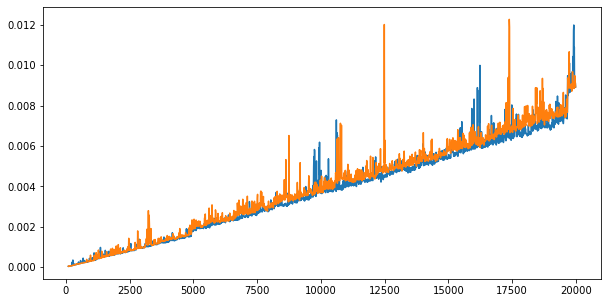

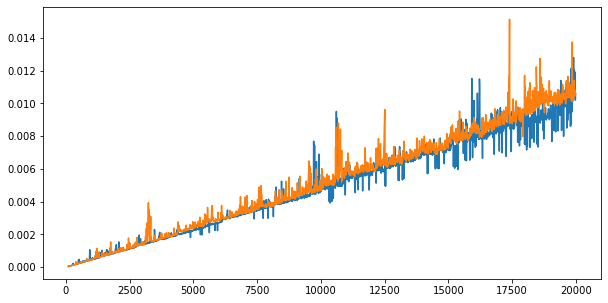

In [31]:
#Comparing time between FindKmerRepeats() and BetterFrequentWords()
import time
import numpy as np

import matplotlib.pyplot as plt

def compare_runtimes_2(L, k):
    text = generate_sequence(L)
    start_time = time.time()
    FindKmerRepeats(text, k, k)
    repeat_words_time = time.time() - start_time
    
    start_time = time.time()
    BetterFrequentWords(text, k)
    better_frequent_words_time = time.time() - start_time
    
    return repeat_words_time, better_frequent_words_time

L_values = np.arange(100,20000,10)
k_values = [15, 18]

fig, ax = plt.subplots(figsize=(10, 5))
fig, ax2 = plt.subplots(figsize=(10, 5))

for k in k_values:
    repeat_words_times = []
    better_frequent_words_times = []
    for L in L_values:
        repeat_words_time, better_frequent_words_time = compare_runtimes_2(L, k)
        repeat_words_times.append(repeat_words_time)
        better_frequent_words_times.append(better_frequent_words_time)
    
    ax.plot(L_values, repeat_words_times, label=f'RepeatWords (k={L})')
    ax2.plot(L_values, better_frequent_words_times, label=f'BetterFrequentWords(k={L})')


**Task E5** Comparison of repeats in coronavirus genomes in SARS-CoV-2, MERS, Bat RaTG13, Pangolin-PCov

In [89]:
genomes = [sars_cov_2, sars_cov, mers, bat_ratg13, pangolin_pcov]
genome_name = ["sars_cov_2", "sars_cov", "mers", "bat_ratg13", "pangolin_pcov"]
kmer_sequence = "TCTAAACGAAC"
index=0
for genome in genomes:
    positions = FindKmerPositions(genome, kmer_sequence)
    print(genome_name[index],": Starting and end point", len(positions), positions)
    index+=1

sars_cov_2 : Starting and end point 3 [(64, 75), (26467, 26478), (28254, 28265)]
sars_cov : Starting and end point 3 [(40, 51), (26321, 26332), (27746, 27757)]
mers : Starting and end point 0 []
bat_ratg13 : Starting and end point 3 [(64, 75), (26452, 26463), (28235, 28246)]
pangolin_pcov : Starting and end point 4 [(66, 77), (26427, 26438), (27838, 27849), (28210, 28221)]


Results
We visualized the empirical runtime of the two algorithms by counting versus by hashing. The BetterFrequentWords() with hashing algorithm shows better and faster runtime than that of FrequentWords() with counting algorithm.

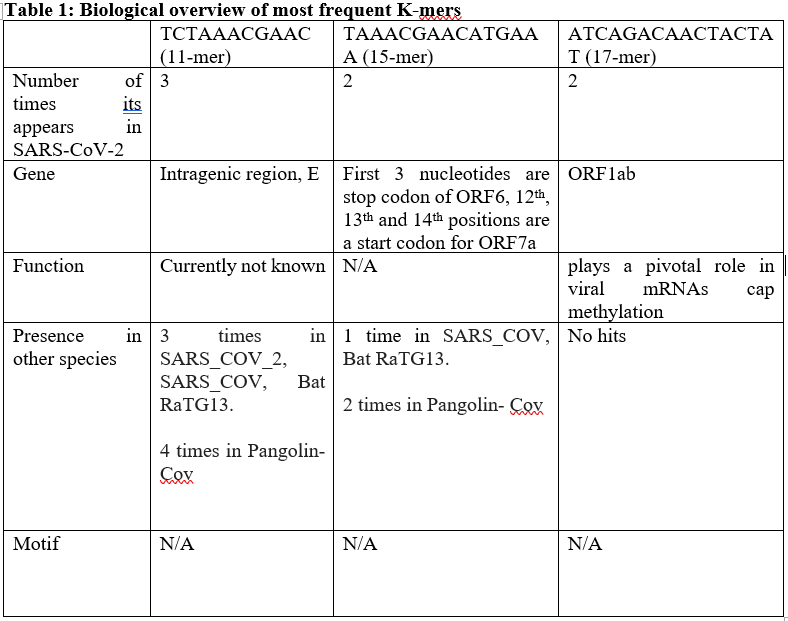

The FindKmerRepeats() algorithm shows slightly faster runtime than BetterFrequentWords() with algorithm for single K’s. Fig 2.a and Fig 2.b clearly shows the comparison and increasing of time required with increment of the length of genome sequence from 100 to 20000, with K=15 and 18.


**Discussion**

Implementation of hashing in R was a difficult task to complete. However, we find it much easier in python, and the analysis was straight forward. Finding a corresponding gene for selected k-mers also proved to be another task that took some time to complete. There was more research into new algorithms that needed to be done to make the process even more faster for k-mer analysis. During analysis, BetterFrequentwords() showed more overall good approach for k-mer identification than FrequentWords(). For sample of genome length of 10,000 nucleotides, FrequentWord() algorithm takes 0.5s to 13.9s with L increasing from 100 to 10000, where BetterFrequentWords() needs 0.003s to 0.014s. Another observation was that TCTAAACGAAC (11-mer) was appearing 3 times in SARS_COV_2, SARS_COV, Bat RaTG13 and 4 times in Pangolin. It seems biologically interesting k-mer, further analysis of this k-mer could give us more important and meaningful results. This project was a good hands-on introduction to importance of algorithms to find k-mers and how much biological importance they hold.

**Distribution of Work**

	Indronil Bhattacharjee	Jaspreet Thind
    
Task 1      	     X      	     X

Task 2  	         X  	         X

Task 3  	         X    	       X

Task 4    		     X

Task 5      	     X     		      X

Task 6     		      X    		       X


**References**

1.	https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta
2.	https://www.ncbi.nlm.nih.gov/assembly/GCF_009858895.2
3.	https://www.ncbi.nlm.nih.gov/nuccore/AY545919.1?report=fasta
4.	https://www.ncbi.nlm.nih.gov/nuccore/KU740200.1?report=fasta
5.	https://www.ncbi.nlm.nih.gov/nuccore/MN996532.2?report=fasta
6.	https://www.ncbi.nlm.nih.gov/nuccore/MT040333.1?report=fasta

